# Taiwan Temperature Nowcasting

## temperature nowcasting 1~6 hours 

In [1]:
# check dataset path
import os
os.listdir('../input')

['taiwan-weather-observatory']

In [2]:
dataset_path = '../input/taiwan-weather-observatory/'

## Observatory Dataset

In [3]:
import time
import glob
import pandas as pd
import numpy as np

In [4]:
# select Observatory ID
#ObservatoryID = '466880' # BanQiao     板橋
#ObservatoryID = '466900' # TamSui      淡水
#ObservatoryID = '466910' # AnBu        鞍部
ObservatoryID = '466920'  # Taipei      台北市
#ObservatoryID = '466930' # ZhuZiHu     竹子湖
#ObservatoryID = '466940' # KeeLung     基隆
#ObservatoryID = '466950' # PengJiaYu   彭佳嶼
#ObservatoryID = '466990' # HuaLien     花蓮
#ObservatoryID = '467060' # Su-Ao       蘇澳
#ObservatoryID = '467080' # YiLan       宜蘭
#ObservatoryID = '467110' # KinMen      金門
#ObservatoryID = '467300' # DongJiDao   東吉島
#ObservatoryID = '467350' # PengHu      澎湖
#ObservatoryID = '467410' # Tainan      台南市
#ObservatoryID = '467420' # YongKang    永康
#ObservatoryID = '467440' # KaoSiung    高雄
#ObservatoryID = '467480' # ChiaYi      嘉義市
#ObservatoryID = '467490' # Taichung    台中市
#ObservatoryID = '467530' # Alishan     阿里山
#ObservatoryID = '467540' # DaWu        大武
#ObservatoryID = '467550' # Yushan      玉山
#ObservatoryID = '467571' # HsinChu     新竹
#ObservatoryID = '467590' # HengChun    恆春
#ObservatoryID = '467610' # ChengGong   成功
#ObservatoryID = '467620' # LanYu       蘭嶼
#ObservatoryID = '467650' # SunMoonLake 日月潭
#ObservatoryID = '467660' # TaiTung     台東
#ObservatoryID = '467770' # WuQi        梧棲
#ObservatoryID = '467990' # MaTsu       馬祖

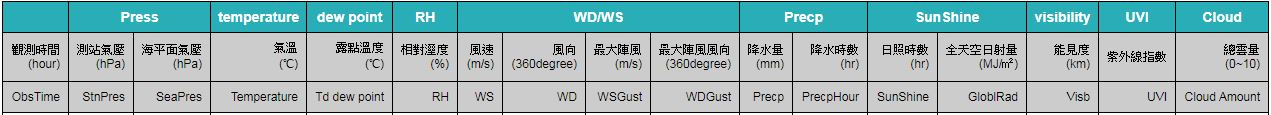

### Observatory Dataset : 2020-01-18 ~ 02-08

In [5]:
date_list = os.listdir(dataset_path)
date_list.sort()

In [6]:
# .csv file list of one observatory
f_list=[]
for date in date_list:
    f = dataset_path + date +'/'+ObservatoryID+'-'+date+'.csv'
    f_list.append(f)

In [7]:
# create the dataframe for the observatory data
df = df0 = df1 = pd.DataFrame()

for file in f_list:
    print(file)
    df0 = pd.read_csv(file)
    # to replace special charactors per manual of observatory data
    for i in range(len(df0)):
        for key in df0.columns:
            if df0.loc[i][key]=='T':
                df0.at[i,key]=0.1
            if df0.loc[i][key]=='V':
                if i>0:
                    df0.at[i,key]=df0.at[i-1,key]
                if df0.loc[i,key]=='V':
                    df0.at[i,key]=0
            if df0.loc[i][key]=='/':
                df0.at[i,key]=0.0
            if df0.loc[i][key]=='x':
                df0.at[i,key]=0.0
            if df0.loc[i][key]=='...':
                df0.at[i,key]=0.0
    # select columns of data
    #df1 = df0.drop(columns=['ObsTime','StnPres','SeaPres','WS','WD','WSGust','WDGust','Precp','PrecpHour','SunShine', 'GloblRad', 'Visb', 'UVI', 'Cloud Amount'])
    df1.loc[:,'Temperature'] = df0.Temperature.astype('float')
    df1.loc[:,'Td dew point']= df0['Td dew point'].astype('float')
    df1.loc[:,'RH'] = df0.RH.astype('float')
    df1.loc[:,'StnPres'] = df0.StnPres.astype('float')
    df1.loc[:,'SeaPres'] = df0.SeaPres.astype('float')
    df1.loc[:,'WS'] = df0.WS.astype('int')
    df1.loc[:,'WD'] = df0.WD.astype('int')
    df1.loc[:,'WSGust'] = df0.WSGust.astype('int')
    df1.loc[:,'WDGust'] = df0.WDGust.astype('int')
    df1.loc[:,'Rain'] = df0.Precp.astype('float') * df0.PrecpHour.astype('float')
    df1.loc[:,'SunShine'] = df0.SunShine.astype('float') * df0.GloblRad.astype('float')
    df = df.append(df1, ignore_index=True)

../input/taiwan-weather-observatory/2020-01-18/466920-2020-01-18.csv
../input/taiwan-weather-observatory/2020-01-19/466920-2020-01-19.csv
../input/taiwan-weather-observatory/2020-01-20/466920-2020-01-20.csv
../input/taiwan-weather-observatory/2020-01-21/466920-2020-01-21.csv
../input/taiwan-weather-observatory/2020-01-22/466920-2020-01-22.csv
../input/taiwan-weather-observatory/2020-01-23/466920-2020-01-23.csv
../input/taiwan-weather-observatory/2020-01-24/466920-2020-01-24.csv
../input/taiwan-weather-observatory/2020-01-25/466920-2020-01-25.csv
../input/taiwan-weather-observatory/2020-01-26/466920-2020-01-26.csv
../input/taiwan-weather-observatory/2020-01-27/466920-2020-01-27.csv
../input/taiwan-weather-observatory/2020-01-28/466920-2020-01-28.csv
../input/taiwan-weather-observatory/2020-01-29/466920-2020-01-29.csv
../input/taiwan-weather-observatory/2020-01-30/466920-2020-01-30.csv
../input/taiwan-weather-observatory/2020-01-31/466920-2020-01-31.csv
../input/taiwan-weather-observator

In [8]:
# convert dataframe to numpy-array
DataX = df.to_numpy()
DataY = df.loc[:,'Temperature'].to_numpy()
print(DataX.shape)
print(DataY.shape)

(552, 11)
(552,)


In [9]:
# observing points are 24 hours
history_points = 24
batch_size = history_points

## Build Model

In [10]:
# Immport Libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input, LSTM, ConvLSTM2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


### LSTM model (for observatory data)

In [11]:
m_shape = (history_points, DataX.shape[1]) 
m_input = Input(shape=m_shape,  name='m_input')
units = history_points

In [12]:
# LSTM
m = LSTM(units, name='m_lstm_0')(m_input)

t0 = Dense(units, activation="sigmoid")(m)
t0 = Dense(1, activation="linear", name='temp0')(t0)

t1 = Dense(units, activation="sigmoid")(m)
t1 = Dense(1, activation="linear", name='temp1')(t1)

t2 = Dense(units, activation="sigmoid")(m)
t2 = Dense(1, activation="linear", name='temp2')(t2)

t3 = Dense(units, activation="sigmoid")(m)
t3 = Dense(1, activation="linear", name='temp3')(t3)

t4 = Dense(units, activation="sigmoid")(m)
t4 = Dense(1, activation="linear", name='temp4')(t4)

t5 = Dense(units, activation="sigmoid")(m)
t5 = Dense(1, activation="linear", name='temp5')(t5)

model = Model(inputs=m_input, outputs=[t0, t1, t2, t3, t4, t5])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
m_input (InputLayer)            [(None, 24, 11)]     0                                            
__________________________________________________________________________________________________
m_lstm_0 (LSTM)                 (None, 24)           3456        m_input[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           600         m_lstm_0[0][0]                   
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           600         m_lstm_0[0][0]                   
______________________________________________________________________________________________

In [13]:
# Compile Model
model.compile(optimizer='Adam', loss='mse')

In [14]:
# set Checkpoint : save best only, verbose off
checkpoint = ModelCheckpoint("nowcasting.hdf5", monitor='loss', verbose=0, save_best_only=True, mode='auto', save_freq=1)

In [15]:
# Plot real vs predicted 
def plot_nowcasting(observatory_id, title, period, real, pred):
    fig = plt.figure()
    plt.gcf().set_size_inches(21, 7, forward=True)
    start = 0
    end = -1
    plt.plot(real[start:end], label='real')
    plt.plot(pred[start:end], label='pred')
    plt.title(observatory_id+' '+title+' Nowcasting ['+period+']')
    plt.legend(['Real', 'Pred'])
    plt.show()
    #fig.savefig(observatory_id+title+'.png')

## Prepare Dataset

In [16]:
data_period = '2020-01-18 ~ 02-07' # total 21 days
inc_hour    = 1
start, end  = 0+inc_hour, 24*21+inc_hour # 21 days training data

In [17]:
# training dataset
M_trainX  = np.array([DataX[i:i+ history_points] for i in range(start, end)])
M_trainY0 = np.array([DataY[i+ history_points+0] for i in range(start, end)]) 
M_trainY1 = np.array([DataY[i+ history_points+1] for i in range(start, end)]) 
M_trainY2 = np.array([DataY[i+ history_points+2] for i in range(start, end)])
M_trainY3 = np.array([DataY[i+ history_points+3] for i in range(start, end)])
M_trainY4 = np.array([DataY[i+ history_points+4] for i in range(start, end)])
M_trainY5 = np.array([DataY[i+ history_points+5] for i in range(start, end)])
print(M_trainX.shape)
M_trainY0 = M_trainY0.reshape(M_trainY0.shape[0], 1)
M_trainY1 = M_trainY1.reshape(M_trainY1.shape[0], 1)
M_trainY2 = M_trainY2.reshape(M_trainY2.shape[0], 1)
M_trainY3 = M_trainY3.reshape(M_trainY3.shape[0], 1)
M_trainY4 = M_trainY4.reshape(M_trainY4.shape[0], 1)
M_trainY5 = M_trainY5.reshape(M_trainY5.shape[0], 1)
print(M_trainY0.shape)
print(M_trainY1.shape)
print(M_trainY2.shape)
print(M_trainY3.shape)
print(M_trainY4.shape)
print(M_trainY5.shape)

(504, 24, 11)
(504, 1)
(504, 1)
(504, 1)
(504, 1)
(504, 1)
(504, 1)


In [18]:
# testing dataset 
M_testX = np.array(DataX[end : end+history_points]) 
M_testX = M_testX.reshape(1, M_testX.shape[0], M_testX.shape[1])
print(M_testX.shape)
M_testY = np.array(DataY[end+history_points: end+history_points+6]) # 6 hours predicted
M_testY = M_testY.reshape(M_testY.shape[0], 1)
print(M_testY.shape)

(1, 24, 11)
(6, 1)


In [19]:
# normalise X 
M_trainX = M_trainX / 1024.0
M_testX  = M_testX / 1024.0

## Train Model

### target loss <0.1

In [20]:
start_time = time.time()
num_epochs = 8000  # new training (total loss <0.2)

In [ ]:
history = model.fit(M_trainX, [M_trainY0, M_trainY1, M_trainY2, M_trainY3, M_trainY4, M_trainY5], batch_size=batch_size, epochs=num_epochs, verbose=2 #)
          ,callbacks=[checkpoint])

Train on 504 samples
Epoch 1/8000
504/504 - 3s - loss: 1568.8738 - temp0_loss: 238.9839 - temp1_loss: 325.5431 - temp2_loss: 233.0629 - temp3_loss: 252.6229 - temp4_loss: 259.2814 - temp5_loss: 259.3797
Epoch 2/8000
504/504 - 0s - loss: 1411.3841 - temp0_loss: 215.1252 - temp1_loss: 300.4572 - temp2_loss: 205.6210 - temp3_loss: 224.4693 - temp4_loss: 234.1466 - temp5_loss: 231.5649
Epoch 3/8000
504/504 - 0s - loss: 1232.4857 - temp0_loss: 187.1208 - temp1_loss: 272.7036 - temp2_loss: 172.4367 - temp3_loss: 193.0859 - temp4_loss: 203.8919 - temp5_loss: 203.2468
Epoch 4/8000
504/504 - 1s - loss: 1083.5583 - temp0_loss: 161.8021 - temp1_loss: 249.0907 - temp2_loss: 146.2428 - temp3_loss: 168.0747 - temp4_loss: 178.4583 - temp5_loss: 179.8898
Epoch 5/8000
504/504 - 0s - loss: 974.8153 - temp0_loss: 142.8861 - temp1_loss: 231.9596 - temp2_loss: 127.7257 - temp3_loss: 149.9141 - temp4_loss: 159.4870 - temp5_loss: 162.8429
Epoch 6/8000
504/504 - 0s - loss: 897.0637 - temp0_loss: 129.2727 - te

504/504 - 0s - loss: 122.8501 - temp0_loss: 14.3252 - temp1_loss: 48.1290 - temp2_loss: 13.8252 - temp3_loss: 15.6907 - temp4_loss: 14.5103 - temp5_loss: 16.3697
Epoch 48/8000
504/504 - 0s - loss: 120.0576 - temp0_loss: 14.1793 - temp1_loss: 46.4050 - temp2_loss: 13.7404 - temp3_loss: 15.3995 - temp4_loss: 14.3260 - temp5_loss: 16.0075
Epoch 49/8000
504/504 - 0s - loss: 117.4840 - temp0_loss: 14.0532 - temp1_loss: 44.7514 - temp2_loss: 13.6710 - temp3_loss: 15.1440 - temp4_loss: 14.1724 - temp5_loss: 15.6920
Epoch 50/8000
504/504 - 0s - loss: 115.0531 - temp0_loss: 13.9449 - temp1_loss: 43.1600 - temp2_loss: 13.6084 - temp3_loss: 14.9101 - temp4_loss: 14.0322 - temp5_loss: 15.3975
Epoch 51/8000
504/504 - 0s - loss: 112.7991 - temp0_loss: 13.8479 - temp1_loss: 41.6321 - temp2_loss: 13.5571 - temp3_loss: 14.7057 - temp4_loss: 13.9163 - temp5_loss: 15.1400
Epoch 52/8000
504/504 - 0s - loss: 110.6661 - temp0_loss: 13.7613 - temp1_loss: 40.1590 - temp2_loss: 13.5098 - temp3_loss: 14.5182 - 

Epoch 94/8000
504/504 - 0s - loss: 81.2781 - temp0_loss: 13.3445 - temp1_loss: 14.8009 - temp2_loss: 13.3113 - temp3_loss: 13.2891 - temp4_loss: 13.2734 - temp5_loss: 13.2588
Epoch 95/8000
504/504 - 0s - loss: 81.0910 - temp0_loss: 13.3408 - temp1_loss: 14.6294 - temp2_loss: 13.3070 - temp3_loss: 13.2858 - temp4_loss: 13.2710 - temp5_loss: 13.2570
Epoch 96/8000
504/504 - 0s - loss: 80.9310 - temp0_loss: 13.3418 - temp1_loss: 14.4666 - temp2_loss: 13.3079 - temp3_loss: 13.2864 - temp4_loss: 13.2712 - temp5_loss: 13.2571
Epoch 97/8000
504/504 - 0s - loss: 80.7803 - temp0_loss: 13.3422 - temp1_loss: 14.3112 - temp2_loss: 13.3087 - temp3_loss: 13.2873 - temp4_loss: 13.2728 - temp5_loss: 13.2580
Epoch 98/8000
504/504 - 0s - loss: 80.6440 - temp0_loss: 13.3410 - temp1_loss: 14.1821 - temp2_loss: 13.3070 - temp3_loss: 13.2860 - temp4_loss: 13.2710 - temp5_loss: 13.2570
Epoch 99/8000
504/504 - 0s - loss: 80.5230 - temp0_loss: 13.3405 - temp1_loss: 14.0623 - temp2_loss: 13.3070 - temp3_loss: 13

Epoch 141/8000
504/504 - 0s - loss: 79.7988 - temp0_loss: 13.3424 - temp1_loss: 13.3244 - temp2_loss: 13.3104 - temp3_loss: 13.2880 - temp4_loss: 13.2750 - temp5_loss: 13.2585
Epoch 142/8000
504/504 - 0s - loss: 79.7934 - temp0_loss: 13.3418 - temp1_loss: 13.3239 - temp2_loss: 13.3090 - temp3_loss: 13.2878 - temp4_loss: 13.2729 - temp5_loss: 13.2579
Epoch 143/8000
504/504 - 0s - loss: 79.8036 - temp0_loss: 13.3463 - temp1_loss: 13.3256 - temp2_loss: 13.3110 - temp3_loss: 13.2885 - temp4_loss: 13.2736 - temp5_loss: 13.2586
Epoch 144/8000
504/504 - 0s - loss: 79.7852 - temp0_loss: 13.3407 - temp1_loss: 13.3231 - temp2_loss: 13.3071 - temp3_loss: 13.2860 - temp4_loss: 13.2715 - temp5_loss: 13.2569
Epoch 145/8000
504/504 - 0s - loss: 79.7885 - temp0_loss: 13.3412 - temp1_loss: 13.3234 - temp2_loss: 13.3077 - temp3_loss: 13.2866 - temp4_loss: 13.2719 - temp5_loss: 13.2577
Epoch 146/8000
504/504 - 0s - loss: 79.7973 - temp0_loss: 13.3435 - temp1_loss: 13.3244 - temp2_loss: 13.3094 - temp3_lo

Epoch 188/8000
504/504 - 0s - loss: 79.7989 - temp0_loss: 13.3424 - temp1_loss: 13.3241 - temp2_loss: 13.3103 - temp3_loss: 13.2881 - temp4_loss: 13.2744 - temp5_loss: 13.2597
Epoch 189/8000
504/504 - 0s - loss: 79.7977 - temp0_loss: 13.3435 - temp1_loss: 13.3243 - temp2_loss: 13.3096 - temp3_loss: 13.2879 - temp4_loss: 13.2738 - temp5_loss: 13.2586
Epoch 190/8000
504/504 - 0s - loss: 79.8022 - temp0_loss: 13.3419 - temp1_loss: 13.3247 - temp2_loss: 13.3120 - temp3_loss: 13.2893 - temp4_loss: 13.2757 - temp5_loss: 13.2587
Epoch 191/8000
504/504 - 0s - loss: 79.8056 - temp0_loss: 13.3437 - temp1_loss: 13.3243 - temp2_loss: 13.3106 - temp3_loss: 13.2896 - temp4_loss: 13.2771 - temp5_loss: 13.2604
Epoch 192/8000
504/504 - 0s - loss: 79.8270 - temp0_loss: 13.3514 - temp1_loss: 13.3276 - temp2_loss: 13.3143 - temp3_loss: 13.2932 - temp4_loss: 13.2779 - temp5_loss: 13.2625
Epoch 193/8000
504/504 - 0s - loss: 79.7866 - temp0_loss: 13.3418 - temp1_loss: 13.3238 - temp2_loss: 13.3082 - temp3_lo

Epoch 235/8000
504/504 - 0s - loss: 79.8032 - temp0_loss: 13.3427 - temp1_loss: 13.3242 - temp2_loss: 13.3105 - temp3_loss: 13.2900 - temp4_loss: 13.2756 - temp5_loss: 13.2602
Epoch 236/8000
504/504 - 0s - loss: 79.7920 - temp0_loss: 13.3429 - temp1_loss: 13.3241 - temp2_loss: 13.3092 - temp3_loss: 13.2871 - temp4_loss: 13.2719 - temp5_loss: 13.2568
Epoch 237/8000
504/504 - 0s - loss: 79.8082 - temp0_loss: 13.3456 - temp1_loss: 13.3258 - temp2_loss: 13.3120 - temp3_loss: 13.2897 - temp4_loss: 13.2755 - temp5_loss: 13.2595
Epoch 238/8000
504/504 - 0s - loss: 79.8106 - temp0_loss: 13.3475 - temp1_loss: 13.3266 - temp2_loss: 13.3130 - temp3_loss: 13.2900 - temp4_loss: 13.2749 - temp5_loss: 13.2586
Epoch 239/8000
504/504 - 0s - loss: 79.8003 - temp0_loss: 13.3431 - temp1_loss: 13.3257 - temp2_loss: 13.3125 - temp3_loss: 13.2881 - temp4_loss: 13.2731 - temp5_loss: 13.2579
Epoch 240/8000
504/504 - 0s - loss: 79.8185 - temp0_loss: 13.3429 - temp1_loss: 13.3245 - temp2_loss: 13.3113 - temp3_lo

Epoch 282/8000
504/504 - 0s - loss: 79.8673 - temp0_loss: 13.3482 - temp1_loss: 13.3301 - temp2_loss: 13.3243 - temp3_loss: 13.3050 - temp4_loss: 13.2889 - temp5_loss: 13.2708
Epoch 283/8000
504/504 - 0s - loss: 79.8319 - temp0_loss: 13.3496 - temp1_loss: 13.3274 - temp2_loss: 13.3168 - temp3_loss: 13.2944 - temp4_loss: 13.2792 - temp5_loss: 13.2645
Epoch 284/8000
504/504 - 0s - loss: 79.8123 - temp0_loss: 13.3452 - temp1_loss: 13.3257 - temp2_loss: 13.3124 - temp3_loss: 13.2908 - temp4_loss: 13.2766 - temp5_loss: 13.2616
Epoch 285/8000
504/504 - 0s - loss: 79.8607 - temp0_loss: 13.3511 - temp1_loss: 13.3313 - temp2_loss: 13.3227 - temp3_loss: 13.2995 - temp4_loss: 13.2862 - temp5_loss: 13.2699
Epoch 286/8000
504/504 - 0s - loss: 79.8058 - temp0_loss: 13.3455 - temp1_loss: 13.3251 - temp2_loss: 13.3113 - temp3_loss: 13.2898 - temp4_loss: 13.2743 - temp5_loss: 13.2597
Epoch 287/8000
504/504 - 0s - loss: 79.7993 - temp0_loss: 13.3454 - temp1_loss: 13.3255 - temp2_loss: 13.3102 - temp3_lo

Epoch 329/8000
504/504 - 0s - loss: 79.8061 - temp0_loss: 13.3472 - temp1_loss: 13.3278 - temp2_loss: 13.3129 - temp3_loss: 13.2897 - temp4_loss: 13.2723 - temp5_loss: 13.2562
Epoch 330/8000
504/504 - 0s - loss: 79.7994 - temp0_loss: 13.3462 - temp1_loss: 13.3257 - temp2_loss: 13.3095 - temp3_loss: 13.2873 - temp4_loss: 13.2725 - temp5_loss: 13.2581
Epoch 331/8000
504/504 - 0s - loss: 79.8149 - temp0_loss: 13.3449 - temp1_loss: 13.3254 - temp2_loss: 13.3124 - temp3_loss: 13.2906 - temp4_loss: 13.2781 - temp5_loss: 13.2636
Epoch 332/8000
504/504 - 0s - loss: 79.7961 - temp0_loss: 13.3451 - temp1_loss: 13.3251 - temp2_loss: 13.3087 - temp3_loss: 13.2871 - temp4_loss: 13.2724 - temp5_loss: 13.2577
Epoch 333/8000
504/504 - 0s - loss: 79.7942 - temp0_loss: 13.3448 - temp1_loss: 13.3255 - temp2_loss: 13.3089 - temp3_loss: 13.2862 - temp4_loss: 13.2716 - temp5_loss: 13.2572
Epoch 334/8000
504/504 - 0s - loss: 79.8161 - temp0_loss: 13.3459 - temp1_loss: 13.3261 - temp2_loss: 13.3127 - temp3_lo

Epoch 376/8000
504/504 - 0s - loss: 79.8405 - temp0_loss: 13.3550 - temp1_loss: 13.3326 - temp2_loss: 13.3209 - temp3_loss: 13.2948 - temp4_loss: 13.2770 - temp5_loss: 13.2603
Epoch 377/8000
504/504 - 0s - loss: 79.8027 - temp0_loss: 13.3443 - temp1_loss: 13.3248 - temp2_loss: 13.3095 - temp3_loss: 13.2881 - temp4_loss: 13.2742 - temp5_loss: 13.2618
Epoch 378/8000
504/504 - 0s - loss: 79.8006 - temp0_loss: 13.3429 - temp1_loss: 13.3247 - temp2_loss: 13.3100 - temp3_loss: 13.2887 - temp4_loss: 13.2746 - temp5_loss: 13.2598
Epoch 379/8000
504/504 - 0s - loss: 79.7913 - temp0_loss: 13.3424 - temp1_loss: 13.3245 - temp2_loss: 13.3090 - temp3_loss: 13.2868 - temp4_loss: 13.2715 - temp5_loss: 13.2570
Epoch 380/8000
504/504 - 0s - loss: 79.8048 - temp0_loss: 13.3424 - temp1_loss: 13.3245 - temp2_loss: 13.3099 - temp3_loss: 13.2890 - temp4_loss: 13.2761 - temp5_loss: 13.2630
Epoch 381/8000
504/504 - 0s - loss: 79.8458 - temp0_loss: 13.3525 - temp1_loss: 13.3308 - temp2_loss: 13.3190 - temp3_lo

Epoch 423/8000
504/504 - 0s - loss: 79.8105 - temp0_loss: 13.3455 - temp1_loss: 13.3258 - temp2_loss: 13.3131 - temp3_loss: 13.2907 - temp4_loss: 13.2744 - temp5_loss: 13.2610
Epoch 424/8000
504/504 - 0s - loss: 79.8060 - temp0_loss: 13.3463 - temp1_loss: 13.3274 - temp2_loss: 13.3114 - temp3_loss: 13.2891 - temp4_loss: 13.2739 - temp5_loss: 13.2580
Epoch 425/8000
504/504 - 0s - loss: 79.8005 - temp0_loss: 13.3426 - temp1_loss: 13.3242 - temp2_loss: 13.3091 - temp3_loss: 13.2881 - temp4_loss: 13.2740 - temp5_loss: 13.2625
Epoch 426/8000
504/504 - 0s - loss: 79.8051 - temp0_loss: 13.3473 - temp1_loss: 13.3273 - temp2_loss: 13.3107 - temp3_loss: 13.2884 - temp4_loss: 13.2732 - temp5_loss: 13.2583
Epoch 427/8000
504/504 - 0s - loss: 79.8010 - temp0_loss: 13.3441 - temp1_loss: 13.3253 - temp2_loss: 13.3114 - temp3_loss: 13.2885 - temp4_loss: 13.2730 - temp5_loss: 13.2587
Epoch 428/8000
504/504 - 0s - loss: 79.8049 - temp0_loss: 13.3455 - temp1_loss: 13.3261 - temp2_loss: 13.3110 - temp3_lo

Epoch 470/8000
504/504 - 0s - loss: 79.7985 - temp0_loss: 13.3437 - temp1_loss: 13.3242 - temp2_loss: 13.3091 - temp3_loss: 13.2882 - temp4_loss: 13.2738 - temp5_loss: 13.2594
Epoch 471/8000
504/504 - 0s - loss: 79.8208 - temp0_loss: 13.3489 - temp1_loss: 13.3281 - temp2_loss: 13.3144 - temp3_loss: 13.2919 - temp4_loss: 13.2768 - temp5_loss: 13.2607
Epoch 472/8000
504/504 - 0s - loss: 79.8065 - temp0_loss: 13.3453 - temp1_loss: 13.3260 - temp2_loss: 13.3106 - temp3_loss: 13.2902 - temp4_loss: 13.2743 - temp5_loss: 13.2601
Epoch 473/8000
504/504 - 0s - loss: 79.8176 - temp0_loss: 13.3492 - temp1_loss: 13.3284 - temp2_loss: 13.3144 - temp3_loss: 13.2913 - temp4_loss: 13.2756 - temp5_loss: 13.2586
Epoch 474/8000
504/504 - 0s - loss: 79.8040 - temp0_loss: 13.3435 - temp1_loss: 13.3258 - temp2_loss: 13.3120 - temp3_loss: 13.2894 - temp4_loss: 13.2741 - temp5_loss: 13.2592
Epoch 475/8000
504/504 - 0s - loss: 79.8048 - temp0_loss: 13.3448 - temp1_loss: 13.3259 - temp2_loss: 13.3103 - temp3_lo

Epoch 517/8000
504/504 - 0s - loss: 79.8248 - temp0_loss: 13.3475 - temp1_loss: 13.3279 - temp2_loss: 13.3161 - temp3_loss: 13.2930 - temp4_loss: 13.2780 - temp5_loss: 13.2623
Epoch 518/8000
504/504 - 0s - loss: 79.8088 - temp0_loss: 13.3482 - temp1_loss: 13.3277 - temp2_loss: 13.3125 - temp3_loss: 13.2892 - temp4_loss: 13.2735 - temp5_loss: 13.2578
Epoch 519/8000
504/504 - 0s - loss: 79.7851 - temp0_loss: 13.3396 - temp1_loss: 13.3231 - temp2_loss: 13.3073 - temp3_loss: 13.2853 - temp4_loss: 13.2716 - temp5_loss: 13.2583
Epoch 520/8000
504/504 - 0s - loss: 79.8647 - temp0_loss: 13.3571 - temp1_loss: 13.3336 - temp2_loss: 13.3220 - temp3_loss: 13.2962 - temp4_loss: 13.2860 - temp5_loss: 13.2698
Epoch 521/8000
504/504 - 0s - loss: 79.7555 - temp0_loss: 13.3390 - temp1_loss: 13.3220 - temp2_loss: 13.3016 - temp3_loss: 13.2782 - temp4_loss: 13.2632 - temp5_loss: 13.2516
Epoch 522/8000
504/504 - 0s - loss: 79.7758 - temp0_loss: 13.3394 - temp1_loss: 13.3233 - temp2_loss: 13.3061 - temp3_lo

Epoch 564/8000
504/504 - 0s - loss: 32.2330 - temp0_loss: 5.8410 - temp1_loss: 5.4703 - temp2_loss: 5.0145 - temp3_loss: 4.9462 - temp4_loss: 5.2335 - temp5_loss: 5.7275
Epoch 565/8000
504/504 - 0s - loss: 31.6072 - temp0_loss: 5.8102 - temp1_loss: 5.3753 - temp2_loss: 4.9389 - temp3_loss: 4.8609 - temp4_loss: 5.0836 - temp5_loss: 5.5383
Epoch 566/8000
504/504 - 0s - loss: 30.3189 - temp0_loss: 5.6217 - temp1_loss: 5.1685 - temp2_loss: 4.7177 - temp3_loss: 4.6256 - temp4_loss: 4.8663 - temp5_loss: 5.3191
Epoch 567/8000
504/504 - 0s - loss: 30.8276 - temp0_loss: 5.7179 - temp1_loss: 5.2488 - temp2_loss: 4.8126 - temp3_loss: 4.6990 - temp4_loss: 4.9239 - temp5_loss: 5.4254
Epoch 568/8000
504/504 - 0s - loss: 36.2026 - temp0_loss: 6.2074 - temp1_loss: 5.9049 - temp2_loss: 5.6413 - temp3_loss: 5.7052 - temp4_loss: 6.0947 - temp5_loss: 6.6492
Epoch 569/8000
504/504 - 0s - loss: 30.7945 - temp0_loss: 5.6526 - temp1_loss: 5.1577 - temp2_loss: 4.7829 - temp3_loss: 4.7119 - temp4_loss: 4.9797 -

Epoch 613/8000
504/504 - 0s - loss: 22.7353 - temp0_loss: 4.4372 - temp1_loss: 3.7282 - temp2_loss: 3.2360 - temp3_loss: 3.2454 - temp4_loss: 3.6790 - temp5_loss: 4.4094
Epoch 614/8000
504/504 - 0s - loss: 22.8094 - temp0_loss: 4.3881 - temp1_loss: 3.6826 - temp2_loss: 3.2244 - temp3_loss: 3.2401 - temp4_loss: 3.7498 - temp5_loss: 4.5244
Epoch 615/8000
504/504 - 0s - loss: 23.2191 - temp0_loss: 4.3963 - temp1_loss: 3.7251 - temp2_loss: 3.2786 - temp3_loss: 3.3577 - temp4_loss: 3.8393 - temp5_loss: 4.6221
Epoch 616/8000
504/504 - 0s - loss: 22.9967 - temp0_loss: 4.4562 - temp1_loss: 3.7480 - temp2_loss: 3.2495 - temp3_loss: 3.2851 - temp4_loss: 3.7458 - temp5_loss: 4.5121
Epoch 617/8000
504/504 - 0s - loss: 22.5646 - temp0_loss: 4.3435 - temp1_loss: 3.6588 - temp2_loss: 3.1693 - temp3_loss: 3.1934 - temp4_loss: 3.7075 - temp5_loss: 4.4921
Epoch 618/8000
504/504 - 0s - loss: 22.4054 - temp0_loss: 4.3533 - temp1_loss: 3.5877 - temp2_loss: 3.0903 - temp3_loss: 3.1495 - temp4_loss: 3.7121 -

Epoch 662/8000
504/504 - 0s - loss: 19.4184 - temp0_loss: 3.7409 - temp1_loss: 2.9602 - temp2_loss: 2.5134 - temp3_loss: 2.6424 - temp4_loss: 3.3026 - temp5_loss: 4.2590
Epoch 663/8000
504/504 - 0s - loss: 19.3042 - temp0_loss: 3.7988 - temp1_loss: 3.0006 - temp2_loss: 2.5462 - temp3_loss: 2.6428 - temp4_loss: 3.2177 - temp5_loss: 4.0981
Epoch 664/8000
504/504 - 0s - loss: 20.6624 - temp0_loss: 3.8213 - temp1_loss: 3.0769 - temp2_loss: 2.7570 - temp3_loss: 2.9014 - temp4_loss: 3.5857 - temp5_loss: 4.5201
Epoch 665/8000
504/504 - 0s - loss: 19.4519 - temp0_loss: 3.8569 - temp1_loss: 3.0531 - temp2_loss: 2.5602 - temp3_loss: 2.6338 - temp4_loss: 3.2129 - temp5_loss: 4.1349
Epoch 666/8000
504/504 - 0s - loss: 19.7106 - temp0_loss: 3.8972 - temp1_loss: 3.0771 - temp2_loss: 2.5849 - temp3_loss: 2.7082 - temp4_loss: 3.2849 - temp5_loss: 4.1583
Epoch 667/8000
504/504 - 0s - loss: 19.6385 - temp0_loss: 3.8450 - temp1_loss: 3.0490 - temp2_loss: 2.6025 - temp3_loss: 2.7032 - temp4_loss: 3.2693 -

Epoch 711/8000
504/504 - 0s - loss: 18.3241 - temp0_loss: 3.4973 - temp1_loss: 2.6994 - temp2_loss: 2.3103 - temp3_loss: 2.4703 - temp4_loss: 3.1659 - temp5_loss: 4.1808
Epoch 712/8000
504/504 - 0s - loss: 19.0689 - temp0_loss: 3.8968 - temp1_loss: 3.0476 - temp2_loss: 2.5424 - temp3_loss: 2.5548 - temp4_loss: 3.0802 - temp5_loss: 3.9472
Epoch 713/8000
504/504 - 0s - loss: 19.1155 - temp0_loss: 3.6481 - temp1_loss: 2.8497 - temp2_loss: 2.4467 - temp3_loss: 2.6455 - temp4_loss: 3.2851 - temp5_loss: 4.2404
Epoch 714/8000
504/504 - 0s - loss: 18.7544 - temp0_loss: 3.7005 - temp1_loss: 2.9165 - temp2_loss: 2.4683 - temp3_loss: 2.5484 - temp4_loss: 3.1053 - temp5_loss: 4.0155
Epoch 715/8000
504/504 - 0s - loss: 18.1931 - temp0_loss: 3.6094 - temp1_loss: 2.7597 - temp2_loss: 2.2977 - temp3_loss: 2.4574 - temp4_loss: 3.0736 - temp5_loss: 3.9954
Epoch 716/8000
504/504 - 0s - loss: 19.8621 - temp0_loss: 3.9075 - temp1_loss: 3.1284 - temp2_loss: 2.7422 - temp3_loss: 2.7538 - temp4_loss: 3.2505 -

Epoch 760/8000
504/504 - 0s - loss: 16.4133 - temp0_loss: 3.4094 - temp1_loss: 2.5533 - temp2_loss: 2.0232 - temp3_loss: 2.1246 - temp4_loss: 2.6890 - temp5_loss: 3.6137
Epoch 761/8000
504/504 - 0s - loss: 16.0613 - temp0_loss: 3.2799 - temp1_loss: 2.4605 - temp2_loss: 1.9827 - temp3_loss: 2.0603 - temp4_loss: 2.6678 - temp5_loss: 3.6101
Epoch 762/8000
504/504 - 0s - loss: 15.6238 - temp0_loss: 3.1867 - temp1_loss: 2.3393 - temp2_loss: 1.8732 - temp3_loss: 2.0319 - temp4_loss: 2.6244 - temp5_loss: 3.5684
Epoch 763/8000
504/504 - 0s - loss: 15.3950 - temp0_loss: 3.1637 - temp1_loss: 2.3260 - temp2_loss: 1.8328 - temp3_loss: 1.9634 - temp4_loss: 2.5757 - temp5_loss: 3.5333
Epoch 764/8000
504/504 - 0s - loss: 16.8182 - temp0_loss: 3.2783 - temp1_loss: 2.4504 - temp2_loss: 2.0907 - temp3_loss: 2.2318 - temp4_loss: 2.9099 - temp5_loss: 3.8572
Epoch 765/8000
504/504 - 0s - loss: 16.2384 - temp0_loss: 3.2663 - temp1_loss: 2.4841 - temp2_loss: 2.0619 - temp3_loss: 2.1381 - temp4_loss: 2.6937 -

Epoch 809/8000
504/504 - 0s - loss: 13.9803 - temp0_loss: 2.9269 - temp1_loss: 2.1314 - temp2_loss: 1.6627 - temp3_loss: 1.7600 - temp4_loss: 2.3044 - temp5_loss: 3.1950
Epoch 810/8000
504/504 - 0s - loss: 14.4436 - temp0_loss: 3.0667 - temp1_loss: 2.2706 - temp2_loss: 1.7771 - temp3_loss: 1.7995 - temp4_loss: 2.2959 - temp5_loss: 3.2338
Epoch 811/8000
504/504 - 0s - loss: 14.6056 - temp0_loss: 3.0310 - temp1_loss: 2.2422 - temp2_loss: 1.7680 - temp3_loss: 1.8481 - temp4_loss: 2.3930 - temp5_loss: 3.3234
Epoch 812/8000
504/504 - 0s - loss: 13.9721 - temp0_loss: 2.9494 - temp1_loss: 2.1761 - temp2_loss: 1.6700 - temp3_loss: 1.7296 - temp4_loss: 2.2753 - temp5_loss: 3.1718
Epoch 813/8000
504/504 - 0s - loss: 14.2137 - temp0_loss: 2.9074 - temp1_loss: 2.1501 - temp2_loss: 1.7375 - temp3_loss: 1.7979 - temp4_loss: 2.3689 - temp5_loss: 3.2520
Epoch 814/8000
504/504 - 0s - loss: 14.1142 - temp0_loss: 2.9321 - temp1_loss: 2.1392 - temp2_loss: 1.6642 - temp3_loss: 1.7700 - temp4_loss: 2.3468 -

Epoch 858/8000
504/504 - 0s - loss: 12.8315 - temp0_loss: 2.6532 - temp1_loss: 1.9473 - temp2_loss: 1.5571 - temp3_loss: 1.6003 - temp4_loss: 2.1320 - temp5_loss: 2.9415
Epoch 859/8000
504/504 - 0s - loss: 12.5680 - temp0_loss: 2.5494 - temp1_loss: 1.9235 - temp2_loss: 1.5183 - temp3_loss: 1.6239 - temp4_loss: 2.0969 - temp5_loss: 2.8560
Epoch 860/8000
504/504 - 0s - loss: 12.7848 - temp0_loss: 2.4732 - temp1_loss: 1.9266 - temp2_loss: 1.5684 - temp3_loss: 1.6636 - temp4_loss: 2.1649 - temp5_loss: 2.9882
Epoch 861/8000
504/504 - 0s - loss: 12.3317 - temp0_loss: 2.4651 - temp1_loss: 1.8547 - temp2_loss: 1.5221 - temp3_loss: 1.6137 - temp4_loss: 2.0455 - temp5_loss: 2.8305
Epoch 862/8000
504/504 - 0s - loss: 11.8988 - temp0_loss: 2.3774 - temp1_loss: 1.7551 - temp2_loss: 1.4019 - temp3_loss: 1.5014 - temp4_loss: 2.0204 - temp5_loss: 2.8425
Epoch 863/8000
504/504 - 0s - loss: 12.3501 - temp0_loss: 2.5580 - temp1_loss: 1.8718 - temp2_loss: 1.5411 - temp3_loss: 1.5704 - temp4_loss: 2.0259 -

Epoch 907/8000
504/504 - 0s - loss: 10.0335 - temp0_loss: 2.0770 - temp1_loss: 1.5649 - temp2_loss: 1.2810 - temp3_loss: 1.2588 - temp4_loss: 1.6204 - temp5_loss: 2.2314
Epoch 908/8000
504/504 - 0s - loss: 9.7687 - temp0_loss: 1.7879 - temp1_loss: 1.3641 - temp2_loss: 1.1791 - temp3_loss: 1.3196 - temp4_loss: 1.7231 - temp5_loss: 2.3949
Epoch 909/8000
504/504 - 0s - loss: 9.5950 - temp0_loss: 1.8543 - temp1_loss: 1.4014 - temp2_loss: 1.1726 - temp3_loss: 1.2674 - temp4_loss: 1.6337 - temp5_loss: 2.2655
Epoch 910/8000
504/504 - 0s - loss: 10.1133 - temp0_loss: 1.9398 - temp1_loss: 1.4899 - temp2_loss: 1.2783 - temp3_loss: 1.3745 - temp4_loss: 1.7223 - temp5_loss: 2.3085
Epoch 911/8000
504/504 - 0s - loss: 9.5001 - temp0_loss: 1.7209 - temp1_loss: 1.3156 - temp2_loss: 1.1431 - temp3_loss: 1.2446 - temp4_loss: 1.6983 - temp5_loss: 2.3775
Epoch 912/8000
504/504 - 0s - loss: 9.3631 - temp0_loss: 1.7592 - temp1_loss: 1.3309 - temp2_loss: 1.1339 - temp3_loss: 1.2207 - temp4_loss: 1.6466 - tem

Epoch 956/8000
504/504 - 0s - loss: 7.8994 - temp0_loss: 1.4714 - temp1_loss: 1.1860 - temp2_loss: 1.0204 - temp3_loss: 1.0989 - temp4_loss: 1.3420 - temp5_loss: 1.7807
Epoch 957/8000
504/504 - 0s - loss: 7.5846 - temp0_loss: 1.3934 - temp1_loss: 1.1050 - temp2_loss: 0.9577 - temp3_loss: 1.0158 - temp4_loss: 1.2941 - temp5_loss: 1.8186
Epoch 958/8000
504/504 - 0s - loss: 7.1770 - temp0_loss: 1.3248 - temp1_loss: 1.0157 - temp2_loss: 0.9283 - temp3_loss: 0.9497 - temp4_loss: 1.2421 - temp5_loss: 1.7163
Epoch 959/8000
504/504 - 0s - loss: 7.3414 - temp0_loss: 1.4090 - temp1_loss: 1.0643 - temp2_loss: 0.9222 - temp3_loss: 0.9724 - temp4_loss: 1.2524 - temp5_loss: 1.7211
Epoch 960/8000
504/504 - 0s - loss: 10.2559 - temp0_loss: 1.7404 - temp1_loss: 1.4420 - temp2_loss: 1.4142 - temp3_loss: 1.6253 - temp4_loss: 1.7997 - temp5_loss: 2.2343
Epoch 961/8000
504/504 - 0s - loss: 9.1524 - temp0_loss: 1.7602 - temp1_loss: 1.3630 - temp2_loss: 1.2184 - temp3_loss: 1.2453 - temp4_loss: 1.5309 - temp

Epoch 1005/8000
504/504 - 0s - loss: 7.8168 - temp0_loss: 1.3705 - temp1_loss: 1.1290 - temp2_loss: 1.0993 - temp3_loss: 1.1671 - temp4_loss: 1.3403 - temp5_loss: 1.7106
Epoch 1006/8000
504/504 - 0s - loss: 5.7836 - temp0_loss: 1.1284 - temp1_loss: 0.8456 - temp2_loss: 0.7601 - temp3_loss: 0.7968 - temp4_loss: 0.9539 - temp5_loss: 1.2988
Epoch 1007/8000
504/504 - 0s - loss: 5.6036 - temp0_loss: 1.0627 - temp1_loss: 0.8215 - temp2_loss: 0.7450 - temp3_loss: 0.8042 - temp4_loss: 0.9444 - temp5_loss: 1.2259
Epoch 1008/8000
504/504 - 0s - loss: 6.0158 - temp0_loss: 1.2390 - temp1_loss: 0.9382 - temp2_loss: 0.8041 - temp3_loss: 0.8311 - temp4_loss: 0.9725 - temp5_loss: 1.2311
Epoch 1009/8000
504/504 - 0s - loss: 6.1688 - temp0_loss: 1.1082 - temp1_loss: 0.9111 - temp2_loss: 0.9050 - temp3_loss: 0.9675 - temp4_loss: 1.0015 - temp5_loss: 1.2756
Epoch 1010/8000
504/504 - 0s - loss: 6.6395 - temp0_loss: 1.2390 - temp1_loss: 1.0234 - temp2_loss: 0.9098 - temp3_loss: 0.9756 - temp4_loss: 1.0679 -

Epoch 1054/8000
504/504 - 0s - loss: 6.0637 - temp0_loss: 1.2209 - temp1_loss: 0.9594 - temp2_loss: 0.8859 - temp3_loss: 0.9050 - temp4_loss: 0.9382 - temp5_loss: 1.1543
Epoch 1055/8000
504/504 - 0s - loss: 5.0919 - temp0_loss: 0.9477 - temp1_loss: 0.7075 - temp2_loss: 0.6397 - temp3_loss: 0.7524 - temp4_loss: 0.9098 - temp5_loss: 1.1348
Epoch 1056/8000
504/504 - 0s - loss: 5.2679 - temp0_loss: 1.0092 - temp1_loss: 0.7310 - temp2_loss: 0.6838 - temp3_loss: 0.7968 - temp4_loss: 0.8939 - temp5_loss: 1.1531
Epoch 1057/8000
504/504 - 0s - loss: 4.8445 - temp0_loss: 0.9516 - temp1_loss: 0.7041 - temp2_loss: 0.6627 - temp3_loss: 0.6664 - temp4_loss: 0.7726 - temp5_loss: 1.0872
Epoch 1058/8000
504/504 - 0s - loss: 4.5912 - temp0_loss: 0.8680 - temp1_loss: 0.6475 - temp2_loss: 0.6137 - temp3_loss: 0.6535 - temp4_loss: 0.7681 - temp5_loss: 1.0405
Epoch 1059/8000
504/504 - 0s - loss: 5.1315 - temp0_loss: 0.9517 - temp1_loss: 0.7725 - temp2_loss: 0.7100 - temp3_loss: 0.7622 - temp4_loss: 0.8573 -

Epoch 1103/8000
504/504 - 0s - loss: 7.6304 - temp0_loss: 1.3375 - temp1_loss: 1.0595 - temp2_loss: 1.1042 - temp3_loss: 1.2692 - temp4_loss: 1.2816 - temp5_loss: 1.5784
Epoch 1104/8000
504/504 - 0s - loss: 8.0852 - temp0_loss: 1.4062 - temp1_loss: 1.2042 - temp2_loss: 1.2522 - temp3_loss: 1.2814 - temp4_loss: 1.4072 - temp5_loss: 1.5340
Epoch 1105/8000
504/504 - 0s - loss: 5.8975 - temp0_loss: 1.2703 - temp1_loss: 0.9358 - temp2_loss: 0.7490 - temp3_loss: 0.8076 - temp4_loss: 0.9383 - temp5_loss: 1.1964
Epoch 1106/8000
504/504 - 0s - loss: 5.6869 - temp0_loss: 1.0046 - temp1_loss: 0.7820 - temp2_loss: 0.8083 - temp3_loss: 0.9311 - temp4_loss: 0.9875 - temp5_loss: 1.1734
Epoch 1107/8000
504/504 - 0s - loss: 5.1244 - temp0_loss: 0.9724 - temp1_loss: 0.7365 - temp2_loss: 0.6489 - temp3_loss: 0.7124 - temp4_loss: 0.8867 - temp5_loss: 1.1674
Epoch 1108/8000
504/504 - 0s - loss: 4.0439 - temp0_loss: 0.7857 - temp1_loss: 0.5856 - temp2_loss: 0.5566 - temp3_loss: 0.5949 - temp4_loss: 0.6688 -

Epoch 1152/8000
504/504 - 0s - loss: 4.8945 - temp0_loss: 0.9541 - temp1_loss: 0.7260 - temp2_loss: 0.6747 - temp3_loss: 0.7537 - temp4_loss: 0.7572 - temp5_loss: 1.0287
Epoch 1153/8000
504/504 - 0s - loss: 3.6085 - temp0_loss: 0.6960 - temp1_loss: 0.5451 - temp2_loss: 0.5116 - temp3_loss: 0.5347 - temp4_loss: 0.5468 - temp5_loss: 0.7743
Epoch 1154/8000
504/504 - 0s - loss: 3.5067 - temp0_loss: 0.6699 - temp1_loss: 0.4947 - temp2_loss: 0.4895 - temp3_loss: 0.5213 - temp4_loss: 0.5707 - temp5_loss: 0.7605
Epoch 1155/8000
504/504 - 0s - loss: 3.4039 - temp0_loss: 0.7012 - temp1_loss: 0.5066 - temp2_loss: 0.4577 - temp3_loss: 0.4747 - temp4_loss: 0.5304 - temp5_loss: 0.7334
Epoch 1156/8000
504/504 - 0s - loss: 3.6033 - temp0_loss: 0.7727 - temp1_loss: 0.5299 - temp2_loss: 0.4849 - temp3_loss: 0.5158 - temp4_loss: 0.5511 - temp5_loss: 0.7489
Epoch 1157/8000
504/504 - 0s - loss: 3.5454 - temp0_loss: 0.7125 - temp1_loss: 0.5170 - temp2_loss: 0.4824 - temp3_loss: 0.5012 - temp4_loss: 0.5486 -

Epoch 1201/8000
504/504 - 0s - loss: 4.1348 - temp0_loss: 0.7862 - temp1_loss: 0.6300 - temp2_loss: 0.6107 - temp3_loss: 0.6259 - temp4_loss: 0.6292 - temp5_loss: 0.8528
Epoch 1202/8000
504/504 - 0s - loss: 3.8170 - temp0_loss: 0.7601 - temp1_loss: 0.5698 - temp2_loss: 0.5268 - temp3_loss: 0.5353 - temp4_loss: 0.6406 - temp5_loss: 0.7843
Epoch 1203/8000
504/504 - 0s - loss: 3.6222 - temp0_loss: 0.7065 - temp1_loss: 0.5190 - temp2_loss: 0.4983 - temp3_loss: 0.5621 - temp4_loss: 0.5788 - temp5_loss: 0.7576
Epoch 1204/8000
504/504 - 0s - loss: 3.8500 - temp0_loss: 0.7617 - temp1_loss: 0.6062 - temp2_loss: 0.5501 - temp3_loss: 0.5442 - temp4_loss: 0.5767 - temp5_loss: 0.8111
Epoch 1205/8000
504/504 - 0s - loss: 3.6027 - temp0_loss: 0.7556 - temp1_loss: 0.5120 - temp2_loss: 0.5068 - temp3_loss: 0.5150 - temp4_loss: 0.5597 - temp5_loss: 0.7537
Epoch 1206/8000
504/504 - 0s - loss: 3.7589 - temp0_loss: 0.7824 - temp1_loss: 0.5759 - temp2_loss: 0.4970 - temp3_loss: 0.5367 - temp4_loss: 0.5742 -

Epoch 1250/8000
504/504 - 0s - loss: 3.2699 - temp0_loss: 0.7102 - temp1_loss: 0.5243 - temp2_loss: 0.4630 - temp3_loss: 0.4692 - temp4_loss: 0.4787 - temp5_loss: 0.6245
Epoch 1251/8000
504/504 - 0s - loss: 3.3518 - temp0_loss: 0.6698 - temp1_loss: 0.4750 - temp2_loss: 0.4503 - temp3_loss: 0.4846 - temp4_loss: 0.5226 - temp5_loss: 0.7495
Epoch 1252/8000
504/504 - 0s - loss: 3.4469 - temp0_loss: 0.6906 - temp1_loss: 0.5296 - temp2_loss: 0.5059 - temp3_loss: 0.5030 - temp4_loss: 0.5333 - temp5_loss: 0.6846
Epoch 1253/8000
504/504 - 0s - loss: 2.7390 - temp0_loss: 0.5746 - temp1_loss: 0.3853 - temp2_loss: 0.3838 - temp3_loss: 0.4056 - temp4_loss: 0.4223 - temp5_loss: 0.5675
Epoch 1254/8000
504/504 - 0s - loss: 3.2878 - temp0_loss: 0.6462 - temp1_loss: 0.4725 - temp2_loss: 0.4427 - temp3_loss: 0.4563 - temp4_loss: 0.5142 - temp5_loss: 0.7560
Epoch 1255/8000
504/504 - 0s - loss: 3.1179 - temp0_loss: 0.6421 - temp1_loss: 0.4476 - temp2_loss: 0.4189 - temp3_loss: 0.4845 - temp4_loss: 0.4774 -

Epoch 1299/8000
504/504 - 0s - loss: 2.6130 - temp0_loss: 0.5680 - temp1_loss: 0.3880 - temp2_loss: 0.3638 - temp3_loss: 0.3883 - temp4_loss: 0.3970 - temp5_loss: 0.5080
Epoch 1300/8000
504/504 - 0s - loss: 3.2417 - temp0_loss: 0.6540 - temp1_loss: 0.4977 - temp2_loss: 0.4788 - temp3_loss: 0.4975 - temp4_loss: 0.5057 - temp5_loss: 0.6079
Epoch 1301/8000
504/504 - 0s - loss: 3.5917 - temp0_loss: 0.7139 - temp1_loss: 0.5241 - temp2_loss: 0.4939 - temp3_loss: 0.4917 - temp4_loss: 0.5842 - temp5_loss: 0.7840
Epoch 1302/8000
504/504 - 0s - loss: 3.1025 - temp0_loss: 0.6577 - temp1_loss: 0.4672 - temp2_loss: 0.4471 - temp3_loss: 0.4700 - temp4_loss: 0.4722 - temp5_loss: 0.5883
Epoch 1303/8000
504/504 - 0s - loss: 2.7436 - temp0_loss: 0.5731 - temp1_loss: 0.4343 - temp2_loss: 0.3873 - temp3_loss: 0.3896 - temp4_loss: 0.3999 - temp5_loss: 0.5593
Epoch 1304/8000
504/504 - 0s - loss: 2.6146 - temp0_loss: 0.5370 - temp1_loss: 0.3746 - temp2_loss: 0.3769 - temp3_loss: 0.4089 - temp4_loss: 0.4047 -

Epoch 1348/8000
504/504 - 0s - loss: 2.9105 - temp0_loss: 0.6054 - temp1_loss: 0.4270 - temp2_loss: 0.3832 - temp3_loss: 0.4240 - temp4_loss: 0.4767 - temp5_loss: 0.5942
Epoch 1349/8000
504/504 - 0s - loss: 3.0960 - temp0_loss: 0.6323 - temp1_loss: 0.4545 - temp2_loss: 0.4351 - temp3_loss: 0.4443 - temp4_loss: 0.4808 - temp5_loss: 0.6490
Epoch 1350/8000
504/504 - 0s - loss: 2.3583 - temp0_loss: 0.4996 - temp1_loss: 0.3638 - temp2_loss: 0.3484 - temp3_loss: 0.3485 - temp4_loss: 0.3494 - temp5_loss: 0.4486
Epoch 1351/8000
504/504 - 0s - loss: 2.7480 - temp0_loss: 0.5880 - temp1_loss: 0.3953 - temp2_loss: 0.3866 - temp3_loss: 0.4158 - temp4_loss: 0.4190 - temp5_loss: 0.5433
Epoch 1352/8000
504/504 - 0s - loss: 3.1993 - temp0_loss: 0.6359 - temp1_loss: 0.4697 - temp2_loss: 0.4285 - temp3_loss: 0.4802 - temp4_loss: 0.5375 - temp5_loss: 0.6476
Epoch 1353/8000
504/504 - 0s - loss: 2.4923 - temp0_loss: 0.5116 - temp1_loss: 0.3664 - temp2_loss: 0.3439 - temp3_loss: 0.3764 - temp4_loss: 0.3832 -

Epoch 1397/8000
504/504 - 0s - loss: 2.6693 - temp0_loss: 0.5338 - temp1_loss: 0.3836 - temp2_loss: 0.3577 - temp3_loss: 0.3687 - temp4_loss: 0.4339 - temp5_loss: 0.5915
Epoch 1398/8000
504/504 - 0s - loss: 2.1278 - temp0_loss: 0.4517 - temp1_loss: 0.3048 - temp2_loss: 0.2948 - temp3_loss: 0.3080 - temp4_loss: 0.3309 - temp5_loss: 0.4376
Epoch 1399/8000
504/504 - 0s - loss: 2.1538 - temp0_loss: 0.4602 - temp1_loss: 0.3061 - temp2_loss: 0.3018 - temp3_loss: 0.3365 - temp4_loss: 0.3301 - temp5_loss: 0.4190
Epoch 1400/8000
504/504 - 0s - loss: 2.2932 - temp0_loss: 0.4872 - temp1_loss: 0.3383 - temp2_loss: 0.3195 - temp3_loss: 0.3407 - temp4_loss: 0.3610 - temp5_loss: 0.4465
Epoch 1401/8000
504/504 - 0s - loss: 2.2111 - temp0_loss: 0.4846 - temp1_loss: 0.3230 - temp2_loss: 0.2932 - temp3_loss: 0.3099 - temp4_loss: 0.3358 - temp5_loss: 0.4646
Epoch 1402/8000
504/504 - 0s - loss: 2.2517 - temp0_loss: 0.4612 - temp1_loss: 0.3354 - temp2_loss: 0.3286 - temp3_loss: 0.3433 - temp4_loss: 0.3436 -

Epoch 1446/8000
504/504 - 0s - loss: 3.1727 - temp0_loss: 0.5809 - temp1_loss: 0.4855 - temp2_loss: 0.4835 - temp3_loss: 0.5027 - temp4_loss: 0.5035 - temp5_loss: 0.6166
Epoch 1447/8000
504/504 - 0s - loss: 2.4574 - temp0_loss: 0.5093 - temp1_loss: 0.3997 - temp2_loss: 0.3500 - temp3_loss: 0.3599 - temp4_loss: 0.3787 - temp5_loss: 0.4597
Epoch 1448/8000
504/504 - 0s - loss: 2.1337 - temp0_loss: 0.4482 - temp1_loss: 0.3171 - temp2_loss: 0.3094 - temp3_loss: 0.3337 - temp4_loss: 0.3275 - temp5_loss: 0.3977
Epoch 1449/8000
504/504 - 0s - loss: 2.0075 - temp0_loss: 0.4233 - temp1_loss: 0.2982 - temp2_loss: 0.2938 - temp3_loss: 0.3037 - temp4_loss: 0.3092 - temp5_loss: 0.3793
Epoch 1450/8000
504/504 - 0s - loss: 1.9202 - temp0_loss: 0.4212 - temp1_loss: 0.2822 - temp2_loss: 0.2739 - temp3_loss: 0.2873 - temp4_loss: 0.2969 - temp5_loss: 0.3587
Epoch 1451/8000
504/504 - 0s - loss: 2.1592 - temp0_loss: 0.4704 - temp1_loss: 0.3101 - temp2_loss: 0.2997 - temp3_loss: 0.3254 - temp4_loss: 0.3256 -

Epoch 1495/8000
504/504 - 0s - loss: 1.7970 - temp0_loss: 0.3795 - temp1_loss: 0.2718 - temp2_loss: 0.2561 - temp3_loss: 0.2662 - temp4_loss: 0.2701 - temp5_loss: 0.3534
Epoch 1496/8000
504/504 - 0s - loss: 1.8963 - temp0_loss: 0.3695 - temp1_loss: 0.2703 - temp2_loss: 0.2703 - temp3_loss: 0.3008 - temp4_loss: 0.2983 - temp5_loss: 0.3871
Epoch 1497/8000
504/504 - 0s - loss: 2.0928 - temp0_loss: 0.4283 - temp1_loss: 0.3214 - temp2_loss: 0.2878 - temp3_loss: 0.2880 - temp4_loss: 0.3253 - temp5_loss: 0.4419
Epoch 1498/8000
504/504 - 0s - loss: 2.6801 - temp0_loss: 0.5071 - temp1_loss: 0.3784 - temp2_loss: 0.3794 - temp3_loss: 0.4151 - temp4_loss: 0.4491 - temp5_loss: 0.5509
Epoch 1499/8000
504/504 - 0s - loss: 2.6655 - temp0_loss: 0.5081 - temp1_loss: 0.3758 - temp2_loss: 0.3733 - temp3_loss: 0.4225 - temp4_loss: 0.4383 - temp5_loss: 0.5475
Epoch 1500/8000
504/504 - 0s - loss: 2.3739 - temp0_loss: 0.4926 - temp1_loss: 0.3396 - temp2_loss: 0.3156 - temp3_loss: 0.3542 - temp4_loss: 0.3828 -

Epoch 1544/8000
504/504 - 0s - loss: 2.7585 - temp0_loss: 0.5201 - temp1_loss: 0.3882 - temp2_loss: 0.3788 - temp3_loss: 0.4390 - temp4_loss: 0.4690 - temp5_loss: 0.5635
Epoch 1545/8000
504/504 - 0s - loss: 3.4516 - temp0_loss: 0.6205 - temp1_loss: 0.5230 - temp2_loss: 0.5070 - temp3_loss: 0.5553 - temp4_loss: 0.5908 - temp5_loss: 0.6550
Epoch 1546/8000
504/504 - 0s - loss: 2.1858 - temp0_loss: 0.4358 - temp1_loss: 0.3246 - temp2_loss: 0.3318 - temp3_loss: 0.3281 - temp4_loss: 0.3423 - temp5_loss: 0.4232
Epoch 1547/8000
504/504 - 0s - loss: 1.9425 - temp0_loss: 0.4110 - temp1_loss: 0.2715 - temp2_loss: 0.2751 - temp3_loss: 0.3090 - temp4_loss: 0.2853 - temp5_loss: 0.3906
Epoch 1548/8000
504/504 - 0s - loss: 2.4098 - temp0_loss: 0.4547 - temp1_loss: 0.3646 - temp2_loss: 0.3762 - temp3_loss: 0.3709 - temp4_loss: 0.3756 - temp5_loss: 0.4677
Epoch 1549/8000
504/504 - 0s - loss: 1.9991 - temp0_loss: 0.3976 - temp1_loss: 0.2751 - temp2_loss: 0.2759 - temp3_loss: 0.3184 - temp4_loss: 0.3155 -

Epoch 1593/8000
504/504 - 0s - loss: 1.6847 - temp0_loss: 0.3575 - temp1_loss: 0.2513 - temp2_loss: 0.2351 - temp3_loss: 0.2589 - temp4_loss: 0.2484 - temp5_loss: 0.3335
Epoch 1594/8000
504/504 - 0s - loss: 1.6102 - temp0_loss: 0.3555 - temp1_loss: 0.2379 - temp2_loss: 0.2320 - temp3_loss: 0.2545 - temp4_loss: 0.2310 - temp5_loss: 0.2994
Epoch 1595/8000
504/504 - 0s - loss: 1.6182 - temp0_loss: 0.3309 - temp1_loss: 0.2348 - temp2_loss: 0.2281 - temp3_loss: 0.2545 - temp4_loss: 0.2413 - temp5_loss: 0.3286
Epoch 1596/8000
504/504 - 0s - loss: 2.1975 - temp0_loss: 0.4471 - temp1_loss: 0.3272 - temp2_loss: 0.3014 - temp3_loss: 0.3268 - temp4_loss: 0.3343 - temp5_loss: 0.4608
Epoch 1597/8000
504/504 - 0s - loss: 1.9972 - temp0_loss: 0.3975 - temp1_loss: 0.3016 - temp2_loss: 0.2662 - temp3_loss: 0.3332 - temp4_loss: 0.3372 - temp5_loss: 0.3613
Epoch 1598/8000
504/504 - 0s - loss: 1.8039 - temp0_loss: 0.3356 - temp1_loss: 0.2509 - temp2_loss: 0.2546 - temp3_loss: 0.2971 - temp4_loss: 0.2998 -

Epoch 1642/8000
504/504 - 0s - loss: 1.5773 - temp0_loss: 0.3284 - temp1_loss: 0.2348 - temp2_loss: 0.2274 - temp3_loss: 0.2528 - temp4_loss: 0.2290 - temp5_loss: 0.3049
Epoch 1643/8000
504/504 - 0s - loss: 1.5065 - temp0_loss: 0.3104 - temp1_loss: 0.2107 - temp2_loss: 0.2162 - temp3_loss: 0.2437 - temp4_loss: 0.2343 - temp5_loss: 0.2911
Epoch 1644/8000
504/504 - 0s - loss: 1.7542 - temp0_loss: 0.3454 - temp1_loss: 0.2657 - temp2_loss: 0.2523 - temp3_loss: 0.2694 - temp4_loss: 0.2700 - temp5_loss: 0.3513
Epoch 1645/8000
504/504 - 0s - loss: 1.6363 - temp0_loss: 0.3374 - temp1_loss: 0.2266 - temp2_loss: 0.2444 - temp3_loss: 0.2418 - temp4_loss: 0.2461 - temp5_loss: 0.3400
Epoch 1646/8000
504/504 - 0s - loss: 1.5605 - temp0_loss: 0.3066 - temp1_loss: 0.2175 - temp2_loss: 0.2346 - temp3_loss: 0.2559 - temp4_loss: 0.2534 - temp5_loss: 0.2926
Epoch 1647/8000
504/504 - 0s - loss: 1.6088 - temp0_loss: 0.3286 - temp1_loss: 0.2225 - temp2_loss: 0.2185 - temp3_loss: 0.2462 - temp4_loss: 0.2443 -

Epoch 1691/8000
504/504 - 0s - loss: 1.3732 - temp0_loss: 0.2965 - temp1_loss: 0.1964 - temp2_loss: 0.1880 - temp3_loss: 0.2246 - temp4_loss: 0.2013 - temp5_loss: 0.2663
Epoch 1692/8000
504/504 - 0s - loss: 1.5366 - temp0_loss: 0.3057 - temp1_loss: 0.2234 - temp2_loss: 0.2242 - temp3_loss: 0.2393 - temp4_loss: 0.2356 - temp5_loss: 0.3084
Epoch 1693/8000
504/504 - 0s - loss: 1.3942 - temp0_loss: 0.2938 - temp1_loss: 0.2061 - temp2_loss: 0.1935 - temp3_loss: 0.2139 - temp4_loss: 0.2091 - temp5_loss: 0.2778
Epoch 1694/8000
504/504 - 0s - loss: 1.3550 - temp0_loss: 0.2764 - temp1_loss: 0.1939 - temp2_loss: 0.1951 - temp3_loss: 0.2150 - temp4_loss: 0.2107 - temp5_loss: 0.2639
Epoch 1695/8000
504/504 - 0s - loss: 1.5059 - temp0_loss: 0.3008 - temp1_loss: 0.2082 - temp2_loss: 0.2220 - temp3_loss: 0.2474 - temp4_loss: 0.2508 - temp5_loss: 0.2767
Epoch 1696/8000
504/504 - 0s - loss: 1.5297 - temp0_loss: 0.3223 - temp1_loss: 0.2254 - temp2_loss: 0.2142 - temp3_loss: 0.2419 - temp4_loss: 0.2411 -

Epoch 1740/8000
504/504 - 0s - loss: 1.4664 - temp0_loss: 0.2875 - temp1_loss: 0.2061 - temp2_loss: 0.2176 - temp3_loss: 0.2340 - temp4_loss: 0.2387 - temp5_loss: 0.2825
Epoch 1741/8000
504/504 - 0s - loss: 1.3101 - temp0_loss: 0.2781 - temp1_loss: 0.1962 - temp2_loss: 0.1797 - temp3_loss: 0.2080 - temp4_loss: 0.1947 - temp5_loss: 0.2533
Epoch 1742/8000
504/504 - 0s - loss: 1.2970 - temp0_loss: 0.2742 - temp1_loss: 0.1890 - temp2_loss: 0.1717 - temp3_loss: 0.2094 - temp4_loss: 0.2029 - temp5_loss: 0.2497
Epoch 1743/8000
504/504 - 0s - loss: 1.3381 - temp0_loss: 0.2855 - temp1_loss: 0.1992 - temp2_loss: 0.1878 - temp3_loss: 0.2039 - temp4_loss: 0.2077 - temp5_loss: 0.2540
Epoch 1744/8000
504/504 - 0s - loss: 1.3757 - temp0_loss: 0.2984 - temp1_loss: 0.2088 - temp2_loss: 0.1964 - temp3_loss: 0.2076 - temp4_loss: 0.2010 - temp5_loss: 0.2635
Epoch 1745/8000
504/504 - 0s - loss: 1.5138 - temp0_loss: 0.2953 - temp1_loss: 0.2287 - temp2_loss: 0.2255 - temp3_loss: 0.2374 - temp4_loss: 0.2233 -

Epoch 1789/8000
504/504 - 0s - loss: 1.4419 - temp0_loss: 0.2640 - temp1_loss: 0.2285 - temp2_loss: 0.2147 - temp3_loss: 0.2211 - temp4_loss: 0.2377 - temp5_loss: 0.2759
Epoch 1790/8000
504/504 - 0s - loss: 1.3607 - temp0_loss: 0.2741 - temp1_loss: 0.2015 - temp2_loss: 0.2082 - temp3_loss: 0.2319 - temp4_loss: 0.2048 - temp5_loss: 0.2403
Epoch 1791/8000
504/504 - 0s - loss: 1.3104 - temp0_loss: 0.2625 - temp1_loss: 0.1895 - temp2_loss: 0.1988 - temp3_loss: 0.1931 - temp4_loss: 0.2046 - temp5_loss: 0.2619
Epoch 1792/8000
504/504 - 0s - loss: 1.3148 - temp0_loss: 0.2503 - temp1_loss: 0.1956 - temp2_loss: 0.1956 - temp3_loss: 0.2179 - temp4_loss: 0.1980 - temp5_loss: 0.2573
Epoch 1793/8000
504/504 - 0s - loss: 1.3861 - temp0_loss: 0.2576 - temp1_loss: 0.2012 - temp2_loss: 0.2028 - temp3_loss: 0.2283 - temp4_loss: 0.2246 - temp5_loss: 0.2717
Epoch 1794/8000
504/504 - 0s - loss: 1.3718 - temp0_loss: 0.2539 - temp1_loss: 0.2057 - temp2_loss: 0.1974 - temp3_loss: 0.2119 - temp4_loss: 0.2374 -

Epoch 1838/8000
504/504 - 0s - loss: 1.7887 - temp0_loss: 0.3408 - temp1_loss: 0.2674 - temp2_loss: 0.2351 - temp3_loss: 0.2756 - temp4_loss: 0.2858 - temp5_loss: 0.3840
Epoch 1839/8000
504/504 - 0s - loss: 2.2277 - temp0_loss: 0.4214 - temp1_loss: 0.3416 - temp2_loss: 0.3207 - temp3_loss: 0.3568 - temp4_loss: 0.3840 - temp5_loss: 0.4032
Epoch 1840/8000
504/504 - 0s - loss: 2.8771 - temp0_loss: 0.4463 - temp1_loss: 0.3948 - temp2_loss: 0.4418 - temp3_loss: 0.4838 - temp4_loss: 0.5424 - temp5_loss: 0.5679
Epoch 1841/8000
504/504 - 0s - loss: 3.0878 - temp0_loss: 0.5163 - temp1_loss: 0.4382 - temp2_loss: 0.4345 - temp3_loss: 0.4706 - temp4_loss: 0.5572 - temp5_loss: 0.6709
Epoch 1842/8000
504/504 - 0s - loss: 2.0318 - temp0_loss: 0.3670 - temp1_loss: 0.3024 - temp2_loss: 0.2920 - temp3_loss: 0.3336 - temp4_loss: 0.3510 - temp5_loss: 0.3859
Epoch 1843/8000
504/504 - 0s - loss: 1.6802 - temp0_loss: 0.3252 - temp1_loss: 0.2853 - temp2_loss: 0.2769 - temp3_loss: 0.2464 - temp4_loss: 0.2537 -

Epoch 1887/8000
504/504 - 0s - loss: 1.3962 - temp0_loss: 0.2822 - temp1_loss: 0.1987 - temp2_loss: 0.2034 - temp3_loss: 0.2345 - temp4_loss: 0.2196 - temp5_loss: 0.2578
Epoch 1888/8000
504/504 - 0s - loss: 1.2513 - temp0_loss: 0.2421 - temp1_loss: 0.1854 - temp2_loss: 0.1768 - temp3_loss: 0.2137 - temp4_loss: 0.1930 - temp5_loss: 0.2405
Epoch 1889/8000
504/504 - 0s - loss: 1.1818 - temp0_loss: 0.2310 - temp1_loss: 0.1718 - temp2_loss: 0.1654 - temp3_loss: 0.1939 - temp4_loss: 0.1773 - temp5_loss: 0.2423
Epoch 1890/8000
504/504 - 0s - loss: 1.4897 - temp0_loss: 0.2766 - temp1_loss: 0.2343 - temp2_loss: 0.2276 - temp3_loss: 0.2176 - temp4_loss: 0.2313 - temp5_loss: 0.3025
Epoch 1891/8000
504/504 - 0s - loss: 1.4088 - temp0_loss: 0.2871 - temp1_loss: 0.2080 - temp2_loss: 0.2195 - temp3_loss: 0.2169 - temp4_loss: 0.2171 - temp5_loss: 0.2602
Epoch 1892/8000
504/504 - 0s - loss: 1.1940 - temp0_loss: 0.2346 - temp1_loss: 0.1804 - temp2_loss: 0.1775 - temp3_loss: 0.1982 - temp4_loss: 0.1776 -

Epoch 1936/8000
504/504 - 0s - loss: 1.6815 - temp0_loss: 0.3184 - temp1_loss: 0.2653 - temp2_loss: 0.2531 - temp3_loss: 0.2601 - temp4_loss: 0.2686 - temp5_loss: 0.3160
Epoch 1937/8000
504/504 - 0s - loss: 1.3824 - temp0_loss: 0.2599 - temp1_loss: 0.1950 - temp2_loss: 0.2097 - temp3_loss: 0.2273 - temp4_loss: 0.2252 - temp5_loss: 0.2653
Epoch 1938/8000
504/504 - 0s - loss: 1.4361 - temp0_loss: 0.2636 - temp1_loss: 0.2214 - temp2_loss: 0.2230 - temp3_loss: 0.2423 - temp4_loss: 0.2194 - temp5_loss: 0.2664
Epoch 1939/8000
504/504 - 0s - loss: 1.9213 - temp0_loss: 0.3596 - temp1_loss: 0.2947 - temp2_loss: 0.2702 - temp3_loss: 0.2957 - temp4_loss: 0.2830 - temp5_loss: 0.4182
Epoch 1940/8000
504/504 - 0s - loss: 1.5636 - temp0_loss: 0.2923 - temp1_loss: 0.2541 - temp2_loss: 0.2271 - temp3_loss: 0.2522 - temp4_loss: 0.2553 - temp5_loss: 0.2827
Epoch 1941/8000
504/504 - 0s - loss: 1.4641 - temp0_loss: 0.2939 - temp1_loss: 0.2172 - temp2_loss: 0.2060 - temp3_loss: 0.2277 - temp4_loss: 0.2266 -

Epoch 1985/8000
504/504 - 0s - loss: 1.3665 - temp0_loss: 0.2576 - temp1_loss: 0.1980 - temp2_loss: 0.2021 - temp3_loss: 0.2252 - temp4_loss: 0.2138 - temp5_loss: 0.2698
Epoch 1986/8000
504/504 - 0s - loss: 1.4671 - temp0_loss: 0.2620 - temp1_loss: 0.2276 - temp2_loss: 0.2366 - temp3_loss: 0.2355 - temp4_loss: 0.2479 - temp5_loss: 0.2575
Epoch 1987/8000
504/504 - 0s - loss: 1.3330 - temp0_loss: 0.2575 - temp1_loss: 0.1891 - temp2_loss: 0.1884 - temp3_loss: 0.2164 - temp4_loss: 0.2011 - temp5_loss: 0.2804
Epoch 1988/8000
504/504 - 0s - loss: 1.6430 - temp0_loss: 0.2989 - temp1_loss: 0.2285 - temp2_loss: 0.2337 - temp3_loss: 0.2711 - temp4_loss: 0.2690 - temp5_loss: 0.3417
Epoch 1989/8000
504/504 - 0s - loss: 1.4713 - temp0_loss: 0.2540 - temp1_loss: 0.2403 - temp2_loss: 0.2072 - temp3_loss: 0.2291 - temp4_loss: 0.2526 - temp5_loss: 0.2881
Epoch 1990/8000
504/504 - 0s - loss: 1.2603 - temp0_loss: 0.2473 - temp1_loss: 0.1849 - temp2_loss: 0.1862 - temp3_loss: 0.1955 - temp4_loss: 0.1876 -

Epoch 2034/8000
504/504 - 0s - loss: 1.2231 - temp0_loss: 0.2199 - temp1_loss: 0.1963 - temp2_loss: 0.1773 - temp3_loss: 0.1933 - temp4_loss: 0.1970 - temp5_loss: 0.2392
Epoch 2035/8000
504/504 - 0s - loss: 1.0800 - temp0_loss: 0.2047 - temp1_loss: 0.1570 - temp2_loss: 0.1546 - temp3_loss: 0.1723 - temp4_loss: 0.1704 - temp5_loss: 0.2210
Epoch 2036/8000
504/504 - 0s - loss: 1.0945 - temp0_loss: 0.2213 - temp1_loss: 0.1534 - temp2_loss: 0.1531 - temp3_loss: 0.1779 - temp4_loss: 0.1715 - temp5_loss: 0.2173
Epoch 2037/8000
504/504 - 0s - loss: 1.1565 - temp0_loss: 0.2241 - temp1_loss: 0.1778 - temp2_loss: 0.1681 - temp3_loss: 0.1866 - temp4_loss: 0.1766 - temp5_loss: 0.2233
Epoch 2038/8000
504/504 - 0s - loss: 1.3281 - temp0_loss: 0.2604 - temp1_loss: 0.2061 - temp2_loss: 0.1738 - temp3_loss: 0.1863 - temp4_loss: 0.2222 - temp5_loss: 0.2793
Epoch 2039/8000
504/504 - 0s - loss: 1.2442 - temp0_loss: 0.2248 - temp1_loss: 0.1986 - temp2_loss: 0.1774 - temp3_loss: 0.1986 - temp4_loss: 0.2047 -

Epoch 2083/8000
504/504 - 0s - loss: 9.0665 - temp0_loss: 1.4533 - temp1_loss: 1.3045 - temp2_loss: 1.2867 - temp3_loss: 1.4178 - temp4_loss: 1.6215 - temp5_loss: 1.9827
Epoch 2084/8000
504/504 - 0s - loss: 16.4778 - temp0_loss: 2.2597 - temp1_loss: 2.4055 - temp2_loss: 2.5747 - temp3_loss: 2.7438 - temp4_loss: 3.0358 - temp5_loss: 3.4583
Epoch 2085/8000
504/504 - 0s - loss: 7.9421 - temp0_loss: 1.2954 - temp1_loss: 1.1643 - temp2_loss: 1.1049 - temp3_loss: 1.2099 - temp4_loss: 1.4789 - temp5_loss: 1.6887
Epoch 2086/8000
504/504 - 0s - loss: 3.3330 - temp0_loss: 0.6551 - temp1_loss: 0.4956 - temp2_loss: 0.4149 - temp3_loss: 0.4704 - temp4_loss: 0.5863 - temp5_loss: 0.7108
Epoch 2087/8000
504/504 - 0s - loss: 2.2774 - temp0_loss: 0.4259 - temp1_loss: 0.3557 - temp2_loss: 0.3323 - temp3_loss: 0.3478 - temp4_loss: 0.3827 - temp5_loss: 0.4332
Epoch 2088/8000
504/504 - 0s - loss: 1.5053 - temp0_loss: 0.2839 - temp1_loss: 0.2350 - temp2_loss: 0.2303 - temp3_loss: 0.2505 - temp4_loss: 0.2337 

Epoch 2132/8000
504/504 - 0s - loss: 1.3743 - temp0_loss: 0.2541 - temp1_loss: 0.2091 - temp2_loss: 0.2009 - temp3_loss: 0.2164 - temp4_loss: 0.2233 - temp5_loss: 0.2705
Epoch 2133/8000
504/504 - 0s - loss: 1.4119 - temp0_loss: 0.2451 - temp1_loss: 0.2091 - temp2_loss: 0.2170 - temp3_loss: 0.2286 - temp4_loss: 0.2242 - temp5_loss: 0.2880
Epoch 2134/8000
504/504 - 0s - loss: 1.3349 - temp0_loss: 0.2299 - temp1_loss: 0.1934 - temp2_loss: 0.2011 - temp3_loss: 0.2191 - temp4_loss: 0.2104 - temp5_loss: 0.2812
Epoch 2135/8000
504/504 - 0s - loss: 1.0715 - temp0_loss: 0.2060 - temp1_loss: 0.1583 - temp2_loss: 0.1478 - temp3_loss: 0.1728 - temp4_loss: 0.1724 - temp5_loss: 0.2142
Epoch 2136/8000
504/504 - 0s - loss: 1.0354 - temp0_loss: 0.1996 - temp1_loss: 0.1544 - temp2_loss: 0.1459 - temp3_loss: 0.1715 - temp4_loss: 0.1605 - temp5_loss: 0.2035
Epoch 2137/8000
504/504 - 0s - loss: 1.0000 - temp0_loss: 0.1831 - temp1_loss: 0.1523 - temp2_loss: 0.1457 - temp3_loss: 0.1641 - temp4_loss: 0.1676 -

Epoch 2181/8000
504/504 - 0s - loss: 0.9725 - temp0_loss: 0.1770 - temp1_loss: 0.1492 - temp2_loss: 0.1500 - temp3_loss: 0.1572 - temp4_loss: 0.1619 - temp5_loss: 0.1772
Epoch 2182/8000
504/504 - 0s - loss: 1.0504 - temp0_loss: 0.1996 - temp1_loss: 0.1605 - temp2_loss: 0.1459 - temp3_loss: 0.1618 - temp4_loss: 0.1758 - temp5_loss: 0.2067
Epoch 2183/8000
504/504 - 0s - loss: 1.0640 - temp0_loss: 0.2051 - temp1_loss: 0.1644 - temp2_loss: 0.1502 - temp3_loss: 0.1741 - temp4_loss: 0.1693 - temp5_loss: 0.2008
Epoch 2184/8000
504/504 - 0s - loss: 1.0486 - temp0_loss: 0.2013 - temp1_loss: 0.1585 - temp2_loss: 0.1436 - temp3_loss: 0.1668 - temp4_loss: 0.1813 - temp5_loss: 0.1972
Epoch 2185/8000
504/504 - 0s - loss: 0.9910 - temp0_loss: 0.1935 - temp1_loss: 0.1535 - temp2_loss: 0.1475 - temp3_loss: 0.1514 - temp4_loss: 0.1538 - temp5_loss: 0.1913
Epoch 2186/8000
504/504 - 0s - loss: 1.2020 - temp0_loss: 0.2392 - temp1_loss: 0.1743 - temp2_loss: 0.1751 - temp3_loss: 0.1803 - temp4_loss: 0.1907 -

Epoch 2230/8000
504/504 - 0s - loss: 1.4679 - temp0_loss: 0.2876 - temp1_loss: 0.2444 - temp2_loss: 0.2239 - temp3_loss: 0.2213 - temp4_loss: 0.2114 - temp5_loss: 0.2792
Epoch 2231/8000
504/504 - 0s - loss: 2.2709 - temp0_loss: 0.3894 - temp1_loss: 0.3513 - temp2_loss: 0.3089 - temp3_loss: 0.3632 - temp4_loss: 0.3816 - temp5_loss: 0.4765
Epoch 2232/8000
504/504 - 0s - loss: 7.3001 - temp0_loss: 1.0890 - temp1_loss: 1.0186 - temp2_loss: 1.1162 - temp3_loss: 1.1460 - temp4_loss: 1.3037 - temp5_loss: 1.6265
Epoch 2233/8000
504/504 - 0s - loss: 3.6389 - temp0_loss: 0.7588 - temp1_loss: 0.5020 - temp2_loss: 0.5011 - temp3_loss: 0.5427 - temp4_loss: 0.6205 - temp5_loss: 0.7139
Epoch 2234/8000
504/504 - 0s - loss: 3.9935 - temp0_loss: 0.6717 - temp1_loss: 0.5984 - temp2_loss: 0.5664 - temp3_loss: 0.6061 - temp4_loss: 0.7063 - temp5_loss: 0.8446
Epoch 2235/8000
504/504 - 0s - loss: 3.0621 - temp0_loss: 0.5526 - temp1_loss: 0.4914 - temp2_loss: 0.4724 - temp3_loss: 0.5070 - temp4_loss: 0.4997 -

Epoch 2279/8000
504/504 - 0s - loss: 0.9859 - temp0_loss: 0.1797 - temp1_loss: 0.1398 - temp2_loss: 0.1488 - temp3_loss: 0.1611 - temp4_loss: 0.1666 - temp5_loss: 0.1900
Epoch 2280/8000
504/504 - 0s - loss: 1.0231 - temp0_loss: 0.1899 - temp1_loss: 0.1576 - temp2_loss: 0.1513 - temp3_loss: 0.1634 - temp4_loss: 0.1630 - temp5_loss: 0.1979
Epoch 2281/8000
504/504 - 0s - loss: 1.2274 - temp0_loss: 0.2255 - temp1_loss: 0.1845 - temp2_loss: 0.1632 - temp3_loss: 0.1874 - temp4_loss: 0.2097 - temp5_loss: 0.2571
Epoch 2282/8000
504/504 - 0s - loss: 1.0448 - temp0_loss: 0.1920 - temp1_loss: 0.1542 - temp2_loss: 0.1542 - temp3_loss: 0.1827 - temp4_loss: 0.1714 - temp5_loss: 0.1903
Epoch 2283/8000
504/504 - 0s - loss: 0.9797 - temp0_loss: 0.1713 - temp1_loss: 0.1430 - temp2_loss: 0.1508 - temp3_loss: 0.1638 - temp4_loss: 0.1584 - temp5_loss: 0.1924
Epoch 2284/8000
504/504 - 0s - loss: 1.0144 - temp0_loss: 0.1840 - temp1_loss: 0.1605 - temp2_loss: 0.1471 - temp3_loss: 0.1610 - temp4_loss: 0.1677 -

Epoch 2328/8000
504/504 - 0s - loss: 1.0631 - temp0_loss: 0.1875 - temp1_loss: 0.1617 - temp2_loss: 0.1616 - temp3_loss: 0.1669 - temp4_loss: 0.1655 - temp5_loss: 0.2198
Epoch 2329/8000
504/504 - 0s - loss: 0.9188 - temp0_loss: 0.1585 - temp1_loss: 0.1440 - temp2_loss: 0.1366 - temp3_loss: 0.1533 - temp4_loss: 0.1505 - temp5_loss: 0.1759
Epoch 2330/8000
504/504 - 0s - loss: 0.9386 - temp0_loss: 0.1742 - temp1_loss: 0.1476 - temp2_loss: 0.1334 - temp3_loss: 0.1516 - temp4_loss: 0.1427 - temp5_loss: 0.1891
Epoch 2331/8000
504/504 - 0s - loss: 0.9618 - temp0_loss: 0.1796 - temp1_loss: 0.1519 - temp2_loss: 0.1383 - temp3_loss: 0.1463 - temp4_loss: 0.1639 - temp5_loss: 0.1817
Epoch 2332/8000
504/504 - 0s - loss: 0.9033 - temp0_loss: 0.1677 - temp1_loss: 0.1413 - temp2_loss: 0.1328 - temp3_loss: 0.1423 - temp4_loss: 0.1529 - temp5_loss: 0.1663
Epoch 2333/8000
504/504 - 0s - loss: 0.8739 - temp0_loss: 0.1553 - temp1_loss: 0.1345 - temp2_loss: 0.1355 - temp3_loss: 0.1453 - temp4_loss: 0.1367 -

Epoch 2377/8000
504/504 - 0s - loss: 0.9511 - temp0_loss: 0.1582 - temp1_loss: 0.1555 - temp2_loss: 0.1384 - temp3_loss: 0.1686 - temp4_loss: 0.1567 - temp5_loss: 0.1736
Epoch 2378/8000
504/504 - 0s - loss: 0.9924 - temp0_loss: 0.1755 - temp1_loss: 0.1519 - temp2_loss: 0.1441 - temp3_loss: 0.1733 - temp4_loss: 0.1644 - temp5_loss: 0.1832
Epoch 2379/8000
504/504 - 0s - loss: 1.4625 - temp0_loss: 0.2592 - temp1_loss: 0.2152 - temp2_loss: 0.2226 - temp3_loss: 0.2480 - temp4_loss: 0.2374 - temp5_loss: 0.2800
Epoch 2380/8000
504/504 - 0s - loss: 1.6816 - temp0_loss: 0.2487 - temp1_loss: 0.2654 - temp2_loss: 0.2496 - temp3_loss: 0.2884 - temp4_loss: 0.2957 - temp5_loss: 0.3337
Epoch 2381/8000
504/504 - 0s - loss: 1.0982 - temp0_loss: 0.1985 - temp1_loss: 0.1626 - temp2_loss: 0.1762 - temp3_loss: 0.1734 - temp4_loss: 0.1727 - temp5_loss: 0.2148
Epoch 2382/8000
504/504 - 0s - loss: 0.9353 - temp0_loss: 0.1499 - temp1_loss: 0.1387 - temp2_loss: 0.1448 - temp3_loss: 0.1647 - temp4_loss: 0.1636 -

Epoch 2426/8000
504/504 - 0s - loss: 1.1279 - temp0_loss: 0.2102 - temp1_loss: 0.1865 - temp2_loss: 0.1636 - temp3_loss: 0.1754 - temp4_loss: 0.1830 - temp5_loss: 0.2091
Epoch 2427/8000
504/504 - 0s - loss: 1.5059 - temp0_loss: 0.2463 - temp1_loss: 0.2361 - temp2_loss: 0.2346 - temp3_loss: 0.2570 - temp4_loss: 0.2583 - temp5_loss: 0.2737
Epoch 2428/8000
504/504 - 0s - loss: 2.3345 - temp0_loss: 0.4072 - temp1_loss: 0.3699 - temp2_loss: 0.3410 - temp3_loss: 0.3512 - temp4_loss: 0.3824 - temp5_loss: 0.4828
Epoch 2429/8000
504/504 - 0s - loss: 2.4453 - temp0_loss: 0.3959 - temp1_loss: 0.3801 - temp2_loss: 0.3937 - temp3_loss: 0.3857 - temp4_loss: 0.4178 - temp5_loss: 0.4722
Epoch 2430/8000
504/504 - 0s - loss: 1.6276 - temp0_loss: 0.2912 - temp1_loss: 0.2706 - temp2_loss: 0.2228 - temp3_loss: 0.2575 - temp4_loss: 0.2728 - temp5_loss: 0.3126
Epoch 2431/8000
504/504 - 0s - loss: 1.1510 - temp0_loss: 0.2355 - temp1_loss: 0.1764 - temp2_loss: 0.1735 - temp3_loss: 0.1763 - temp4_loss: 0.1803 -

Epoch 2475/8000
504/504 - 0s - loss: 0.8149 - temp0_loss: 0.1386 - temp1_loss: 0.1273 - temp2_loss: 0.1205 - temp3_loss: 0.1293 - temp4_loss: 0.1382 - temp5_loss: 0.1610
Epoch 2476/8000
504/504 - 0s - loss: 0.8801 - temp0_loss: 0.1521 - temp1_loss: 0.1333 - temp2_loss: 0.1189 - temp3_loss: 0.1445 - temp4_loss: 0.1573 - temp5_loss: 0.1740
Epoch 2477/8000
504/504 - 0s - loss: 0.9475 - temp0_loss: 0.1494 - temp1_loss: 0.1391 - temp2_loss: 0.1499 - temp3_loss: 0.1627 - temp4_loss: 0.1589 - temp5_loss: 0.1874
Epoch 2478/8000
504/504 - 0s - loss: 1.0699 - temp0_loss: 0.1992 - temp1_loss: 0.1621 - temp2_loss: 0.1423 - temp3_loss: 0.1557 - temp4_loss: 0.1697 - temp5_loss: 0.2408
Epoch 2479/8000
504/504 - 0s - loss: 0.9494 - temp0_loss: 0.1659 - temp1_loss: 0.1397 - temp2_loss: 0.1253 - temp3_loss: 0.1666 - temp4_loss: 0.1749 - temp5_loss: 0.1771
Epoch 2480/8000
504/504 - 0s - loss: 0.8401 - temp0_loss: 0.1440 - temp1_loss: 0.1241 - temp2_loss: 0.1307 - temp3_loss: 0.1443 - temp4_loss: 0.1420 -

Epoch 2524/8000
504/504 - 0s - loss: 0.8081 - temp0_loss: 0.1437 - temp1_loss: 0.1245 - temp2_loss: 0.1287 - temp3_loss: 0.1339 - temp4_loss: 0.1339 - temp5_loss: 0.1435
Epoch 2525/8000
504/504 - 0s - loss: 0.8738 - temp0_loss: 0.1492 - temp1_loss: 0.1358 - temp2_loss: 0.1293 - temp3_loss: 0.1418 - temp4_loss: 0.1473 - temp5_loss: 0.1704
Epoch 2526/8000
504/504 - 0s - loss: 0.9002 - temp0_loss: 0.1682 - temp1_loss: 0.1396 - temp2_loss: 0.1311 - temp3_loss: 0.1432 - temp4_loss: 0.1477 - temp5_loss: 0.1703
Epoch 2527/8000
504/504 - 0s - loss: 0.8276 - temp0_loss: 0.1488 - temp1_loss: 0.1223 - temp2_loss: 0.1312 - temp3_loss: 0.1301 - temp4_loss: 0.1411 - temp5_loss: 0.1540
Epoch 2528/8000
504/504 - 0s - loss: 0.7918 - temp0_loss: 0.1291 - temp1_loss: 0.1185 - temp2_loss: 0.1227 - temp3_loss: 0.1333 - temp4_loss: 0.1394 - temp5_loss: 0.1487
Epoch 2529/8000
504/504 - 0s - loss: 0.8070 - temp0_loss: 0.1405 - temp1_loss: 0.1286 - temp2_loss: 0.1272 - temp3_loss: 0.1311 - temp4_loss: 0.1260 -

Epoch 2573/8000
504/504 - 0s - loss: 0.7463 - temp0_loss: 0.1265 - temp1_loss: 0.1141 - temp2_loss: 0.1192 - temp3_loss: 0.1232 - temp4_loss: 0.1228 - temp5_loss: 0.1405
Epoch 2574/8000
504/504 - 0s - loss: 0.8103 - temp0_loss: 0.1480 - temp1_loss: 0.1187 - temp2_loss: 0.1203 - temp3_loss: 0.1329 - temp4_loss: 0.1350 - temp5_loss: 0.1555
Epoch 2575/8000
504/504 - 0s - loss: 0.7503 - temp0_loss: 0.1345 - temp1_loss: 0.1090 - temp2_loss: 0.1173 - temp3_loss: 0.1237 - temp4_loss: 0.1238 - temp5_loss: 0.1419
Epoch 2576/8000
504/504 - 0s - loss: 0.8614 - temp0_loss: 0.1499 - temp1_loss: 0.1294 - temp2_loss: 0.1344 - temp3_loss: 0.1377 - temp4_loss: 0.1299 - temp5_loss: 0.1801
Epoch 2577/8000
504/504 - 0s - loss: 0.8581 - temp0_loss: 0.1528 - temp1_loss: 0.1342 - temp2_loss: 0.1256 - temp3_loss: 0.1335 - temp4_loss: 0.1414 - temp5_loss: 0.1707
Epoch 2578/8000
504/504 - 0s - loss: 0.7751 - temp0_loss: 0.1346 - temp1_loss: 0.1207 - temp2_loss: 0.1211 - temp3_loss: 0.1296 - temp4_loss: 0.1303 -

Epoch 2622/8000
504/504 - 0s - loss: 1.6908 - temp0_loss: 0.2936 - temp1_loss: 0.2383 - temp2_loss: 0.2366 - temp3_loss: 0.2616 - temp4_loss: 0.3048 - temp5_loss: 0.3560
Epoch 2623/8000
504/504 - 0s - loss: 1.1866 - temp0_loss: 0.2029 - temp1_loss: 0.1772 - temp2_loss: 0.1858 - temp3_loss: 0.1951 - temp4_loss: 0.1937 - temp5_loss: 0.2318
Epoch 2624/8000
504/504 - 0s - loss: 0.9349 - temp0_loss: 0.1693 - temp1_loss: 0.1462 - temp2_loss: 0.1422 - temp3_loss: 0.1558 - temp4_loss: 0.1574 - temp5_loss: 0.1641
Epoch 2625/8000
504/504 - 0s - loss: 0.8534 - temp0_loss: 0.1452 - temp1_loss: 0.1319 - temp2_loss: 0.1411 - temp3_loss: 0.1437 - temp4_loss: 0.1398 - temp5_loss: 0.1517
Epoch 2626/8000
504/504 - 0s - loss: 0.8268 - temp0_loss: 0.1464 - temp1_loss: 0.1274 - temp2_loss: 0.1199 - temp3_loss: 0.1421 - temp4_loss: 0.1460 - temp5_loss: 0.1451
Epoch 2627/8000
504/504 - 0s - loss: 0.7998 - temp0_loss: 0.1455 - temp1_loss: 0.1287 - temp2_loss: 0.1276 - temp3_loss: 0.1326 - temp4_loss: 0.1297 -

Epoch 2671/8000
504/504 - 0s - loss: 0.7709 - temp0_loss: 0.1307 - temp1_loss: 0.1125 - temp2_loss: 0.1187 - temp3_loss: 0.1235 - temp4_loss: 0.1360 - temp5_loss: 0.1495
Epoch 2672/8000
504/504 - 0s - loss: 0.7518 - temp0_loss: 0.1341 - temp1_loss: 0.1161 - temp2_loss: 0.1101 - temp3_loss: 0.1261 - temp4_loss: 0.1224 - temp5_loss: 0.1430
Epoch 2673/8000
504/504 - 0s - loss: 0.7708 - temp0_loss: 0.1469 - temp1_loss: 0.1194 - temp2_loss: 0.1113 - temp3_loss: 0.1326 - temp4_loss: 0.1164 - temp5_loss: 0.1443
Epoch 2674/8000
504/504 - 0s - loss: 0.7890 - temp0_loss: 0.1330 - temp1_loss: 0.1238 - temp2_loss: 0.1198 - temp3_loss: 0.1274 - temp4_loss: 0.1307 - temp5_loss: 0.1542
Epoch 2675/8000
504/504 - 0s - loss: 0.8614 - temp0_loss: 0.1510 - temp1_loss: 0.1333 - temp2_loss: 0.1406 - temp3_loss: 0.1325 - temp4_loss: 0.1373 - temp5_loss: 0.1667
Epoch 2676/8000
504/504 - 0s - loss: 0.7924 - temp0_loss: 0.1343 - temp1_loss: 0.1163 - temp2_loss: 0.1228 - temp3_loss: 0.1424 - temp4_loss: 0.1345 -

Epoch 2720/8000
504/504 - 0s - loss: 1.2091 - temp0_loss: 0.2173 - temp1_loss: 0.1633 - temp2_loss: 0.1654 - temp3_loss: 0.1958 - temp4_loss: 0.2202 - temp5_loss: 0.2471
Epoch 2721/8000
504/504 - 0s - loss: 2.5139 - temp0_loss: 0.3865 - temp1_loss: 0.3794 - temp2_loss: 0.3756 - temp3_loss: 0.4411 - temp4_loss: 0.3957 - temp5_loss: 0.5355
Epoch 2722/8000
504/504 - 0s - loss: 3.6864 - temp0_loss: 0.6751 - temp1_loss: 0.5770 - temp2_loss: 0.5347 - temp3_loss: 0.5492 - temp4_loss: 0.5815 - temp5_loss: 0.7690
Epoch 2723/8000
504/504 - 0s - loss: 1.7965 - temp0_loss: 0.3095 - temp1_loss: 0.2770 - temp2_loss: 0.2477 - temp3_loss: 0.2851 - temp4_loss: 0.3048 - temp5_loss: 0.3726
Epoch 2724/8000
504/504 - 0s - loss: 1.4712 - temp0_loss: 0.2617 - temp1_loss: 0.2374 - temp2_loss: 0.2152 - temp3_loss: 0.2258 - temp4_loss: 0.2350 - temp5_loss: 0.2960
Epoch 2725/8000
504/504 - 0s - loss: 0.9453 - temp0_loss: 0.1662 - temp1_loss: 0.1418 - temp2_loss: 0.1301 - temp3_loss: 0.1665 - temp4_loss: 0.1684 -

Epoch 2769/8000
504/504 - 0s - loss: 0.6951 - temp0_loss: 0.1206 - temp1_loss: 0.1068 - temp2_loss: 0.1113 - temp3_loss: 0.1207 - temp4_loss: 0.1113 - temp5_loss: 0.1244
Epoch 2770/8000
504/504 - 0s - loss: 0.7432 - temp0_loss: 0.1300 - temp1_loss: 0.1144 - temp2_loss: 0.1054 - temp3_loss: 0.1272 - temp4_loss: 0.1245 - temp5_loss: 0.1417
Epoch 2771/8000
504/504 - 0s - loss: 0.7401 - temp0_loss: 0.1302 - temp1_loss: 0.1137 - temp2_loss: 0.1105 - temp3_loss: 0.1194 - temp4_loss: 0.1266 - temp5_loss: 0.1397
Epoch 2772/8000
504/504 - 0s - loss: 0.7199 - temp0_loss: 0.1309 - temp1_loss: 0.1018 - temp2_loss: 0.1134 - temp3_loss: 0.1193 - temp4_loss: 0.1266 - temp5_loss: 0.1280
Epoch 2773/8000
504/504 - 0s - loss: 0.6707 - temp0_loss: 0.1153 - temp1_loss: 0.1046 - temp2_loss: 0.1058 - temp3_loss: 0.1195 - temp4_loss: 0.1116 - temp5_loss: 0.1139
Epoch 2774/8000
504/504 - 0s - loss: 0.6706 - temp0_loss: 0.1158 - temp1_loss: 0.1000 - temp2_loss: 0.1054 - temp3_loss: 0.1139 - temp4_loss: 0.1086 -

Epoch 2818/8000
504/504 - 0s - loss: 0.7566 - temp0_loss: 0.1352 - temp1_loss: 0.1165 - temp2_loss: 0.1230 - temp3_loss: 0.1185 - temp4_loss: 0.1299 - temp5_loss: 0.1333
Epoch 2819/8000
504/504 - 0s - loss: 0.7325 - temp0_loss: 0.1231 - temp1_loss: 0.1106 - temp2_loss: 0.1089 - temp3_loss: 0.1285 - temp4_loss: 0.1254 - temp5_loss: 0.1361
Epoch 2820/8000
504/504 - 0s - loss: 0.7768 - temp0_loss: 0.1280 - temp1_loss: 0.1100 - temp2_loss: 0.1255 - temp3_loss: 0.1300 - temp4_loss: 0.1250 - temp5_loss: 0.1584
Epoch 2821/8000
504/504 - 0s - loss: 0.8554 - temp0_loss: 0.1406 - temp1_loss: 0.1278 - temp2_loss: 0.1205 - temp3_loss: 0.1427 - temp4_loss: 0.1474 - temp5_loss: 0.1763
Epoch 2822/8000
504/504 - 0s - loss: 0.7257 - temp0_loss: 0.1255 - temp1_loss: 0.1155 - temp2_loss: 0.1130 - temp3_loss: 0.1155 - temp4_loss: 0.1218 - temp5_loss: 0.1344
Epoch 2823/8000
504/504 - 0s - loss: 0.7640 - temp0_loss: 0.1273 - temp1_loss: 0.1091 - temp2_loss: 0.1201 - temp3_loss: 0.1397 - temp4_loss: 0.1222 -

Epoch 2867/8000
504/504 - 0s - loss: 0.7257 - temp0_loss: 0.1256 - temp1_loss: 0.1113 - temp2_loss: 0.1203 - temp3_loss: 0.1199 - temp4_loss: 0.1138 - temp5_loss: 0.1348
Epoch 2868/8000
504/504 - 0s - loss: 0.6468 - temp0_loss: 0.1101 - temp1_loss: 0.0999 - temp2_loss: 0.1018 - temp3_loss: 0.1077 - temp4_loss: 0.1158 - temp5_loss: 0.1115
Epoch 2869/8000
504/504 - 0s - loss: 0.7088 - temp0_loss: 0.1173 - temp1_loss: 0.1105 - temp2_loss: 0.1152 - temp3_loss: 0.1266 - temp4_loss: 0.1161 - temp5_loss: 0.1232
Epoch 2870/8000
504/504 - 0s - loss: 0.7439 - temp0_loss: 0.1283 - temp1_loss: 0.1212 - temp2_loss: 0.1190 - temp3_loss: 0.1235 - temp4_loss: 0.1169 - temp5_loss: 0.1349
Epoch 2871/8000
504/504 - 0s - loss: 0.7721 - temp0_loss: 0.1405 - temp1_loss: 0.1210 - temp2_loss: 0.1296 - temp3_loss: 0.1176 - temp4_loss: 0.1213 - temp5_loss: 0.1422
Epoch 2872/8000
504/504 - 0s - loss: 0.9713 - temp0_loss: 0.1798 - temp1_loss: 0.1431 - temp2_loss: 0.1355 - temp3_loss: 0.1590 - temp4_loss: 0.1610 -

Epoch 2916/8000
504/504 - 0s - loss: 0.6239 - temp0_loss: 0.1004 - temp1_loss: 0.0947 - temp2_loss: 0.0996 - temp3_loss: 0.1092 - temp4_loss: 0.1067 - temp5_loss: 0.1133
Epoch 2917/8000
504/504 - 0s - loss: 0.6408 - temp0_loss: 0.1088 - temp1_loss: 0.0975 - temp2_loss: 0.1067 - temp3_loss: 0.1034 - temp4_loss: 0.1005 - temp5_loss: 0.1239
Epoch 2918/8000
504/504 - 0s - loss: 0.6539 - temp0_loss: 0.1136 - temp1_loss: 0.0976 - temp2_loss: 0.1062 - temp3_loss: 0.1128 - temp4_loss: 0.1053 - temp5_loss: 0.1183
Epoch 2919/8000
504/504 - 0s - loss: 0.6549 - temp0_loss: 0.1154 - temp1_loss: 0.0928 - temp2_loss: 0.1007 - temp3_loss: 0.1082 - temp4_loss: 0.1122 - temp5_loss: 0.1257
Epoch 2920/8000
504/504 - 0s - loss: 0.6398 - temp0_loss: 0.1156 - temp1_loss: 0.0997 - temp2_loss: 0.1000 - temp3_loss: 0.1062 - temp4_loss: 0.1002 - temp5_loss: 0.1181
Epoch 2921/8000
504/504 - 0s - loss: 0.6702 - temp0_loss: 0.1180 - temp1_loss: 0.1023 - temp2_loss: 0.1087 - temp3_loss: 0.1105 - temp4_loss: 0.1162 -

Epoch 2965/8000
504/504 - 0s - loss: 0.6647 - temp0_loss: 0.1093 - temp1_loss: 0.1032 - temp2_loss: 0.1072 - temp3_loss: 0.1155 - temp4_loss: 0.1110 - temp5_loss: 0.1186
Epoch 2966/8000
504/504 - 0s - loss: 0.6072 - temp0_loss: 0.0992 - temp1_loss: 0.0916 - temp2_loss: 0.0987 - temp3_loss: 0.1017 - temp4_loss: 0.1043 - temp5_loss: 0.1116
Epoch 2967/8000
504/504 - 0s - loss: 0.5886 - temp0_loss: 0.1028 - temp1_loss: 0.0943 - temp2_loss: 0.0912 - temp3_loss: 0.0994 - temp4_loss: 0.1015 - temp5_loss: 0.0993
Epoch 2968/8000
504/504 - 0s - loss: 0.6046 - temp0_loss: 0.0972 - temp1_loss: 0.0964 - temp2_loss: 0.0948 - temp3_loss: 0.1026 - temp4_loss: 0.1058 - temp5_loss: 0.1078
Epoch 2969/8000
504/504 - 0s - loss: 0.6938 - temp0_loss: 0.1223 - temp1_loss: 0.1088 - temp2_loss: 0.1128 - temp3_loss: 0.1171 - temp4_loss: 0.1093 - temp5_loss: 0.1235
Epoch 2970/8000
504/504 - 0s - loss: 0.7656 - temp0_loss: 0.1259 - temp1_loss: 0.1200 - temp2_loss: 0.1134 - temp3_loss: 0.1244 - temp4_loss: 0.1350 -

Epoch 3014/8000
504/504 - 0s - loss: 9.8798 - temp0_loss: 1.4894 - temp1_loss: 1.3448 - temp2_loss: 1.4140 - temp3_loss: 1.5899 - temp4_loss: 1.8488 - temp5_loss: 2.1929
Epoch 3015/8000
504/504 - 0s - loss: 5.3173 - temp0_loss: 0.8160 - temp1_loss: 0.8156 - temp2_loss: 0.8148 - temp3_loss: 0.8882 - temp4_loss: 0.9191 - temp5_loss: 1.0637
Epoch 3016/8000
504/504 - 0s - loss: 2.4918 - temp0_loss: 0.4027 - temp1_loss: 0.3558 - temp2_loss: 0.3802 - temp3_loss: 0.4311 - temp4_loss: 0.4276 - temp5_loss: 0.4944
Epoch 3017/8000
504/504 - 0s - loss: 1.2510 - temp0_loss: 0.2385 - temp1_loss: 0.1995 - temp2_loss: 0.2107 - temp3_loss: 0.1937 - temp4_loss: 0.1876 - temp5_loss: 0.2210
Epoch 3018/8000
504/504 - 0s - loss: 0.8832 - temp0_loss: 0.1625 - temp1_loss: 0.1320 - temp2_loss: 0.1305 - temp3_loss: 0.1433 - temp4_loss: 0.1470 - temp5_loss: 0.1680
Epoch 3019/8000
504/504 - 0s - loss: 0.7816 - temp0_loss: 0.1476 - temp1_loss: 0.1134 - temp2_loss: 0.1127 - temp3_loss: 0.1264 - temp4_loss: 0.1351 -

Epoch 3063/8000
504/504 - 0s - loss: 0.5994 - temp0_loss: 0.1044 - temp1_loss: 0.0960 - temp2_loss: 0.0897 - temp3_loss: 0.0986 - temp4_loss: 0.1031 - temp5_loss: 0.1077
Epoch 3064/8000
504/504 - 0s - loss: 0.6238 - temp0_loss: 0.1036 - temp1_loss: 0.0989 - temp2_loss: 0.0967 - temp3_loss: 0.1115 - temp4_loss: 0.0986 - temp5_loss: 0.1145
Epoch 3065/8000
504/504 - 0s - loss: 0.6675 - temp0_loss: 0.1172 - temp1_loss: 0.1068 - temp2_loss: 0.1082 - temp3_loss: 0.1136 - temp4_loss: 0.1025 - temp5_loss: 0.1192
Epoch 3066/8000
504/504 - 0s - loss: 0.6103 - temp0_loss: 0.1056 - temp1_loss: 0.0955 - temp2_loss: 0.1027 - temp3_loss: 0.1010 - temp4_loss: 0.1012 - temp5_loss: 0.1044
Epoch 3067/8000
504/504 - 0s - loss: 0.5834 - temp0_loss: 0.0954 - temp1_loss: 0.0956 - temp2_loss: 0.0931 - temp3_loss: 0.1008 - temp4_loss: 0.0932 - temp5_loss: 0.1054
Epoch 3068/8000
504/504 - 0s - loss: 0.5660 - temp0_loss: 0.0948 - temp1_loss: 0.0871 - temp2_loss: 0.0918 - temp3_loss: 0.0962 - temp4_loss: 0.0980 -

Epoch 3112/8000
504/504 - 0s - loss: 0.7100 - temp0_loss: 0.1221 - temp1_loss: 0.1075 - temp2_loss: 0.1146 - temp3_loss: 0.1139 - temp4_loss: 0.1138 - temp5_loss: 0.1383
Epoch 3113/8000
504/504 - 0s - loss: 0.6383 - temp0_loss: 0.1075 - temp1_loss: 0.0945 - temp2_loss: 0.1063 - temp3_loss: 0.1131 - temp4_loss: 0.1079 - temp5_loss: 0.1090
Epoch 3114/8000
504/504 - 0s - loss: 0.6011 - temp0_loss: 0.1011 - temp1_loss: 0.0916 - temp2_loss: 0.0981 - temp3_loss: 0.1036 - temp4_loss: 0.1022 - temp5_loss: 0.1045
Epoch 3115/8000
504/504 - 0s - loss: 0.7437 - temp0_loss: 0.1235 - temp1_loss: 0.1131 - temp2_loss: 0.1192 - temp3_loss: 0.1227 - temp4_loss: 0.1280 - temp5_loss: 0.1372
Epoch 3116/8000
504/504 - 0s - loss: 0.7260 - temp0_loss: 0.1267 - temp1_loss: 0.1098 - temp2_loss: 0.1034 - temp3_loss: 0.1149 - temp4_loss: 0.1310 - temp5_loss: 0.1402
Epoch 3117/8000
504/504 - 0s - loss: 0.7228 - temp0_loss: 0.1207 - temp1_loss: 0.1129 - temp2_loss: 0.1092 - temp3_loss: 0.1190 - temp4_loss: 0.1281 -

Epoch 3161/8000
504/504 - 0s - loss: 0.5927 - temp0_loss: 0.1018 - temp1_loss: 0.0898 - temp2_loss: 0.0948 - temp3_loss: 0.1000 - temp4_loss: 0.0975 - temp5_loss: 0.1087
Epoch 3162/8000
504/504 - 0s - loss: 0.7081 - temp0_loss: 0.1147 - temp1_loss: 0.1090 - temp2_loss: 0.1134 - temp3_loss: 0.1211 - temp4_loss: 0.1154 - temp5_loss: 0.1346
Epoch 3163/8000
504/504 - 0s - loss: 0.7093 - temp0_loss: 0.1217 - temp1_loss: 0.1006 - temp2_loss: 0.1100 - temp3_loss: 0.1167 - temp4_loss: 0.1207 - temp5_loss: 0.1396
Epoch 3164/8000
504/504 - 0s - loss: 0.6088 - temp0_loss: 0.1037 - temp1_loss: 0.0946 - temp2_loss: 0.1008 - temp3_loss: 0.0984 - temp4_loss: 0.0997 - temp5_loss: 0.1117
Epoch 3165/8000
504/504 - 0s - loss: 0.6349 - temp0_loss: 0.0999 - temp1_loss: 0.1008 - temp2_loss: 0.1017 - temp3_loss: 0.1126 - temp4_loss: 0.1035 - temp5_loss: 0.1165
Epoch 3166/8000
504/504 - 0s - loss: 0.5521 - temp0_loss: 0.0959 - temp1_loss: 0.0868 - temp2_loss: 0.0877 - temp3_loss: 0.0962 - temp4_loss: 0.0912 -

Epoch 3210/8000
504/504 - 0s - loss: 1.0150 - temp0_loss: 0.1546 - temp1_loss: 0.1461 - temp2_loss: 0.1570 - temp3_loss: 0.1624 - temp4_loss: 0.1825 - temp5_loss: 0.2124
Epoch 3211/8000
504/504 - 0s - loss: 0.9184 - temp0_loss: 0.1506 - temp1_loss: 0.1504 - temp2_loss: 0.1390 - temp3_loss: 0.1456 - temp4_loss: 0.1456 - temp5_loss: 0.1871
Epoch 3212/8000
504/504 - 0s - loss: 0.6742 - temp0_loss: 0.1144 - temp1_loss: 0.0996 - temp2_loss: 0.1116 - temp3_loss: 0.1264 - temp4_loss: 0.1058 - temp5_loss: 0.1163
Epoch 3213/8000
504/504 - 0s - loss: 0.7471 - temp0_loss: 0.1254 - temp1_loss: 0.1216 - temp2_loss: 0.1241 - temp3_loss: 0.1374 - temp4_loss: 0.1181 - temp5_loss: 0.1205
Epoch 3214/8000
504/504 - 0s - loss: 0.7706 - temp0_loss: 0.1394 - temp1_loss: 0.1167 - temp2_loss: 0.1181 - temp3_loss: 0.1295 - temp4_loss: 0.1212 - temp5_loss: 0.1458
Epoch 3215/8000
504/504 - 0s - loss: 0.6530 - temp0_loss: 0.1123 - temp1_loss: 0.0995 - temp2_loss: 0.1045 - temp3_loss: 0.1121 - temp4_loss: 0.1040 -

Epoch 3259/8000
504/504 - 0s - loss: 0.5260 - temp0_loss: 0.0884 - temp1_loss: 0.0818 - temp2_loss: 0.0833 - temp3_loss: 0.0931 - temp4_loss: 0.0898 - temp5_loss: 0.0895
Epoch 3260/8000
504/504 - 0s - loss: 0.5642 - temp0_loss: 0.0954 - temp1_loss: 0.0896 - temp2_loss: 0.0875 - temp3_loss: 0.0956 - temp4_loss: 0.0992 - temp5_loss: 0.0970
Epoch 3261/8000
504/504 - 0s - loss: 0.5575 - temp0_loss: 0.0924 - temp1_loss: 0.0821 - temp2_loss: 0.0902 - temp3_loss: 0.0957 - temp4_loss: 0.0946 - temp5_loss: 0.1026
Epoch 3262/8000
504/504 - 0s - loss: 0.5391 - temp0_loss: 0.0913 - temp1_loss: 0.0841 - temp2_loss: 0.0892 - temp3_loss: 0.0908 - temp4_loss: 0.0871 - temp5_loss: 0.0965
Epoch 3263/8000
504/504 - 0s - loss: 0.5355 - temp0_loss: 0.0902 - temp1_loss: 0.0788 - temp2_loss: 0.0867 - temp3_loss: 0.0971 - temp4_loss: 0.0869 - temp5_loss: 0.0958
Epoch 3264/8000
504/504 - 0s - loss: 0.5282 - temp0_loss: 0.0893 - temp1_loss: 0.0820 - temp2_loss: 0.0851 - temp3_loss: 0.0939 - temp4_loss: 0.0860 -

Epoch 3308/8000
504/504 - 0s - loss: 0.5486 - temp0_loss: 0.0870 - temp1_loss: 0.0880 - temp2_loss: 0.0894 - temp3_loss: 0.0908 - temp4_loss: 0.0931 - temp5_loss: 0.1003
Epoch 3309/8000
504/504 - 0s - loss: 0.5422 - temp0_loss: 0.0921 - temp1_loss: 0.0850 - temp2_loss: 0.0814 - temp3_loss: 0.0975 - temp4_loss: 0.0901 - temp5_loss: 0.0961
Epoch 3310/8000
504/504 - 0s - loss: 0.5324 - temp0_loss: 0.0828 - temp1_loss: 0.0826 - temp2_loss: 0.0882 - temp3_loss: 0.0945 - temp4_loss: 0.0857 - temp5_loss: 0.0987
Epoch 3311/8000
504/504 - 0s - loss: 0.5302 - temp0_loss: 0.0904 - temp1_loss: 0.0816 - temp2_loss: 0.0886 - temp3_loss: 0.0889 - temp4_loss: 0.0881 - temp5_loss: 0.0926
Epoch 3312/8000
504/504 - 0s - loss: 0.5481 - temp0_loss: 0.0925 - temp1_loss: 0.0794 - temp2_loss: 0.0919 - temp3_loss: 0.0997 - temp4_loss: 0.0883 - temp5_loss: 0.0963
Epoch 3313/8000
504/504 - 0s - loss: 0.5714 - temp0_loss: 0.0960 - temp1_loss: 0.0865 - temp2_loss: 0.0911 - temp3_loss: 0.0999 - temp4_loss: 0.0956 -

Epoch 3357/8000
504/504 - 0s - loss: 0.7315 - temp0_loss: 0.1228 - temp1_loss: 0.1135 - temp2_loss: 0.1127 - temp3_loss: 0.1183 - temp4_loss: 0.1251 - temp5_loss: 0.1390
Epoch 3358/8000
504/504 - 0s - loss: 0.5800 - temp0_loss: 0.0968 - temp1_loss: 0.0949 - temp2_loss: 0.0967 - temp3_loss: 0.0948 - temp4_loss: 0.0930 - temp5_loss: 0.1039
Epoch 3359/8000
504/504 - 0s - loss: 0.5558 - temp0_loss: 0.0937 - temp1_loss: 0.0870 - temp2_loss: 0.0874 - temp3_loss: 0.0986 - temp4_loss: 0.0923 - temp5_loss: 0.0968
Epoch 3360/8000
504/504 - 0s - loss: 0.5537 - temp0_loss: 0.0916 - temp1_loss: 0.0854 - temp2_loss: 0.0905 - temp3_loss: 0.0951 - temp4_loss: 0.0948 - temp5_loss: 0.0963
Epoch 3361/8000
504/504 - 0s - loss: 0.5611 - temp0_loss: 0.0941 - temp1_loss: 0.0837 - temp2_loss: 0.0898 - temp3_loss: 0.1018 - temp4_loss: 0.0936 - temp5_loss: 0.0981
Epoch 3362/8000
504/504 - 0s - loss: 0.6047 - temp0_loss: 0.1007 - temp1_loss: 0.0975 - temp2_loss: 0.0960 - temp3_loss: 0.0934 - temp4_loss: 0.1021 -

Epoch 3406/8000
504/504 - 0s - loss: 0.5843 - temp0_loss: 0.0927 - temp1_loss: 0.0968 - temp2_loss: 0.0916 - temp3_loss: 0.0963 - temp4_loss: 0.1033 - temp5_loss: 0.1036
Epoch 3407/8000
504/504 - 0s - loss: 0.5695 - temp0_loss: 0.0943 - temp1_loss: 0.0879 - temp2_loss: 0.0956 - temp3_loss: 0.0986 - temp4_loss: 0.0906 - temp5_loss: 0.1025
Epoch 3408/8000
504/504 - 0s - loss: 0.5894 - temp0_loss: 0.0995 - temp1_loss: 0.0906 - temp2_loss: 0.0938 - temp3_loss: 0.0984 - temp4_loss: 0.1019 - temp5_loss: 0.1052
Epoch 3409/8000
504/504 - 0s - loss: 0.5954 - temp0_loss: 0.0963 - temp1_loss: 0.0899 - temp2_loss: 0.0992 - temp3_loss: 0.1003 - temp4_loss: 0.1020 - temp5_loss: 0.1077
Epoch 3410/8000
504/504 - 0s - loss: 0.5701 - temp0_loss: 0.0974 - temp1_loss: 0.0879 - temp2_loss: 0.0907 - temp3_loss: 0.0958 - temp4_loss: 0.1031 - temp5_loss: 0.0953
Epoch 3411/8000
504/504 - 0s - loss: 0.6856 - temp0_loss: 0.1118 - temp1_loss: 0.1085 - temp2_loss: 0.1032 - temp3_loss: 0.1201 - temp4_loss: 0.1064 -

Epoch 3455/8000
504/504 - 0s - loss: 1.3220 - temp0_loss: 0.2595 - temp1_loss: 0.2071 - temp2_loss: 0.1920 - temp3_loss: 0.2179 - temp4_loss: 0.2145 - temp5_loss: 0.2311
Epoch 3456/8000
504/504 - 0s - loss: 0.9845 - temp0_loss: 0.1828 - temp1_loss: 0.1432 - temp2_loss: 0.1418 - temp3_loss: 0.1732 - temp4_loss: 0.1589 - temp5_loss: 0.1846
Epoch 3457/8000
504/504 - 0s - loss: 0.7008 - temp0_loss: 0.1174 - temp1_loss: 0.1147 - temp2_loss: 0.1040 - temp3_loss: 0.1179 - temp4_loss: 0.1149 - temp5_loss: 0.1318
Epoch 3458/8000
504/504 - 0s - loss: 0.5796 - temp0_loss: 0.0968 - temp1_loss: 0.0896 - temp2_loss: 0.0959 - temp3_loss: 0.0991 - temp4_loss: 0.0979 - temp5_loss: 0.1002
Epoch 3459/8000
504/504 - 0s - loss: 0.5208 - temp0_loss: 0.0850 - temp1_loss: 0.0768 - temp2_loss: 0.0852 - temp3_loss: 0.0935 - temp4_loss: 0.0901 - temp5_loss: 0.0902
Epoch 3460/8000
504/504 - 0s - loss: 0.5256 - temp0_loss: 0.0914 - temp1_loss: 0.0838 - temp2_loss: 0.0828 - temp3_loss: 0.0894 - temp4_loss: 0.0927 -

Epoch 3504/8000
504/504 - 0s - loss: 0.4981 - temp0_loss: 0.0816 - temp1_loss: 0.0805 - temp2_loss: 0.0801 - temp3_loss: 0.0831 - temp4_loss: 0.0849 - temp5_loss: 0.0880
Epoch 3505/8000
504/504 - 0s - loss: 0.5757 - temp0_loss: 0.0898 - temp1_loss: 0.0866 - temp2_loss: 0.0965 - temp3_loss: 0.0978 - temp4_loss: 0.1011 - temp5_loss: 0.1039
Epoch 3506/8000
504/504 - 0s - loss: 0.9624 - temp0_loss: 0.1789 - temp1_loss: 0.1611 - temp2_loss: 0.1530 - temp3_loss: 0.1519 - temp4_loss: 0.1494 - temp5_loss: 0.1681
Epoch 3507/8000
504/504 - 0s - loss: 0.7277 - temp0_loss: 0.1267 - temp1_loss: 0.1177 - temp2_loss: 0.1249 - temp3_loss: 0.1174 - temp4_loss: 0.1171 - temp5_loss: 0.1239
Epoch 3508/8000
504/504 - 0s - loss: 0.6165 - temp0_loss: 0.1018 - temp1_loss: 0.0973 - temp2_loss: 0.0958 - temp3_loss: 0.1070 - temp4_loss: 0.1003 - temp5_loss: 0.1144
Epoch 3509/8000
504/504 - 0s - loss: 0.5929 - temp0_loss: 0.1059 - temp1_loss: 0.0902 - temp2_loss: 0.0933 - temp3_loss: 0.0966 - temp4_loss: 0.1048 -

Epoch 3553/8000
504/504 - 0s - loss: 0.4895 - temp0_loss: 0.0852 - temp1_loss: 0.0777 - temp2_loss: 0.0790 - temp3_loss: 0.0864 - temp4_loss: 0.0762 - temp5_loss: 0.0850
Epoch 3554/8000
504/504 - 0s - loss: 0.4922 - temp0_loss: 0.0812 - temp1_loss: 0.0782 - temp2_loss: 0.0820 - temp3_loss: 0.0881 - temp4_loss: 0.0795 - temp5_loss: 0.0832
Epoch 3555/8000
504/504 - 0s - loss: 0.5020 - temp0_loss: 0.0794 - temp1_loss: 0.0811 - temp2_loss: 0.0820 - temp3_loss: 0.0875 - temp4_loss: 0.0841 - temp5_loss: 0.0880
Epoch 3556/8000
504/504 - 0s - loss: 0.4716 - temp0_loss: 0.0758 - temp1_loss: 0.0750 - temp2_loss: 0.0798 - temp3_loss: 0.0813 - temp4_loss: 0.0819 - temp5_loss: 0.0777
Epoch 3557/8000
504/504 - 0s - loss: 0.4830 - temp0_loss: 0.0809 - temp1_loss: 0.0719 - temp2_loss: 0.0807 - temp3_loss: 0.0847 - temp4_loss: 0.0806 - temp5_loss: 0.0843
Epoch 3558/8000
504/504 - 0s - loss: 0.5192 - temp0_loss: 0.0836 - temp1_loss: 0.0854 - temp2_loss: 0.0852 - temp3_loss: 0.0881 - temp4_loss: 0.0875 -

Epoch 3602/8000
504/504 - 0s - loss: 0.7498 - temp0_loss: 0.1342 - temp1_loss: 0.1175 - temp2_loss: 0.1200 - temp3_loss: 0.1295 - temp4_loss: 0.1191 - temp5_loss: 0.1295
Epoch 3603/8000
504/504 - 0s - loss: 0.5998 - temp0_loss: 0.0961 - temp1_loss: 0.0883 - temp2_loss: 0.0979 - temp3_loss: 0.1029 - temp4_loss: 0.1032 - temp5_loss: 0.1114
Epoch 3604/8000
504/504 - 0s - loss: 0.5302 - temp0_loss: 0.0864 - temp1_loss: 0.0817 - temp2_loss: 0.0892 - temp3_loss: 0.0914 - temp4_loss: 0.0877 - temp5_loss: 0.0938
Epoch 3605/8000
504/504 - 0s - loss: 0.5036 - temp0_loss: 0.0815 - temp1_loss: 0.0807 - temp2_loss: 0.0839 - temp3_loss: 0.0860 - temp4_loss: 0.0867 - temp5_loss: 0.0848
Epoch 3606/8000
504/504 - 0s - loss: 0.5121 - temp0_loss: 0.0850 - temp1_loss: 0.0778 - temp2_loss: 0.0837 - temp3_loss: 0.0920 - temp4_loss: 0.0833 - temp5_loss: 0.0903
Epoch 3607/8000
504/504 - 0s - loss: 0.4702 - temp0_loss: 0.0767 - temp1_loss: 0.0711 - temp2_loss: 0.0771 - temp3_loss: 0.0837 - temp4_loss: 0.0790 -

Epoch 3651/8000
504/504 - 0s - loss: 0.4795 - temp0_loss: 0.0743 - temp1_loss: 0.0738 - temp2_loss: 0.0814 - temp3_loss: 0.0876 - temp4_loss: 0.0813 - temp5_loss: 0.0812
Epoch 3652/8000
504/504 - 0s - loss: 0.4614 - temp0_loss: 0.0755 - temp1_loss: 0.0723 - temp2_loss: 0.0760 - temp3_loss: 0.0771 - temp4_loss: 0.0796 - temp5_loss: 0.0808
Epoch 3653/8000
504/504 - 0s - loss: 0.4857 - temp0_loss: 0.0831 - temp1_loss: 0.0763 - temp2_loss: 0.0759 - temp3_loss: 0.0823 - temp4_loss: 0.0845 - temp5_loss: 0.0835
Epoch 3654/8000
504/504 - 0s - loss: 0.5322 - temp0_loss: 0.0849 - temp1_loss: 0.0811 - temp2_loss: 0.0869 - temp3_loss: 0.0882 - temp4_loss: 0.0924 - temp5_loss: 0.0985
Epoch 3655/8000
504/504 - 0s - loss: 0.5034 - temp0_loss: 0.0827 - temp1_loss: 0.0825 - temp2_loss: 0.0846 - temp3_loss: 0.0841 - temp4_loss: 0.0750 - temp5_loss: 0.0945
Epoch 3656/8000
504/504 - 0s - loss: 0.5079 - temp0_loss: 0.0858 - temp1_loss: 0.0806 - temp2_loss: 0.0828 - temp3_loss: 0.0860 - temp4_loss: 0.0880 -

Epoch 3700/8000
504/504 - 0s - loss: 0.5953 - temp0_loss: 0.1035 - temp1_loss: 0.0878 - temp2_loss: 0.0949 - temp3_loss: 0.0953 - temp4_loss: 0.0999 - temp5_loss: 0.1140
Epoch 3701/8000
504/504 - 0s - loss: 0.7786 - temp0_loss: 0.1322 - temp1_loss: 0.1197 - temp2_loss: 0.1345 - temp3_loss: 0.1296 - temp4_loss: 0.1288 - temp5_loss: 0.1337
Epoch 3702/8000
504/504 - 0s - loss: 0.6260 - temp0_loss: 0.0995 - temp1_loss: 0.0993 - temp2_loss: 0.1010 - temp3_loss: 0.1004 - temp4_loss: 0.1069 - temp5_loss: 0.1189
Epoch 3703/8000
504/504 - 0s - loss: 0.6158 - temp0_loss: 0.1100 - temp1_loss: 0.0999 - temp2_loss: 0.0960 - temp3_loss: 0.0984 - temp4_loss: 0.0964 - temp5_loss: 0.1153
Epoch 3704/8000
504/504 - 0s - loss: 0.6060 - temp0_loss: 0.0963 - temp1_loss: 0.1008 - temp2_loss: 0.0941 - temp3_loss: 0.1016 - temp4_loss: 0.1070 - temp5_loss: 0.1062
Epoch 3705/8000
504/504 - 0s - loss: 0.7479 - temp0_loss: 0.1236 - temp1_loss: 0.1216 - temp2_loss: 0.1250 - temp3_loss: 0.1202 - temp4_loss: 0.1195 -

Epoch 3749/8000
504/504 - 0s - loss: 0.5527 - temp0_loss: 0.0898 - temp1_loss: 0.0866 - temp2_loss: 0.0910 - temp3_loss: 0.0941 - temp4_loss: 0.0865 - temp5_loss: 0.1047
Epoch 3750/8000
504/504 - 0s - loss: 0.5546 - temp0_loss: 0.0907 - temp1_loss: 0.0921 - temp2_loss: 0.0927 - temp3_loss: 0.0897 - temp4_loss: 0.0930 - temp5_loss: 0.0964
Epoch 3751/8000
504/504 - 0s - loss: 0.6559 - temp0_loss: 0.1042 - temp1_loss: 0.0998 - temp2_loss: 0.1006 - temp3_loss: 0.1091 - temp4_loss: 0.1084 - temp5_loss: 0.1339
Epoch 3752/8000
504/504 - 0s - loss: 0.5882 - temp0_loss: 0.1070 - temp1_loss: 0.0911 - temp2_loss: 0.0923 - temp3_loss: 0.0930 - temp4_loss: 0.0881 - temp5_loss: 0.1167
Epoch 3753/8000
504/504 - 0s - loss: 0.5761 - temp0_loss: 0.0983 - temp1_loss: 0.0949 - temp2_loss: 0.0856 - temp3_loss: 0.0967 - temp4_loss: 0.0919 - temp5_loss: 0.1087
Epoch 3754/8000
504/504 - 0s - loss: 0.6188 - temp0_loss: 0.1032 - temp1_loss: 0.0949 - temp2_loss: 0.0941 - temp3_loss: 0.1075 - temp4_loss: 0.1019 -

Epoch 3798/8000
504/504 - 0s - loss: 0.5673 - temp0_loss: 0.0885 - temp1_loss: 0.0912 - temp2_loss: 0.0906 - temp3_loss: 0.0945 - temp4_loss: 0.0985 - temp5_loss: 0.1040
Epoch 3799/8000
504/504 - 0s - loss: 0.6191 - temp0_loss: 0.1048 - temp1_loss: 0.0955 - temp2_loss: 0.1042 - temp3_loss: 0.0932 - temp4_loss: 0.1077 - temp5_loss: 0.1138
Epoch 3800/8000
504/504 - 0s - loss: 0.6631 - temp0_loss: 0.1116 - temp1_loss: 0.0986 - temp2_loss: 0.1069 - temp3_loss: 0.1063 - temp4_loss: 0.1203 - temp5_loss: 0.1194
Epoch 3801/8000
504/504 - 0s - loss: 0.7071 - temp0_loss: 0.1287 - temp1_loss: 0.1080 - temp2_loss: 0.1194 - temp3_loss: 0.1234 - temp4_loss: 0.1164 - temp5_loss: 0.1111
Epoch 3802/8000
504/504 - 0s - loss: 0.5966 - temp0_loss: 0.0965 - temp1_loss: 0.0890 - temp2_loss: 0.0944 - temp3_loss: 0.1086 - temp4_loss: 0.0991 - temp5_loss: 0.1090
Epoch 3803/8000
504/504 - 0s - loss: 0.5479 - temp0_loss: 0.0888 - temp1_loss: 0.0838 - temp2_loss: 0.0918 - temp3_loss: 0.0966 - temp4_loss: 0.0942 -

Epoch 3847/8000
504/504 - 0s - loss: 0.4569 - temp0_loss: 0.0699 - temp1_loss: 0.0689 - temp2_loss: 0.0782 - temp3_loss: 0.0785 - temp4_loss: 0.0816 - temp5_loss: 0.0799
Epoch 3848/8000
504/504 - 0s - loss: 0.4423 - temp0_loss: 0.0713 - temp1_loss: 0.0695 - temp2_loss: 0.0720 - temp3_loss: 0.0794 - temp4_loss: 0.0750 - temp5_loss: 0.0751
Epoch 3849/8000
504/504 - 0s - loss: 0.4505 - temp0_loss: 0.0741 - temp1_loss: 0.0701 - temp2_loss: 0.0737 - temp3_loss: 0.0786 - temp4_loss: 0.0754 - temp5_loss: 0.0787
Epoch 3850/8000
504/504 - 0s - loss: 0.4434 - temp0_loss: 0.0716 - temp1_loss: 0.0690 - temp2_loss: 0.0739 - temp3_loss: 0.0770 - temp4_loss: 0.0763 - temp5_loss: 0.0755
Epoch 3851/8000
504/504 - 0s - loss: 0.4466 - temp0_loss: 0.0702 - temp1_loss: 0.0702 - temp2_loss: 0.0749 - temp3_loss: 0.0788 - temp4_loss: 0.0767 - temp5_loss: 0.0759
Epoch 3852/8000
504/504 - 0s - loss: 0.4655 - temp0_loss: 0.0753 - temp1_loss: 0.0729 - temp2_loss: 0.0775 - temp3_loss: 0.0819 - temp4_loss: 0.0802 -

Epoch 3896/8000
504/504 - 0s - loss: 0.4718 - temp0_loss: 0.0730 - temp1_loss: 0.0708 - temp2_loss: 0.0766 - temp3_loss: 0.0835 - temp4_loss: 0.0846 - temp5_loss: 0.0833
Epoch 3897/8000
504/504 - 0s - loss: 0.4678 - temp0_loss: 0.0697 - temp1_loss: 0.0771 - temp2_loss: 0.0773 - temp3_loss: 0.0850 - temp4_loss: 0.0754 - temp5_loss: 0.0833
Epoch 3898/8000
504/504 - 0s - loss: 0.4680 - temp0_loss: 0.0775 - temp1_loss: 0.0752 - temp2_loss: 0.0772 - temp3_loss: 0.0806 - temp4_loss: 0.0798 - temp5_loss: 0.0778
Epoch 3899/8000
504/504 - 0s - loss: 0.4474 - temp0_loss: 0.0651 - temp1_loss: 0.0728 - temp2_loss: 0.0760 - temp3_loss: 0.0863 - temp4_loss: 0.0742 - temp5_loss: 0.0730
Epoch 3900/8000
504/504 - 0s - loss: 0.4611 - temp0_loss: 0.0728 - temp1_loss: 0.0739 - temp2_loss: 0.0770 - temp3_loss: 0.0817 - temp4_loss: 0.0747 - temp5_loss: 0.0810
Epoch 3901/8000
504/504 - 0s - loss: 0.4448 - temp0_loss: 0.0707 - temp1_loss: 0.0707 - temp2_loss: 0.0731 - temp3_loss: 0.0823 - temp4_loss: 0.0758 -

Epoch 3945/8000
504/504 - 0s - loss: 0.4994 - temp0_loss: 0.0820 - temp1_loss: 0.0808 - temp2_loss: 0.0810 - temp3_loss: 0.0829 - temp4_loss: 0.0840 - temp5_loss: 0.0887
Epoch 3946/8000
504/504 - 0s - loss: 0.5032 - temp0_loss: 0.0797 - temp1_loss: 0.0755 - temp2_loss: 0.0749 - temp3_loss: 0.0994 - temp4_loss: 0.0860 - temp5_loss: 0.0876
Epoch 3947/8000
504/504 - 0s - loss: 0.4939 - temp0_loss: 0.0830 - temp1_loss: 0.0749 - temp2_loss: 0.0818 - temp3_loss: 0.0783 - temp4_loss: 0.0836 - temp5_loss: 0.0923
Epoch 3948/8000
504/504 - 0s - loss: 0.5656 - temp0_loss: 0.0901 - temp1_loss: 0.0846 - temp2_loss: 0.1020 - temp3_loss: 0.0937 - temp4_loss: 0.0907 - temp5_loss: 0.1044
Epoch 3949/8000
504/504 - 0s - loss: 0.5577 - temp0_loss: 0.0915 - temp1_loss: 0.0895 - temp2_loss: 0.0898 - temp3_loss: 0.0967 - temp4_loss: 0.0901 - temp5_loss: 0.1001
Epoch 3950/8000
504/504 - 0s - loss: 0.5822 - temp0_loss: 0.0940 - temp1_loss: 0.0882 - temp2_loss: 0.0975 - temp3_loss: 0.1033 - temp4_loss: 0.0905 -

Epoch 3994/8000
504/504 - 0s - loss: 0.4693 - temp0_loss: 0.0773 - temp1_loss: 0.0739 - temp2_loss: 0.0795 - temp3_loss: 0.0757 - temp4_loss: 0.0843 - temp5_loss: 0.0786
Epoch 3995/8000
504/504 - 0s - loss: 0.4367 - temp0_loss: 0.0686 - temp1_loss: 0.0726 - temp2_loss: 0.0729 - temp3_loss: 0.0748 - temp4_loss: 0.0736 - temp5_loss: 0.0743
Epoch 3996/8000
504/504 - 0s - loss: 0.4489 - temp0_loss: 0.0698 - temp1_loss: 0.0688 - temp2_loss: 0.0774 - temp3_loss: 0.0785 - temp4_loss: 0.0748 - temp5_loss: 0.0796
Epoch 3997/8000
504/504 - 0s - loss: 0.4963 - temp0_loss: 0.0800 - temp1_loss: 0.0809 - temp2_loss: 0.0846 - temp3_loss: 0.0822 - temp4_loss: 0.0858 - temp5_loss: 0.0828
Epoch 3998/8000
504/504 - 0s - loss: 0.5320 - temp0_loss: 0.0824 - temp1_loss: 0.0848 - temp2_loss: 0.0859 - temp3_loss: 0.0961 - temp4_loss: 0.0941 - temp5_loss: 0.0887
Epoch 3999/8000
504/504 - 0s - loss: 0.4767 - temp0_loss: 0.0776 - temp1_loss: 0.0711 - temp2_loss: 0.0786 - temp3_loss: 0.0841 - temp4_loss: 0.0827 -

Epoch 4043/8000
504/504 - 0s - loss: 0.4579 - temp0_loss: 0.0760 - temp1_loss: 0.0681 - temp2_loss: 0.0771 - temp3_loss: 0.0827 - temp4_loss: 0.0827 - temp5_loss: 0.0713
Epoch 4044/8000
504/504 - 0s - loss: 0.4674 - temp0_loss: 0.0771 - temp1_loss: 0.0684 - temp2_loss: 0.0779 - temp3_loss: 0.0862 - temp4_loss: 0.0834 - temp5_loss: 0.0744
Epoch 4045/8000
504/504 - 0s - loss: 0.5008 - temp0_loss: 0.0814 - temp1_loss: 0.0766 - temp2_loss: 0.0800 - temp3_loss: 0.0862 - temp4_loss: 0.0906 - temp5_loss: 0.0861
Epoch 4046/8000
504/504 - 0s - loss: 0.4552 - temp0_loss: 0.0727 - temp1_loss: 0.0687 - temp2_loss: 0.0752 - temp3_loss: 0.0779 - temp4_loss: 0.0783 - temp5_loss: 0.0824
Epoch 4047/8000
504/504 - 0s - loss: 0.4400 - temp0_loss: 0.0715 - temp1_loss: 0.0690 - temp2_loss: 0.0758 - temp3_loss: 0.0787 - temp4_loss: 0.0720 - temp5_loss: 0.0731
Epoch 4048/8000
504/504 - 0s - loss: 0.4341 - temp0_loss: 0.0729 - temp1_loss: 0.0668 - temp2_loss: 0.0707 - temp3_loss: 0.0771 - temp4_loss: 0.0709 -

Epoch 4092/8000
504/504 - 0s - loss: 0.4796 - temp0_loss: 0.0753 - temp1_loss: 0.0816 - temp2_loss: 0.0770 - temp3_loss: 0.0786 - temp4_loss: 0.0791 - temp5_loss: 0.0881
Epoch 4093/8000
504/504 - 0s - loss: 0.4213 - temp0_loss: 0.0684 - temp1_loss: 0.0662 - temp2_loss: 0.0686 - temp3_loss: 0.0758 - temp4_loss: 0.0710 - temp5_loss: 0.0713
Epoch 4094/8000
504/504 - 0s - loss: 0.4083 - temp0_loss: 0.0624 - temp1_loss: 0.0665 - temp2_loss: 0.0681 - temp3_loss: 0.0734 - temp4_loss: 0.0687 - temp5_loss: 0.0692
Epoch 4095/8000
504/504 - 0s - loss: 0.4253 - temp0_loss: 0.0626 - temp1_loss: 0.0706 - temp2_loss: 0.0707 - temp3_loss: 0.0758 - temp4_loss: 0.0690 - temp5_loss: 0.0766
Epoch 4096/8000
504/504 - 0s - loss: 0.4363 - temp0_loss: 0.0717 - temp1_loss: 0.0671 - temp2_loss: 0.0732 - temp3_loss: 0.0721 - temp4_loss: 0.0733 - temp5_loss: 0.0789
Epoch 4097/8000
504/504 - 0s - loss: 0.4249 - temp0_loss: 0.0669 - temp1_loss: 0.0684 - temp2_loss: 0.0722 - temp3_loss: 0.0749 - temp4_loss: 0.0720 -

Epoch 4141/8000
504/504 - 0s - loss: 1.2816 - temp0_loss: 0.2242 - temp1_loss: 0.1808 - temp2_loss: 0.1774 - temp3_loss: 0.2122 - temp4_loss: 0.2138 - temp5_loss: 0.2732
Epoch 4142/8000
504/504 - 0s - loss: 1.0017 - temp0_loss: 0.1709 - temp1_loss: 0.1604 - temp2_loss: 0.1684 - temp3_loss: 0.1500 - temp4_loss: 0.1777 - temp5_loss: 0.1742
Epoch 4143/8000
504/504 - 0s - loss: 0.7931 - temp0_loss: 0.1349 - temp1_loss: 0.1301 - temp2_loss: 0.1292 - temp3_loss: 0.1211 - temp4_loss: 0.1271 - temp5_loss: 0.1506
Epoch 4144/8000
504/504 - 0s - loss: 0.5685 - temp0_loss: 0.0978 - temp1_loss: 0.0984 - temp2_loss: 0.0871 - temp3_loss: 0.0949 - temp4_loss: 0.0951 - temp5_loss: 0.0952
Epoch 4145/8000
504/504 - 0s - loss: 0.5490 - temp0_loss: 0.0944 - temp1_loss: 0.0820 - temp2_loss: 0.0813 - temp3_loss: 0.0878 - temp4_loss: 0.0914 - temp5_loss: 0.1122
Epoch 4146/8000
504/504 - 0s - loss: 0.4688 - temp0_loss: 0.0700 - temp1_loss: 0.0766 - temp2_loss: 0.0762 - temp3_loss: 0.0792 - temp4_loss: 0.0759 -

Epoch 4190/8000
504/504 - 0s - loss: 1.1382 - temp0_loss: 0.1902 - temp1_loss: 0.1760 - temp2_loss: 0.1777 - temp3_loss: 0.1904 - temp4_loss: 0.1948 - temp5_loss: 0.2089
Epoch 4191/8000
504/504 - 0s - loss: 1.7214 - temp0_loss: 0.2531 - temp1_loss: 0.2921 - temp2_loss: 0.2711 - temp3_loss: 0.2791 - temp4_loss: 0.2780 - temp5_loss: 0.3480
Epoch 4192/8000
504/504 - 0s - loss: 7.9141 - temp0_loss: 1.4310 - temp1_loss: 1.1722 - temp2_loss: 1.1480 - temp3_loss: 1.1412 - temp4_loss: 1.2749 - temp5_loss: 1.7468
Epoch 4193/8000
504/504 - 0s - loss: 4.6069 - temp0_loss: 0.7877 - temp1_loss: 0.7415 - temp2_loss: 0.6395 - temp3_loss: 0.7055 - temp4_loss: 0.8035 - temp5_loss: 0.9291
Epoch 4194/8000
504/504 - 0s - loss: 2.5509 - temp0_loss: 0.5490 - temp1_loss: 0.4047 - temp2_loss: 0.3634 - temp3_loss: 0.3413 - temp4_loss: 0.4143 - temp5_loss: 0.4781
Epoch 4195/8000
504/504 - 0s - loss: 1.2649 - temp0_loss: 0.2455 - temp1_loss: 0.1975 - temp2_loss: 0.1650 - temp3_loss: 0.1903 - temp4_loss: 0.2174 -

Epoch 4239/8000
504/504 - 0s - loss: 0.4325 - temp0_loss: 0.0642 - temp1_loss: 0.0727 - temp2_loss: 0.0803 - temp3_loss: 0.0733 - temp4_loss: 0.0714 - temp5_loss: 0.0707
Epoch 4240/8000
504/504 - 0s - loss: 0.4352 - temp0_loss: 0.0677 - temp1_loss: 0.0693 - temp2_loss: 0.0719 - temp3_loss: 0.0765 - temp4_loss: 0.0704 - temp5_loss: 0.0794
Epoch 4241/8000
504/504 - 0s - loss: 0.4479 - temp0_loss: 0.0744 - temp1_loss: 0.0721 - temp2_loss: 0.0751 - temp3_loss: 0.0770 - temp4_loss: 0.0739 - temp5_loss: 0.0753
Epoch 4242/8000
504/504 - 0s - loss: 0.4251 - temp0_loss: 0.0694 - temp1_loss: 0.0679 - temp2_loss: 0.0651 - temp3_loss: 0.0740 - temp4_loss: 0.0752 - temp5_loss: 0.0735
Epoch 4243/8000
504/504 - 0s - loss: 0.4199 - temp0_loss: 0.0667 - temp1_loss: 0.0675 - temp2_loss: 0.0653 - temp3_loss: 0.0712 - temp4_loss: 0.0753 - temp5_loss: 0.0739
Epoch 4244/8000
504/504 - 0s - loss: 0.4923 - temp0_loss: 0.0773 - temp1_loss: 0.0807 - temp2_loss: 0.0800 - temp3_loss: 0.0814 - temp4_loss: 0.0862 -

Epoch 4288/8000
504/504 - 0s - loss: 0.4461 - temp0_loss: 0.0707 - temp1_loss: 0.0708 - temp2_loss: 0.0722 - temp3_loss: 0.0794 - temp4_loss: 0.0695 - temp5_loss: 0.0835
Epoch 4289/8000
504/504 - 0s - loss: 0.6047 - temp0_loss: 0.0930 - temp1_loss: 0.0919 - temp2_loss: 0.1052 - temp3_loss: 0.1028 - temp4_loss: 0.0938 - temp5_loss: 0.1179
Epoch 4290/8000
504/504 - 0s - loss: 0.5671 - temp0_loss: 0.1000 - temp1_loss: 0.0936 - temp2_loss: 0.0932 - temp3_loss: 0.0905 - temp4_loss: 0.0961 - temp5_loss: 0.0937
Epoch 4291/8000
504/504 - 0s - loss: 0.6172 - temp0_loss: 0.1078 - temp1_loss: 0.0964 - temp2_loss: 0.1071 - temp3_loss: 0.1110 - temp4_loss: 0.1038 - temp5_loss: 0.0912
Epoch 4292/8000
504/504 - 0s - loss: 0.5155 - temp0_loss: 0.0834 - temp1_loss: 0.0847 - temp2_loss: 0.0848 - temp3_loss: 0.0917 - temp4_loss: 0.0794 - temp5_loss: 0.0915
Epoch 4293/8000
504/504 - 0s - loss: 0.4577 - temp0_loss: 0.0732 - temp1_loss: 0.0719 - temp2_loss: 0.0725 - temp3_loss: 0.0750 - temp4_loss: 0.0752 -

Epoch 4337/8000
504/504 - 0s - loss: 0.5710 - temp0_loss: 0.0890 - temp1_loss: 0.0944 - temp2_loss: 0.1018 - temp3_loss: 0.0931 - temp4_loss: 0.0953 - temp5_loss: 0.0975
Epoch 4338/8000
504/504 - 0s - loss: 0.5134 - temp0_loss: 0.0838 - temp1_loss: 0.0839 - temp2_loss: 0.0792 - temp3_loss: 0.0843 - temp4_loss: 0.0851 - temp5_loss: 0.0971
Epoch 4339/8000
504/504 - 0s - loss: 0.5025 - temp0_loss: 0.0816 - temp1_loss: 0.0818 - temp2_loss: 0.0777 - temp3_loss: 0.0888 - temp4_loss: 0.0837 - temp5_loss: 0.0889
Epoch 4340/8000
504/504 - 0s - loss: 0.4541 - temp0_loss: 0.0719 - temp1_loss: 0.0729 - temp2_loss: 0.0752 - temp3_loss: 0.0803 - temp4_loss: 0.0807 - temp5_loss: 0.0732
Epoch 4341/8000
504/504 - 0s - loss: 0.4236 - temp0_loss: 0.0636 - temp1_loss: 0.0704 - temp2_loss: 0.0684 - temp3_loss: 0.0719 - temp4_loss: 0.0723 - temp5_loss: 0.0770
Epoch 4342/8000
504/504 - 0s - loss: 0.4759 - temp0_loss: 0.0769 - temp1_loss: 0.0790 - temp2_loss: 0.0810 - temp3_loss: 0.0819 - temp4_loss: 0.0750 -

Epoch 4386/8000
504/504 - 0s - loss: 0.6790 - temp0_loss: 0.1031 - temp1_loss: 0.1028 - temp2_loss: 0.1227 - temp3_loss: 0.1171 - temp4_loss: 0.1226 - temp5_loss: 0.1107
Epoch 4387/8000
504/504 - 0s - loss: 0.8307 - temp0_loss: 0.1464 - temp1_loss: 0.1366 - temp2_loss: 0.1367 - temp3_loss: 0.1319 - temp4_loss: 0.1293 - temp5_loss: 0.1497
Epoch 4388/8000
504/504 - 0s - loss: 0.7016 - temp0_loss: 0.1085 - temp1_loss: 0.1096 - temp2_loss: 0.1013 - temp3_loss: 0.1250 - temp4_loss: 0.1187 - temp5_loss: 0.1384
Epoch 4389/8000
504/504 - 0s - loss: 0.6270 - temp0_loss: 0.1017 - temp1_loss: 0.0994 - temp2_loss: 0.0970 - temp3_loss: 0.1024 - temp4_loss: 0.1129 - temp5_loss: 0.1136
Epoch 4390/8000
504/504 - 0s - loss: 0.4921 - temp0_loss: 0.0747 - temp1_loss: 0.0818 - temp2_loss: 0.0793 - temp3_loss: 0.0837 - temp4_loss: 0.0755 - temp5_loss: 0.0971
Epoch 4391/8000
504/504 - 0s - loss: 0.4702 - temp0_loss: 0.0721 - temp1_loss: 0.0761 - temp2_loss: 0.0802 - temp3_loss: 0.0808 - temp4_loss: 0.0796 -

Epoch 4435/8000
504/504 - 0s - loss: 0.4155 - temp0_loss: 0.0616 - temp1_loss: 0.0703 - temp2_loss: 0.0680 - temp3_loss: 0.0709 - temp4_loss: 0.0686 - temp5_loss: 0.0762
Epoch 4436/8000
504/504 - 0s - loss: 0.4810 - temp0_loss: 0.0799 - temp1_loss: 0.0767 - temp2_loss: 0.0794 - temp3_loss: 0.0829 - temp4_loss: 0.0834 - temp5_loss: 0.0786
Epoch 4437/8000
504/504 - 0s - loss: 0.4896 - temp0_loss: 0.0728 - temp1_loss: 0.0740 - temp2_loss: 0.0833 - temp3_loss: 0.0864 - temp4_loss: 0.0852 - temp5_loss: 0.0878
Epoch 4438/8000
504/504 - 0s - loss: 0.4074 - temp0_loss: 0.0648 - temp1_loss: 0.0680 - temp2_loss: 0.0677 - temp3_loss: 0.0703 - temp4_loss: 0.0683 - temp5_loss: 0.0683
Epoch 4439/8000
504/504 - 0s - loss: 0.4046 - temp0_loss: 0.0658 - temp1_loss: 0.0660 - temp2_loss: 0.0625 - temp3_loss: 0.0740 - temp4_loss: 0.0692 - temp5_loss: 0.0671
Epoch 4440/8000
504/504 - 0s - loss: 0.3821 - temp0_loss: 0.0596 - temp1_loss: 0.0599 - temp2_loss: 0.0682 - temp3_loss: 0.0643 - temp4_loss: 0.0689 -

Epoch 4484/8000
504/504 - 0s - loss: 0.4943 - temp0_loss: 0.0695 - temp1_loss: 0.0782 - temp2_loss: 0.0866 - temp3_loss: 0.0798 - temp4_loss: 0.0843 - temp5_loss: 0.0959
Epoch 4485/8000
504/504 - 0s - loss: 0.4189 - temp0_loss: 0.0687 - temp1_loss: 0.0667 - temp2_loss: 0.0687 - temp3_loss: 0.0701 - temp4_loss: 0.0685 - temp5_loss: 0.0763
Epoch 4486/8000
504/504 - 0s - loss: 0.4142 - temp0_loss: 0.0628 - temp1_loss: 0.0661 - temp2_loss: 0.0699 - temp3_loss: 0.0731 - temp4_loss: 0.0667 - temp5_loss: 0.0756
Epoch 4487/8000
504/504 - 0s - loss: 0.4285 - temp0_loss: 0.0703 - temp1_loss: 0.0737 - temp2_loss: 0.0656 - temp3_loss: 0.0756 - temp4_loss: 0.0699 - temp5_loss: 0.0736
Epoch 4488/8000
504/504 - 0s - loss: 0.5529 - temp0_loss: 0.0934 - temp1_loss: 0.0750 - temp2_loss: 0.0871 - temp3_loss: 0.0990 - temp4_loss: 0.0939 - temp5_loss: 0.1045
Epoch 4489/8000
504/504 - 0s - loss: 0.4487 - temp0_loss: 0.0699 - temp1_loss: 0.0683 - temp2_loss: 0.0777 - temp3_loss: 0.0770 - temp4_loss: 0.0722 -

Epoch 4533/8000
504/504 - 0s - loss: 0.6356 - temp0_loss: 0.0990 - temp1_loss: 0.1043 - temp2_loss: 0.0984 - temp3_loss: 0.0950 - temp4_loss: 0.1008 - temp5_loss: 0.1381
Epoch 4534/8000
504/504 - 0s - loss: 0.4694 - temp0_loss: 0.0721 - temp1_loss: 0.0788 - temp2_loss: 0.0744 - temp3_loss: 0.0829 - temp4_loss: 0.0702 - temp5_loss: 0.0910
Epoch 4535/8000
504/504 - 0s - loss: 0.4128 - temp0_loss: 0.0623 - temp1_loss: 0.0646 - temp2_loss: 0.0672 - temp3_loss: 0.0706 - temp4_loss: 0.0713 - temp5_loss: 0.0769
Epoch 4536/8000
504/504 - 0s - loss: 0.3865 - temp0_loss: 0.0586 - temp1_loss: 0.0619 - temp2_loss: 0.0636 - temp3_loss: 0.0746 - temp4_loss: 0.0640 - temp5_loss: 0.0637
Epoch 4537/8000
504/504 - 0s - loss: 0.3890 - temp0_loss: 0.0629 - temp1_loss: 0.0641 - temp2_loss: 0.0638 - temp3_loss: 0.0647 - temp4_loss: 0.0673 - temp5_loss: 0.0662
Epoch 4538/8000
504/504 - 0s - loss: 0.3911 - temp0_loss: 0.0618 - temp1_loss: 0.0625 - temp2_loss: 0.0647 - temp3_loss: 0.0698 - temp4_loss: 0.0687 -

Epoch 4582/8000
504/504 - 0s - loss: 0.3995 - temp0_loss: 0.0619 - temp1_loss: 0.0653 - temp2_loss: 0.0651 - temp3_loss: 0.0669 - temp4_loss: 0.0668 - temp5_loss: 0.0734
Epoch 4583/8000
504/504 - 0s - loss: 0.3896 - temp0_loss: 0.0606 - temp1_loss: 0.0647 - temp2_loss: 0.0622 - temp3_loss: 0.0672 - temp4_loss: 0.0696 - temp5_loss: 0.0652
Epoch 4584/8000
504/504 - 0s - loss: 0.3911 - temp0_loss: 0.0598 - temp1_loss: 0.0676 - temp2_loss: 0.0653 - temp3_loss: 0.0636 - temp4_loss: 0.0685 - temp5_loss: 0.0662
Epoch 4585/8000
504/504 - 0s - loss: 0.3740 - temp0_loss: 0.0598 - temp1_loss: 0.0612 - temp2_loss: 0.0629 - temp3_loss: 0.0629 - temp4_loss: 0.0657 - temp5_loss: 0.0615
Epoch 4586/8000
504/504 - 0s - loss: 0.3546 - temp0_loss: 0.0526 - temp1_loss: 0.0582 - temp2_loss: 0.0587 - temp3_loss: 0.0617 - temp4_loss: 0.0618 - temp5_loss: 0.0616
Epoch 4587/8000
504/504 - 0s - loss: 0.3654 - temp0_loss: 0.0538 - temp1_loss: 0.0638 - temp2_loss: 0.0583 - temp3_loss: 0.0660 - temp4_loss: 0.0619 -

Epoch 4631/8000
504/504 - 0s - loss: 0.5069 - temp0_loss: 0.0874 - temp1_loss: 0.0807 - temp2_loss: 0.0761 - temp3_loss: 0.0848 - temp4_loss: 0.0914 - temp5_loss: 0.0866
Epoch 4632/8000
504/504 - 0s - loss: 0.5271 - temp0_loss: 0.0890 - temp1_loss: 0.0794 - temp2_loss: 0.0870 - temp3_loss: 0.0856 - temp4_loss: 0.0883 - temp5_loss: 0.0979
Epoch 4633/8000
504/504 - 0s - loss: 0.4782 - temp0_loss: 0.0790 - temp1_loss: 0.0780 - temp2_loss: 0.0753 - temp3_loss: 0.0787 - temp4_loss: 0.0804 - temp5_loss: 0.0868
Epoch 4634/8000
504/504 - 0s - loss: 0.5126 - temp0_loss: 0.0846 - temp1_loss: 0.0886 - temp2_loss: 0.0820 - temp3_loss: 0.0866 - temp4_loss: 0.0841 - temp5_loss: 0.0867
Epoch 4635/8000
504/504 - 0s - loss: 0.5038 - temp0_loss: 0.0804 - temp1_loss: 0.0822 - temp2_loss: 0.0834 - temp3_loss: 0.0995 - temp4_loss: 0.0720 - temp5_loss: 0.0863
Epoch 4636/8000
504/504 - 0s - loss: 0.5146 - temp0_loss: 0.0817 - temp1_loss: 0.0805 - temp2_loss: 0.0875 - temp3_loss: 0.0921 - temp4_loss: 0.0840 -

Epoch 4680/8000
504/504 - 0s - loss: 0.4557 - temp0_loss: 0.0753 - temp1_loss: 0.0691 - temp2_loss: 0.0803 - temp3_loss: 0.0781 - temp4_loss: 0.0729 - temp5_loss: 0.0801
Epoch 4681/8000
504/504 - 0s - loss: 0.4878 - temp0_loss: 0.0745 - temp1_loss: 0.0831 - temp2_loss: 0.0736 - temp3_loss: 0.0861 - temp4_loss: 0.0853 - temp5_loss: 0.0852
Epoch 4682/8000
504/504 - 0s - loss: 0.5170 - temp0_loss: 0.0833 - temp1_loss: 0.0814 - temp2_loss: 0.0830 - temp3_loss: 0.0944 - temp4_loss: 0.0863 - temp5_loss: 0.0886
Epoch 4683/8000
504/504 - 0s - loss: 0.4904 - temp0_loss: 0.0756 - temp1_loss: 0.0760 - temp2_loss: 0.0817 - temp3_loss: 0.0796 - temp4_loss: 0.0894 - temp5_loss: 0.0882
Epoch 4684/8000
504/504 - 0s - loss: 0.4557 - temp0_loss: 0.0653 - temp1_loss: 0.0732 - temp2_loss: 0.0811 - temp3_loss: 0.0792 - temp4_loss: 0.0782 - temp5_loss: 0.0788
Epoch 4685/8000
504/504 - 0s - loss: 0.4391 - temp0_loss: 0.0687 - temp1_loss: 0.0687 - temp2_loss: 0.0764 - temp3_loss: 0.0764 - temp4_loss: 0.0750 -

Epoch 4729/8000
504/504 - 0s - loss: 0.3692 - temp0_loss: 0.0562 - temp1_loss: 0.0622 - temp2_loss: 0.0652 - temp3_loss: 0.0633 - temp4_loss: 0.0607 - temp5_loss: 0.0615
Epoch 4730/8000
504/504 - 0s - loss: 0.3721 - temp0_loss: 0.0533 - temp1_loss: 0.0618 - temp2_loss: 0.0640 - temp3_loss: 0.0661 - temp4_loss: 0.0654 - temp5_loss: 0.0616
Epoch 4731/8000
504/504 - 0s - loss: 0.3544 - temp0_loss: 0.0535 - temp1_loss: 0.0573 - temp2_loss: 0.0606 - temp3_loss: 0.0628 - temp4_loss: 0.0607 - temp5_loss: 0.0595
Epoch 4732/8000
504/504 - 0s - loss: 0.3537 - temp0_loss: 0.0523 - temp1_loss: 0.0579 - temp2_loss: 0.0605 - temp3_loss: 0.0605 - temp4_loss: 0.0615 - temp5_loss: 0.0610
Epoch 4733/8000
504/504 - 0s - loss: 0.3426 - temp0_loss: 0.0526 - temp1_loss: 0.0579 - temp2_loss: 0.0562 - temp3_loss: 0.0605 - temp4_loss: 0.0600 - temp5_loss: 0.0554
Epoch 4734/8000
504/504 - 0s - loss: 0.3559 - temp0_loss: 0.0526 - temp1_loss: 0.0603 - temp2_loss: 0.0593 - temp3_loss: 0.0625 - temp4_loss: 0.0624 -

Epoch 4778/8000
504/504 - 0s - loss: 0.4087 - temp0_loss: 0.0646 - temp1_loss: 0.0682 - temp2_loss: 0.0660 - temp3_loss: 0.0688 - temp4_loss: 0.0698 - temp5_loss: 0.0713
Epoch 4779/8000
504/504 - 0s - loss: 0.4676 - temp0_loss: 0.0734 - temp1_loss: 0.0733 - temp2_loss: 0.0702 - temp3_loss: 0.0817 - temp4_loss: 0.0765 - temp5_loss: 0.0923
Epoch 4780/8000
504/504 - 0s - loss: 0.4221 - temp0_loss: 0.0672 - temp1_loss: 0.0696 - temp2_loss: 0.0699 - temp3_loss: 0.0687 - temp4_loss: 0.0688 - temp5_loss: 0.0779
Epoch 4781/8000
504/504 - 0s - loss: 0.3956 - temp0_loss: 0.0645 - temp1_loss: 0.0596 - temp2_loss: 0.0636 - temp3_loss: 0.0697 - temp4_loss: 0.0675 - temp5_loss: 0.0707
Epoch 4782/8000
504/504 - 0s - loss: 0.4022 - temp0_loss: 0.0630 - temp1_loss: 0.0673 - temp2_loss: 0.0713 - temp3_loss: 0.0637 - temp4_loss: 0.0691 - temp5_loss: 0.0677
Epoch 4783/8000
504/504 - 0s - loss: 0.3952 - temp0_loss: 0.0610 - temp1_loss: 0.0629 - temp2_loss: 0.0665 - temp3_loss: 0.0716 - temp4_loss: 0.0660 -

Epoch 4827/8000
504/504 - 0s - loss: 0.4068 - temp0_loss: 0.0594 - temp1_loss: 0.0666 - temp2_loss: 0.0699 - temp3_loss: 0.0667 - temp4_loss: 0.0713 - temp5_loss: 0.0730
Epoch 4828/8000
504/504 - 0s - loss: 0.3996 - temp0_loss: 0.0651 - temp1_loss: 0.0631 - temp2_loss: 0.0707 - temp3_loss: 0.0619 - temp4_loss: 0.0657 - temp5_loss: 0.0731
Epoch 4829/8000
504/504 - 0s - loss: 0.3845 - temp0_loss: 0.0581 - temp1_loss: 0.0635 - temp2_loss: 0.0629 - temp3_loss: 0.0686 - temp4_loss: 0.0687 - temp5_loss: 0.0628
Epoch 4830/8000
504/504 - 0s - loss: 0.4163 - temp0_loss: 0.0674 - temp1_loss: 0.0634 - temp2_loss: 0.0652 - temp3_loss: 0.0712 - temp4_loss: 0.0763 - temp5_loss: 0.0728
Epoch 4831/8000
504/504 - 0s - loss: 0.3879 - temp0_loss: 0.0578 - temp1_loss: 0.0656 - temp2_loss: 0.0641 - temp3_loss: 0.0661 - temp4_loss: 0.0693 - temp5_loss: 0.0649
Epoch 4832/8000
504/504 - 0s - loss: 0.3840 - temp0_loss: 0.0631 - temp1_loss: 0.0578 - temp2_loss: 0.0662 - temp3_loss: 0.0658 - temp4_loss: 0.0651 -

Epoch 4876/8000
504/504 - 0s - loss: 0.9486 - temp0_loss: 0.1466 - temp1_loss: 0.1482 - temp2_loss: 0.1667 - temp3_loss: 0.1536 - temp4_loss: 0.1441 - temp5_loss: 0.1894
Epoch 4877/8000
504/504 - 0s - loss: 1.3101 - temp0_loss: 0.2641 - temp1_loss: 0.2162 - temp2_loss: 0.1999 - temp3_loss: 0.1846 - temp4_loss: 0.1969 - temp5_loss: 0.2484
Epoch 4878/8000
504/504 - 0s - loss: 1.0157 - temp0_loss: 0.1585 - temp1_loss: 0.1423 - temp2_loss: 0.1655 - temp3_loss: 0.1692 - temp4_loss: 0.1847 - temp5_loss: 0.1955
Epoch 4879/8000
504/504 - 0s - loss: 2.8574 - temp0_loss: 0.4276 - temp1_loss: 0.5149 - temp2_loss: 0.5059 - temp3_loss: 0.4687 - temp4_loss: 0.4616 - temp5_loss: 0.4787
Epoch 4880/8000
504/504 - 0s - loss: 3.8319 - temp0_loss: 0.6938 - temp1_loss: 0.5990 - temp2_loss: 0.5814 - temp3_loss: 0.6005 - temp4_loss: 0.6360 - temp5_loss: 0.7213
Epoch 4881/8000
504/504 - 0s - loss: 2.2338 - temp0_loss: 0.3472 - temp1_loss: 0.3615 - temp2_loss: 0.3089 - temp3_loss: 0.3602 - temp4_loss: 0.3977 -

Epoch 4925/8000
504/504 - 0s - loss: 0.3434 - temp0_loss: 0.0509 - temp1_loss: 0.0580 - temp2_loss: 0.0585 - temp3_loss: 0.0581 - temp4_loss: 0.0571 - temp5_loss: 0.0608
Epoch 4926/8000
504/504 - 0s - loss: 0.3615 - temp0_loss: 0.0507 - temp1_loss: 0.0596 - temp2_loss: 0.0676 - temp3_loss: 0.0618 - temp4_loss: 0.0621 - temp5_loss: 0.0597
Epoch 4927/8000
504/504 - 0s - loss: 0.4082 - temp0_loss: 0.0638 - temp1_loss: 0.0645 - temp2_loss: 0.0695 - temp3_loss: 0.0719 - temp4_loss: 0.0688 - temp5_loss: 0.0697
Epoch 4928/8000
504/504 - 0s - loss: 0.3778 - temp0_loss: 0.0590 - temp1_loss: 0.0598 - temp2_loss: 0.0650 - temp3_loss: 0.0659 - temp4_loss: 0.0578 - temp5_loss: 0.0702
Epoch 4929/8000
504/504 - 0s - loss: 0.3765 - temp0_loss: 0.0576 - temp1_loss: 0.0615 - temp2_loss: 0.0642 - temp3_loss: 0.0662 - temp4_loss: 0.0592 - temp5_loss: 0.0677
Epoch 4930/8000
504/504 - 0s - loss: 0.3618 - temp0_loss: 0.0530 - temp1_loss: 0.0596 - temp2_loss: 0.0629 - temp3_loss: 0.0605 - temp4_loss: 0.0607 -

Epoch 4974/8000
504/504 - 0s - loss: 0.3564 - temp0_loss: 0.0560 - temp1_loss: 0.0604 - temp2_loss: 0.0611 - temp3_loss: 0.0600 - temp4_loss: 0.0579 - temp5_loss: 0.0609
Epoch 4975/8000
504/504 - 0s - loss: 0.3588 - temp0_loss: 0.0538 - temp1_loss: 0.0591 - temp2_loss: 0.0605 - temp3_loss: 0.0646 - temp4_loss: 0.0614 - temp5_loss: 0.0594
Epoch 4976/8000
504/504 - 0s - loss: 0.3793 - temp0_loss: 0.0576 - temp1_loss: 0.0630 - temp2_loss: 0.0652 - temp3_loss: 0.0671 - temp4_loss: 0.0642 - temp5_loss: 0.0623
Epoch 4977/8000
504/504 - 0s - loss: 0.3611 - temp0_loss: 0.0525 - temp1_loss: 0.0594 - temp2_loss: 0.0637 - temp3_loss: 0.0651 - temp4_loss: 0.0621 - temp5_loss: 0.0583
Epoch 4978/8000
504/504 - 0s - loss: 0.4015 - temp0_loss: 0.0651 - temp1_loss: 0.0655 - temp2_loss: 0.0633 - temp3_loss: 0.0672 - temp4_loss: 0.0663 - temp5_loss: 0.0741
Epoch 4979/8000
504/504 - 0s - loss: 0.4341 - temp0_loss: 0.0674 - temp1_loss: 0.0720 - temp2_loss: 0.0730 - temp3_loss: 0.0754 - temp4_loss: 0.0674 -

Epoch 5023/8000
504/504 - 0s - loss: 0.4577 - temp0_loss: 0.0736 - temp1_loss: 0.0765 - temp2_loss: 0.0753 - temp3_loss: 0.0718 - temp4_loss: 0.0770 - temp5_loss: 0.0835
Epoch 5024/8000
504/504 - 0s - loss: 0.3596 - temp0_loss: 0.0553 - temp1_loss: 0.0622 - temp2_loss: 0.0615 - temp3_loss: 0.0609 - temp4_loss: 0.0605 - temp5_loss: 0.0592
Epoch 5025/8000
504/504 - 0s - loss: 0.3567 - temp0_loss: 0.0531 - temp1_loss: 0.0579 - temp2_loss: 0.0614 - temp3_loss: 0.0619 - temp4_loss: 0.0604 - temp5_loss: 0.0620
Epoch 5026/8000
504/504 - 0s - loss: 0.3519 - temp0_loss: 0.0555 - temp1_loss: 0.0566 - temp2_loss: 0.0591 - temp3_loss: 0.0637 - temp4_loss: 0.0588 - temp5_loss: 0.0581
Epoch 5027/8000
504/504 - 0s - loss: 0.3685 - temp0_loss: 0.0543 - temp1_loss: 0.0613 - temp2_loss: 0.0628 - temp3_loss: 0.0654 - temp4_loss: 0.0590 - temp5_loss: 0.0657
Epoch 5028/8000
504/504 - 0s - loss: 0.3411 - temp0_loss: 0.0486 - temp1_loss: 0.0577 - temp2_loss: 0.0632 - temp3_loss: 0.0574 - temp4_loss: 0.0564 -

Epoch 5072/8000
504/504 - 0s - loss: 0.4665 - temp0_loss: 0.0736 - temp1_loss: 0.0846 - temp2_loss: 0.0738 - temp3_loss: 0.0792 - temp4_loss: 0.0751 - temp5_loss: 0.0803
Epoch 5073/8000
504/504 - 0s - loss: 0.4132 - temp0_loss: 0.0606 - temp1_loss: 0.0680 - temp2_loss: 0.0702 - temp3_loss: 0.0728 - temp4_loss: 0.0722 - temp5_loss: 0.0694
Epoch 5074/8000
504/504 - 0s - loss: 0.3776 - temp0_loss: 0.0562 - temp1_loss: 0.0597 - temp2_loss: 0.0669 - temp3_loss: 0.0634 - temp4_loss: 0.0658 - temp5_loss: 0.0656
Epoch 5075/8000
504/504 - 0s - loss: 0.3423 - temp0_loss: 0.0491 - temp1_loss: 0.0585 - temp2_loss: 0.0616 - temp3_loss: 0.0559 - temp4_loss: 0.0578 - temp5_loss: 0.0593
Epoch 5076/8000
504/504 - 0s - loss: 0.3449 - temp0_loss: 0.0540 - temp1_loss: 0.0562 - temp2_loss: 0.0597 - temp3_loss: 0.0598 - temp4_loss: 0.0592 - temp5_loss: 0.0559
Epoch 5077/8000
504/504 - 0s - loss: 0.3594 - temp0_loss: 0.0538 - temp1_loss: 0.0593 - temp2_loss: 0.0603 - temp3_loss: 0.0645 - temp4_loss: 0.0597 -

Epoch 5121/8000
504/504 - 0s - loss: 0.3729 - temp0_loss: 0.0563 - temp1_loss: 0.0644 - temp2_loss: 0.0626 - temp3_loss: 0.0645 - temp4_loss: 0.0642 - temp5_loss: 0.0609
Epoch 5122/8000
504/504 - 0s - loss: 0.3949 - temp0_loss: 0.0603 - temp1_loss: 0.0658 - temp2_loss: 0.0703 - temp3_loss: 0.0661 - temp4_loss: 0.0677 - temp5_loss: 0.0647
Epoch 5123/8000
504/504 - 0s - loss: 0.3882 - temp0_loss: 0.0627 - temp1_loss: 0.0612 - temp2_loss: 0.0646 - temp3_loss: 0.0686 - temp4_loss: 0.0664 - temp5_loss: 0.0647
Epoch 5124/8000
504/504 - 0s - loss: 0.4060 - temp0_loss: 0.0646 - temp1_loss: 0.0670 - temp2_loss: 0.0708 - temp3_loss: 0.0672 - temp4_loss: 0.0676 - temp5_loss: 0.0689
Epoch 5125/8000
504/504 - 0s - loss: 0.4238 - temp0_loss: 0.0725 - temp1_loss: 0.0666 - temp2_loss: 0.0708 - temp3_loss: 0.0713 - temp4_loss: 0.0744 - temp5_loss: 0.0681
Epoch 5126/8000
504/504 - 0s - loss: 0.4271 - temp0_loss: 0.0649 - temp1_loss: 0.0652 - temp2_loss: 0.0718 - temp3_loss: 0.0749 - temp4_loss: 0.0712 -

Epoch 5170/8000
504/504 - 0s - loss: 0.3521 - temp0_loss: 0.0569 - temp1_loss: 0.0594 - temp2_loss: 0.0624 - temp3_loss: 0.0574 - temp4_loss: 0.0574 - temp5_loss: 0.0585
Epoch 5171/8000
504/504 - 0s - loss: 0.3321 - temp0_loss: 0.0489 - temp1_loss: 0.0529 - temp2_loss: 0.0630 - temp3_loss: 0.0535 - temp4_loss: 0.0543 - temp5_loss: 0.0595
Epoch 5172/8000
504/504 - 0s - loss: 0.4204 - temp0_loss: 0.0698 - temp1_loss: 0.0649 - temp2_loss: 0.0820 - temp3_loss: 0.0645 - temp4_loss: 0.0699 - temp5_loss: 0.0693
Epoch 5173/8000
504/504 - 0s - loss: 0.4468 - temp0_loss: 0.0685 - temp1_loss: 0.0726 - temp2_loss: 0.0826 - temp3_loss: 0.0680 - temp4_loss: 0.0772 - temp5_loss: 0.0779
Epoch 5174/8000
504/504 - 0s - loss: 0.4709 - temp0_loss: 0.0727 - temp1_loss: 0.0736 - temp2_loss: 0.0765 - temp3_loss: 0.0813 - temp4_loss: 0.0820 - temp5_loss: 0.0847
Epoch 5175/8000
504/504 - 0s - loss: 3.4576 - temp0_loss: 0.5026 - temp1_loss: 0.5525 - temp2_loss: 0.5835 - temp3_loss: 0.5983 - temp4_loss: 0.5336 -

Epoch 5219/8000
504/504 - 0s - loss: 0.3081 - temp0_loss: 0.0440 - temp1_loss: 0.0513 - temp2_loss: 0.0546 - temp3_loss: 0.0574 - temp4_loss: 0.0489 - temp5_loss: 0.0519
Epoch 5220/8000
504/504 - 0s - loss: 0.3159 - temp0_loss: 0.0451 - temp1_loss: 0.0520 - temp2_loss: 0.0557 - temp3_loss: 0.0555 - temp4_loss: 0.0540 - temp5_loss: 0.0536
Epoch 5221/8000
504/504 - 0s - loss: 0.3380 - temp0_loss: 0.0536 - temp1_loss: 0.0556 - temp2_loss: 0.0565 - temp3_loss: 0.0589 - temp4_loss: 0.0574 - temp5_loss: 0.0560
Epoch 5222/8000
504/504 - 0s - loss: 0.3174 - temp0_loss: 0.0428 - temp1_loss: 0.0543 - temp2_loss: 0.0561 - temp3_loss: 0.0560 - temp4_loss: 0.0547 - temp5_loss: 0.0533
Epoch 5223/8000
504/504 - 0s - loss: 0.3089 - temp0_loss: 0.0447 - temp1_loss: 0.0542 - temp2_loss: 0.0532 - temp3_loss: 0.0530 - temp4_loss: 0.0514 - temp5_loss: 0.0524
Epoch 5224/8000
504/504 - 0s - loss: 0.2978 - temp0_loss: 0.0434 - temp1_loss: 0.0490 - temp2_loss: 0.0531 - temp3_loss: 0.0539 - temp4_loss: 0.0495 -

Epoch 5268/8000
504/504 - 0s - loss: 0.3267 - temp0_loss: 0.0474 - temp1_loss: 0.0537 - temp2_loss: 0.0582 - temp3_loss: 0.0593 - temp4_loss: 0.0550 - temp5_loss: 0.0531
Epoch 5269/8000
504/504 - 0s - loss: 0.3143 - temp0_loss: 0.0464 - temp1_loss: 0.0535 - temp2_loss: 0.0547 - temp3_loss: 0.0555 - temp4_loss: 0.0517 - temp5_loss: 0.0524
Epoch 5270/8000
504/504 - 0s - loss: 0.3292 - temp0_loss: 0.0497 - temp1_loss: 0.0554 - temp2_loss: 0.0587 - temp3_loss: 0.0563 - temp4_loss: 0.0551 - temp5_loss: 0.0540
Epoch 5271/8000
504/504 - 0s - loss: 0.3469 - temp0_loss: 0.0505 - temp1_loss: 0.0586 - temp2_loss: 0.0641 - temp3_loss: 0.0600 - temp4_loss: 0.0579 - temp5_loss: 0.0559
Epoch 5272/8000
504/504 - 0s - loss: 0.3433 - temp0_loss: 0.0492 - temp1_loss: 0.0533 - temp2_loss: 0.0593 - temp3_loss: 0.0626 - temp4_loss: 0.0595 - temp5_loss: 0.0594
Epoch 5273/8000
504/504 - 0s - loss: 0.3296 - temp0_loss: 0.0504 - temp1_loss: 0.0567 - temp2_loss: 0.0556 - temp3_loss: 0.0546 - temp4_loss: 0.0579 -

Epoch 5317/8000
504/504 - 0s - loss: 0.5458 - temp0_loss: 0.0788 - temp1_loss: 0.0908 - temp2_loss: 0.1025 - temp3_loss: 0.0856 - temp4_loss: 0.0899 - temp5_loss: 0.0983
Epoch 5318/8000
504/504 - 0s - loss: 1.1349 - temp0_loss: 0.1974 - temp1_loss: 0.1896 - temp2_loss: 0.1882 - temp3_loss: 0.1666 - temp4_loss: 0.1968 - temp5_loss: 0.1963
Epoch 5319/8000
504/504 - 0s - loss: 1.1073 - temp0_loss: 0.1869 - temp1_loss: 0.1701 - temp2_loss: 0.1935 - temp3_loss: 0.1873 - temp4_loss: 0.1720 - temp5_loss: 0.1975
Epoch 5320/8000
504/504 - 0s - loss: 0.7576 - temp0_loss: 0.1237 - temp1_loss: 0.1141 - temp2_loss: 0.1291 - temp3_loss: 0.1360 - temp4_loss: 0.1092 - temp5_loss: 0.1455
Epoch 5321/8000
504/504 - 0s - loss: 0.5636 - temp0_loss: 0.0950 - temp1_loss: 0.0935 - temp2_loss: 0.0869 - temp3_loss: 0.0986 - temp4_loss: 0.0852 - temp5_loss: 0.1045
Epoch 5322/8000
504/504 - 0s - loss: 0.4589 - temp0_loss: 0.0745 - temp1_loss: 0.0800 - temp2_loss: 0.0767 - temp3_loss: 0.0704 - temp4_loss: 0.0822 -

Epoch 5366/8000
504/504 - 0s - loss: 0.5704 - temp0_loss: 0.0925 - temp1_loss: 0.0927 - temp2_loss: 0.0908 - temp3_loss: 0.0962 - temp4_loss: 0.1010 - temp5_loss: 0.0973
Epoch 5367/8000
504/504 - 0s - loss: 5.6871 - temp0_loss: 0.7237 - temp1_loss: 0.6919 - temp2_loss: 0.8436 - temp3_loss: 0.9155 - temp4_loss: 1.1936 - temp5_loss: 1.3187
Epoch 5368/8000
504/504 - 0s - loss: 4.9839 - temp0_loss: 1.0436 - temp1_loss: 0.8140 - temp2_loss: 0.7098 - temp3_loss: 0.6841 - temp4_loss: 0.7886 - temp5_loss: 0.9439
Epoch 5369/8000
504/504 - 0s - loss: 1.8355 - temp0_loss: 0.3580 - temp1_loss: 0.2970 - temp2_loss: 0.2393 - temp3_loss: 0.2503 - temp4_loss: 0.2915 - temp5_loss: 0.3994
Epoch 5370/8000
504/504 - 0s - loss: 0.8811 - temp0_loss: 0.1530 - temp1_loss: 0.1505 - temp2_loss: 0.1419 - temp3_loss: 0.1373 - temp4_loss: 0.1455 - temp5_loss: 0.1528
Epoch 5371/8000
504/504 - 0s - loss: 0.5410 - temp0_loss: 0.0912 - temp1_loss: 0.0897 - temp2_loss: 0.0847 - temp3_loss: 0.0857 - temp4_loss: 0.0892 -

Epoch 5415/8000
504/504 - 0s - loss: 0.3143 - temp0_loss: 0.0456 - temp1_loss: 0.0542 - temp2_loss: 0.0541 - temp3_loss: 0.0581 - temp4_loss: 0.0536 - temp5_loss: 0.0487
Epoch 5416/8000
504/504 - 0s - loss: 0.3149 - temp0_loss: 0.0438 - temp1_loss: 0.0555 - temp2_loss: 0.0563 - temp3_loss: 0.0558 - temp4_loss: 0.0534 - temp5_loss: 0.0500
Epoch 5417/8000
504/504 - 0s - loss: 0.3025 - temp0_loss: 0.0433 - temp1_loss: 0.0501 - temp2_loss: 0.0539 - temp3_loss: 0.0520 - temp4_loss: 0.0517 - temp5_loss: 0.0517
Epoch 5418/8000
504/504 - 0s - loss: 0.3182 - temp0_loss: 0.0433 - temp1_loss: 0.0574 - temp2_loss: 0.0531 - temp3_loss: 0.0528 - temp4_loss: 0.0546 - temp5_loss: 0.0571
Epoch 5419/8000
504/504 - 0s - loss: 0.3815 - temp0_loss: 0.0563 - temp1_loss: 0.0666 - temp2_loss: 0.0711 - temp3_loss: 0.0610 - temp4_loss: 0.0620 - temp5_loss: 0.0646
Epoch 5420/8000
504/504 - 0s - loss: 0.3649 - temp0_loss: 0.0573 - temp1_loss: 0.0608 - temp2_loss: 0.0623 - temp3_loss: 0.0574 - temp4_loss: 0.0658 -

Epoch 5464/8000
504/504 - 0s - loss: 0.4024 - temp0_loss: 0.0608 - temp1_loss: 0.0634 - temp2_loss: 0.0707 - temp3_loss: 0.0662 - temp4_loss: 0.0659 - temp5_loss: 0.0754
Epoch 5465/8000
504/504 - 0s - loss: 0.3582 - temp0_loss: 0.0547 - temp1_loss: 0.0610 - temp2_loss: 0.0640 - temp3_loss: 0.0599 - temp4_loss: 0.0566 - temp5_loss: 0.0620
Epoch 5466/8000
504/504 - 0s - loss: 0.3282 - temp0_loss: 0.0473 - temp1_loss: 0.0573 - temp2_loss: 0.0564 - temp3_loss: 0.0581 - temp4_loss: 0.0561 - temp5_loss: 0.0529
Epoch 5467/8000
504/504 - 0s - loss: 0.3203 - temp0_loss: 0.0473 - temp1_loss: 0.0519 - temp2_loss: 0.0584 - temp3_loss: 0.0590 - temp4_loss: 0.0519 - temp5_loss: 0.0517
Epoch 5468/8000
504/504 - 0s - loss: 0.3128 - temp0_loss: 0.0499 - temp1_loss: 0.0528 - temp2_loss: 0.0558 - temp3_loss: 0.0505 - temp4_loss: 0.0522 - temp5_loss: 0.0515
Epoch 5469/8000
504/504 - 0s - loss: 0.3164 - temp0_loss: 0.0480 - temp1_loss: 0.0512 - temp2_loss: 0.0547 - temp3_loss: 0.0560 - temp4_loss: 0.0505 -

Epoch 5513/8000
504/504 - 0s - loss: 0.2866 - temp0_loss: 0.0392 - temp1_loss: 0.0497 - temp2_loss: 0.0528 - temp3_loss: 0.0476 - temp4_loss: 0.0511 - temp5_loss: 0.0461
Epoch 5514/8000
504/504 - 0s - loss: 0.2853 - temp0_loss: 0.0403 - temp1_loss: 0.0493 - temp2_loss: 0.0515 - temp3_loss: 0.0486 - temp4_loss: 0.0483 - temp5_loss: 0.0473
Epoch 5515/8000
504/504 - 0s - loss: 0.2827 - temp0_loss: 0.0402 - temp1_loss: 0.0478 - temp2_loss: 0.0507 - temp3_loss: 0.0507 - temp4_loss: 0.0475 - temp5_loss: 0.0457
Epoch 5516/8000
504/504 - 0s - loss: 0.2849 - temp0_loss: 0.0404 - temp1_loss: 0.0497 - temp2_loss: 0.0517 - temp3_loss: 0.0476 - temp4_loss: 0.0478 - temp5_loss: 0.0476
Epoch 5517/8000
504/504 - 0s - loss: 0.2848 - temp0_loss: 0.0407 - temp1_loss: 0.0496 - temp2_loss: 0.0516 - temp3_loss: 0.0490 - temp4_loss: 0.0492 - temp5_loss: 0.0448
Epoch 5518/8000
504/504 - 0s - loss: 0.2923 - temp0_loss: 0.0410 - temp1_loss: 0.0520 - temp2_loss: 0.0518 - temp3_loss: 0.0500 - temp4_loss: 0.0489 -

Epoch 5562/8000
504/504 - 0s - loss: 0.2896 - temp0_loss: 0.0424 - temp1_loss: 0.0495 - temp2_loss: 0.0518 - temp3_loss: 0.0489 - temp4_loss: 0.0503 - temp5_loss: 0.0466
Epoch 5563/8000
504/504 - 0s - loss: 0.2945 - temp0_loss: 0.0443 - temp1_loss: 0.0490 - temp2_loss: 0.0561 - temp3_loss: 0.0505 - temp4_loss: 0.0465 - temp5_loss: 0.0481
Epoch 5564/8000
504/504 - 0s - loss: 0.2873 - temp0_loss: 0.0409 - temp1_loss: 0.0503 - temp2_loss: 0.0533 - temp3_loss: 0.0458 - temp4_loss: 0.0503 - temp5_loss: 0.0468
Epoch 5565/8000
504/504 - 0s - loss: 0.2940 - temp0_loss: 0.0421 - temp1_loss: 0.0519 - temp2_loss: 0.0524 - temp3_loss: 0.0501 - temp4_loss: 0.0492 - temp5_loss: 0.0482
Epoch 5566/8000
504/504 - 0s - loss: 0.3254 - temp0_loss: 0.0493 - temp1_loss: 0.0607 - temp2_loss: 0.0554 - temp3_loss: 0.0564 - temp4_loss: 0.0540 - temp5_loss: 0.0497
Epoch 5567/8000
504/504 - 0s - loss: 0.3028 - temp0_loss: 0.0424 - temp1_loss: 0.0506 - temp2_loss: 0.0572 - temp3_loss: 0.0526 - temp4_loss: 0.0497 -

Epoch 5611/8000
504/504 - 0s - loss: 0.3143 - temp0_loss: 0.0471 - temp1_loss: 0.0553 - temp2_loss: 0.0558 - temp3_loss: 0.0536 - temp4_loss: 0.0500 - temp5_loss: 0.0525
Epoch 5612/8000
504/504 - 0s - loss: 0.3094 - temp0_loss: 0.0446 - temp1_loss: 0.0551 - temp2_loss: 0.0559 - temp3_loss: 0.0506 - temp4_loss: 0.0523 - temp5_loss: 0.0510
Epoch 5613/8000
504/504 - 0s - loss: 0.3053 - temp0_loss: 0.0467 - temp1_loss: 0.0505 - temp2_loss: 0.0557 - temp3_loss: 0.0491 - temp4_loss: 0.0537 - temp5_loss: 0.0496
Epoch 5614/8000
504/504 - 0s - loss: 0.3227 - temp0_loss: 0.0484 - temp1_loss: 0.0522 - temp2_loss: 0.0584 - temp3_loss: 0.0551 - temp4_loss: 0.0504 - temp5_loss: 0.0582
Epoch 5615/8000
504/504 - 0s - loss: 0.2961 - temp0_loss: 0.0414 - temp1_loss: 0.0522 - temp2_loss: 0.0540 - temp3_loss: 0.0487 - temp4_loss: 0.0501 - temp5_loss: 0.0498
Epoch 5616/8000
504/504 - 0s - loss: 0.3020 - temp0_loss: 0.0444 - temp1_loss: 0.0542 - temp2_loss: 0.0543 - temp3_loss: 0.0501 - temp4_loss: 0.0471 -

Epoch 5660/8000
504/504 - 0s - loss: 0.3451 - temp0_loss: 0.0508 - temp1_loss: 0.0559 - temp2_loss: 0.0577 - temp3_loss: 0.0566 - temp4_loss: 0.0579 - temp5_loss: 0.0661
Epoch 5661/8000
504/504 - 0s - loss: 0.3066 - temp0_loss: 0.0468 - temp1_loss: 0.0511 - temp2_loss: 0.0543 - temp3_loss: 0.0512 - temp4_loss: 0.0530 - temp5_loss: 0.0502
Epoch 5662/8000
504/504 - 0s - loss: 0.3237 - temp0_loss: 0.0471 - temp1_loss: 0.0538 - temp2_loss: 0.0587 - temp3_loss: 0.0545 - temp4_loss: 0.0533 - temp5_loss: 0.0563
Epoch 5663/8000
504/504 - 0s - loss: 0.3311 - temp0_loss: 0.0504 - temp1_loss: 0.0589 - temp2_loss: 0.0596 - temp3_loss: 0.0525 - temp4_loss: 0.0550 - temp5_loss: 0.0547
Epoch 5664/8000
504/504 - 0s - loss: 0.3254 - temp0_loss: 0.0497 - temp1_loss: 0.0577 - temp2_loss: 0.0545 - temp3_loss: 0.0516 - temp4_loss: 0.0539 - temp5_loss: 0.0579
Epoch 5665/8000
504/504 - 0s - loss: 0.3472 - temp0_loss: 0.0502 - temp1_loss: 0.0568 - temp2_loss: 0.0625 - temp3_loss: 0.0598 - temp4_loss: 0.0564 -

Epoch 5709/8000
504/504 - 0s - loss: 0.4818 - temp0_loss: 0.0885 - temp1_loss: 0.0821 - temp2_loss: 0.0776 - temp3_loss: 0.0736 - temp4_loss: 0.0785 - temp5_loss: 0.0815
Epoch 5710/8000
504/504 - 0s - loss: 0.3355 - temp0_loss: 0.0534 - temp1_loss: 0.0544 - temp2_loss: 0.0593 - temp3_loss: 0.0541 - temp4_loss: 0.0540 - temp5_loss: 0.0603
Epoch 5711/8000
504/504 - 0s - loss: 0.3100 - temp0_loss: 0.0448 - temp1_loss: 0.0529 - temp2_loss: 0.0566 - temp3_loss: 0.0509 - temp4_loss: 0.0497 - temp5_loss: 0.0552
Epoch 5712/8000
504/504 - 0s - loss: 0.3135 - temp0_loss: 0.0464 - temp1_loss: 0.0523 - temp2_loss: 0.0541 - temp3_loss: 0.0539 - temp4_loss: 0.0538 - temp5_loss: 0.0530
Epoch 5713/8000
504/504 - 0s - loss: 0.2889 - temp0_loss: 0.0424 - temp1_loss: 0.0494 - temp2_loss: 0.0520 - temp3_loss: 0.0483 - temp4_loss: 0.0489 - temp5_loss: 0.0478
Epoch 5714/8000
504/504 - 0s - loss: 0.2776 - temp0_loss: 0.0396 - temp1_loss: 0.0476 - temp2_loss: 0.0505 - temp3_loss: 0.0471 - temp4_loss: 0.0471 -

Epoch 5758/8000
504/504 - 0s - loss: 0.2735 - temp0_loss: 0.0391 - temp1_loss: 0.0456 - temp2_loss: 0.0541 - temp3_loss: 0.0472 - temp4_loss: 0.0448 - temp5_loss: 0.0427
Epoch 5759/8000
504/504 - 0s - loss: 0.2776 - temp0_loss: 0.0412 - temp1_loss: 0.0471 - temp2_loss: 0.0492 - temp3_loss: 0.0481 - temp4_loss: 0.0446 - temp5_loss: 0.0475
Epoch 5760/8000
504/504 - 0s - loss: 0.2782 - temp0_loss: 0.0383 - temp1_loss: 0.0486 - temp2_loss: 0.0519 - temp3_loss: 0.0443 - temp4_loss: 0.0497 - temp5_loss: 0.0453
Epoch 5761/8000
504/504 - 0s - loss: 0.2671 - temp0_loss: 0.0376 - temp1_loss: 0.0460 - temp2_loss: 0.0512 - temp3_loss: 0.0442 - temp4_loss: 0.0443 - temp5_loss: 0.0438
Epoch 5762/8000
504/504 - 0s - loss: 0.2786 - temp0_loss: 0.0406 - temp1_loss: 0.0493 - temp2_loss: 0.0522 - temp3_loss: 0.0463 - temp4_loss: 0.0451 - temp5_loss: 0.0450
Epoch 5763/8000
504/504 - 0s - loss: 0.2745 - temp0_loss: 0.0385 - temp1_loss: 0.0498 - temp2_loss: 0.0507 - temp3_loss: 0.0436 - temp4_loss: 0.0474 -

Epoch 5807/8000
504/504 - 0s - loss: 0.3044 - temp0_loss: 0.0474 - temp1_loss: 0.0519 - temp2_loss: 0.0552 - temp3_loss: 0.0509 - temp4_loss: 0.0480 - temp5_loss: 0.0510
Epoch 5808/8000
504/504 - 0s - loss: 0.3078 - temp0_loss: 0.0456 - temp1_loss: 0.0508 - temp2_loss: 0.0551 - temp3_loss: 0.0544 - temp4_loss: 0.0485 - temp5_loss: 0.0534
Epoch 5809/8000
504/504 - 0s - loss: 0.3023 - temp0_loss: 0.0478 - temp1_loss: 0.0501 - temp2_loss: 0.0538 - temp3_loss: 0.0483 - temp4_loss: 0.0516 - temp5_loss: 0.0506
Epoch 5810/8000
504/504 - 0s - loss: 0.3208 - temp0_loss: 0.0500 - temp1_loss: 0.0538 - temp2_loss: 0.0592 - temp3_loss: 0.0494 - temp4_loss: 0.0551 - temp5_loss: 0.0533
Epoch 5811/8000
504/504 - 0s - loss: 0.3090 - temp0_loss: 0.0480 - temp1_loss: 0.0509 - temp2_loss: 0.0562 - temp3_loss: 0.0518 - temp4_loss: 0.0527 - temp5_loss: 0.0494
Epoch 5812/8000
504/504 - 0s - loss: 0.2889 - temp0_loss: 0.0416 - temp1_loss: 0.0490 - temp2_loss: 0.0498 - temp3_loss: 0.0477 - temp4_loss: 0.0470 -

Epoch 5856/8000
504/504 - 0s - loss: 0.2672 - temp0_loss: 0.0376 - temp1_loss: 0.0481 - temp2_loss: 0.0498 - temp3_loss: 0.0442 - temp4_loss: 0.0438 - temp5_loss: 0.0437
Epoch 5857/8000
504/504 - 0s - loss: 0.2777 - temp0_loss: 0.0379 - temp1_loss: 0.0485 - temp2_loss: 0.0508 - temp3_loss: 0.0457 - temp4_loss: 0.0504 - temp5_loss: 0.0443
Epoch 5858/8000
504/504 - 0s - loss: 0.2769 - temp0_loss: 0.0407 - temp1_loss: 0.0479 - temp2_loss: 0.0518 - temp3_loss: 0.0465 - temp4_loss: 0.0480 - temp5_loss: 0.0420
Epoch 5859/8000
504/504 - 0s - loss: 0.2837 - temp0_loss: 0.0412 - temp1_loss: 0.0504 - temp2_loss: 0.0493 - temp3_loss: 0.0459 - temp4_loss: 0.0503 - temp5_loss: 0.0467
Epoch 5860/8000
504/504 - 0s - loss: 0.2835 - temp0_loss: 0.0434 - temp1_loss: 0.0501 - temp2_loss: 0.0514 - temp3_loss: 0.0444 - temp4_loss: 0.0470 - temp5_loss: 0.0472
Epoch 5861/8000
504/504 - 0s - loss: 0.2744 - temp0_loss: 0.0414 - temp1_loss: 0.0492 - temp2_loss: 0.0489 - temp3_loss: 0.0472 - temp4_loss: 0.0445 -

Epoch 5905/8000
504/504 - 0s - loss: 0.3348 - temp0_loss: 0.0517 - temp1_loss: 0.0598 - temp2_loss: 0.0527 - temp3_loss: 0.0573 - temp4_loss: 0.0528 - temp5_loss: 0.0605
Epoch 5906/8000
504/504 - 0s - loss: 0.3657 - temp0_loss: 0.0588 - temp1_loss: 0.0628 - temp2_loss: 0.0612 - temp3_loss: 0.0550 - temp4_loss: 0.0618 - temp5_loss: 0.0660
Epoch 5907/8000
504/504 - 0s - loss: 0.3584 - temp0_loss: 0.0520 - temp1_loss: 0.0606 - temp2_loss: 0.0614 - temp3_loss: 0.0607 - temp4_loss: 0.0611 - temp5_loss: 0.0625
Epoch 5908/8000
504/504 - 0s - loss: 0.3794 - temp0_loss: 0.0602 - temp1_loss: 0.0603 - temp2_loss: 0.0677 - temp3_loss: 0.0586 - temp4_loss: 0.0624 - temp5_loss: 0.0702
Epoch 5909/8000
504/504 - 0s - loss: 0.3486 - temp0_loss: 0.0519 - temp1_loss: 0.0557 - temp2_loss: 0.0614 - temp3_loss: 0.0611 - temp4_loss: 0.0638 - temp5_loss: 0.0547
Epoch 5910/8000
504/504 - 0s - loss: 0.3577 - temp0_loss: 0.0535 - temp1_loss: 0.0591 - temp2_loss: 0.0637 - temp3_loss: 0.0597 - temp4_loss: 0.0562 -

Epoch 5954/8000
504/504 - 0s - loss: 0.3091 - temp0_loss: 0.0451 - temp1_loss: 0.0569 - temp2_loss: 0.0505 - temp3_loss: 0.0500 - temp4_loss: 0.0567 - temp5_loss: 0.0499
Epoch 5955/8000
504/504 - 0s - loss: 0.2846 - temp0_loss: 0.0431 - temp1_loss: 0.0476 - temp2_loss: 0.0519 - temp3_loss: 0.0450 - temp4_loss: 0.0494 - temp5_loss: 0.0476
Epoch 5956/8000
504/504 - 0s - loss: 0.2784 - temp0_loss: 0.0414 - temp1_loss: 0.0466 - temp2_loss: 0.0488 - temp3_loss: 0.0455 - temp4_loss: 0.0520 - temp5_loss: 0.0442
Epoch 5957/8000
504/504 - 0s - loss: 0.3120 - temp0_loss: 0.0479 - temp1_loss: 0.0506 - temp2_loss: 0.0571 - temp3_loss: 0.0524 - temp4_loss: 0.0525 - temp5_loss: 0.0516
Epoch 5958/8000
504/504 - 0s - loss: 0.3050 - temp0_loss: 0.0459 - temp1_loss: 0.0500 - temp2_loss: 0.0582 - temp3_loss: 0.0500 - temp4_loss: 0.0525 - temp5_loss: 0.0483
Epoch 5959/8000
504/504 - 0s - loss: 0.3440 - temp0_loss: 0.0542 - temp1_loss: 0.0547 - temp2_loss: 0.0594 - temp3_loss: 0.0589 - temp4_loss: 0.0598 -

Epoch 6003/8000
504/504 - 0s - loss: 0.2437 - temp0_loss: 0.0331 - temp1_loss: 0.0444 - temp2_loss: 0.0461 - temp3_loss: 0.0404 - temp4_loss: 0.0417 - temp5_loss: 0.0381
Epoch 6004/8000
504/504 - 0s - loss: 0.2534 - temp0_loss: 0.0358 - temp1_loss: 0.0432 - temp2_loss: 0.0468 - temp3_loss: 0.0431 - temp4_loss: 0.0428 - temp5_loss: 0.0417
Epoch 6005/8000
504/504 - 0s - loss: 0.2495 - temp0_loss: 0.0343 - temp1_loss: 0.0446 - temp2_loss: 0.0452 - temp3_loss: 0.0419 - temp4_loss: 0.0422 - temp5_loss: 0.0413
Epoch 6006/8000
504/504 - 0s - loss: 0.2470 - temp0_loss: 0.0352 - temp1_loss: 0.0451 - temp2_loss: 0.0439 - temp3_loss: 0.0423 - temp4_loss: 0.0423 - temp5_loss: 0.0382
Epoch 6007/8000
504/504 - 0s - loss: 0.2534 - temp0_loss: 0.0356 - temp1_loss: 0.0467 - temp2_loss: 0.0456 - temp3_loss: 0.0426 - temp4_loss: 0.0430 - temp5_loss: 0.0399
Epoch 6008/8000
504/504 - 0s - loss: 0.2492 - temp0_loss: 0.0361 - temp1_loss: 0.0458 - temp2_loss: 0.0441 - temp3_loss: 0.0408 - temp4_loss: 0.0421 -

Epoch 6052/8000
504/504 - 0s - loss: 0.2745 - temp0_loss: 0.0421 - temp1_loss: 0.0490 - temp2_loss: 0.0481 - temp3_loss: 0.0467 - temp4_loss: 0.0448 - temp5_loss: 0.0437
Epoch 6053/8000
504/504 - 0s - loss: 0.3003 - temp0_loss: 0.0428 - temp1_loss: 0.0551 - temp2_loss: 0.0527 - temp3_loss: 0.0494 - temp4_loss: 0.0484 - temp5_loss: 0.0519
Epoch 6054/8000
504/504 - 0s - loss: 0.3599 - temp0_loss: 0.0541 - temp1_loss: 0.0577 - temp2_loss: 0.0632 - temp3_loss: 0.0625 - temp4_loss: 0.0590 - temp5_loss: 0.0634
Epoch 6055/8000
504/504 - 0s - loss: 0.4318 - temp0_loss: 0.0756 - temp1_loss: 0.0711 - temp2_loss: 0.0711 - temp3_loss: 0.0730 - temp4_loss: 0.0677 - temp5_loss: 0.0733
Epoch 6056/8000
504/504 - 0s - loss: 0.3624 - temp0_loss: 0.0576 - temp1_loss: 0.0580 - temp2_loss: 0.0623 - temp3_loss: 0.0604 - temp4_loss: 0.0617 - temp5_loss: 0.0624
Epoch 6057/8000
504/504 - 0s - loss: 0.3504 - temp0_loss: 0.0534 - temp1_loss: 0.0614 - temp2_loss: 0.0554 - temp3_loss: 0.0617 - temp4_loss: 0.0588 -

Epoch 6101/8000
504/504 - 0s - loss: 0.4052 - temp0_loss: 0.0626 - temp1_loss: 0.0673 - temp2_loss: 0.0724 - temp3_loss: 0.0643 - temp4_loss: 0.0660 - temp5_loss: 0.0727
Epoch 6102/8000
504/504 - 0s - loss: 0.3688 - temp0_loss: 0.0618 - temp1_loss: 0.0615 - temp2_loss: 0.0644 - temp3_loss: 0.0608 - temp4_loss: 0.0625 - temp5_loss: 0.0578
Epoch 6103/8000
504/504 - 0s - loss: 0.3423 - temp0_loss: 0.0535 - temp1_loss: 0.0568 - temp2_loss: 0.0575 - temp3_loss: 0.0560 - temp4_loss: 0.0585 - temp5_loss: 0.0601
Epoch 6104/8000
504/504 - 0s - loss: 0.2885 - temp0_loss: 0.0435 - temp1_loss: 0.0503 - temp2_loss: 0.0501 - temp3_loss: 0.0508 - temp4_loss: 0.0464 - temp5_loss: 0.0474
Epoch 6105/8000
504/504 - 0s - loss: 0.2904 - temp0_loss: 0.0422 - temp1_loss: 0.0464 - temp2_loss: 0.0489 - temp3_loss: 0.0533 - temp4_loss: 0.0492 - temp5_loss: 0.0505
Epoch 6106/8000
504/504 - 0s - loss: 0.3424 - temp0_loss: 0.0512 - temp1_loss: 0.0647 - temp2_loss: 0.0601 - temp3_loss: 0.0557 - temp4_loss: 0.0554 -

Epoch 6150/8000
504/504 - 0s - loss: 0.2864 - temp0_loss: 0.0451 - temp1_loss: 0.0515 - temp2_loss: 0.0458 - temp3_loss: 0.0479 - temp4_loss: 0.0499 - temp5_loss: 0.0461
Epoch 6151/8000
504/504 - 0s - loss: 0.3273 - temp0_loss: 0.0511 - temp1_loss: 0.0543 - temp2_loss: 0.0592 - temp3_loss: 0.0542 - temp4_loss: 0.0541 - temp5_loss: 0.0543
Epoch 6152/8000
504/504 - 0s - loss: 0.3571 - temp0_loss: 0.0550 - temp1_loss: 0.0622 - temp2_loss: 0.0594 - temp3_loss: 0.0556 - temp4_loss: 0.0582 - temp5_loss: 0.0667
Epoch 6153/8000
504/504 - 0s - loss: 0.3584 - temp0_loss: 0.0585 - temp1_loss: 0.0579 - temp2_loss: 0.0651 - temp3_loss: 0.0573 - temp4_loss: 0.0625 - temp5_loss: 0.0571
Epoch 6154/8000
504/504 - 0s - loss: 0.3945 - temp0_loss: 0.0626 - temp1_loss: 0.0671 - temp2_loss: 0.0677 - temp3_loss: 0.0651 - temp4_loss: 0.0681 - temp5_loss: 0.0639
Epoch 6155/8000
504/504 - 0s - loss: 0.3630 - temp0_loss: 0.0562 - temp1_loss: 0.0596 - temp2_loss: 0.0654 - temp3_loss: 0.0601 - temp4_loss: 0.0598 -

Epoch 6199/8000
504/504 - 0s - loss: 0.2925 - temp0_loss: 0.0456 - temp1_loss: 0.0521 - temp2_loss: 0.0484 - temp3_loss: 0.0499 - temp4_loss: 0.0471 - temp5_loss: 0.0494
Epoch 6200/8000
504/504 - 0s - loss: 0.2461 - temp0_loss: 0.0363 - temp1_loss: 0.0423 - temp2_loss: 0.0457 - temp3_loss: 0.0422 - temp4_loss: 0.0426 - temp5_loss: 0.0370
Epoch 6201/8000
504/504 - 0s - loss: 0.2828 - temp0_loss: 0.0401 - temp1_loss: 0.0490 - temp2_loss: 0.0541 - temp3_loss: 0.0477 - temp4_loss: 0.0504 - temp5_loss: 0.0414
Epoch 6202/8000
504/504 - 0s - loss: 0.3082 - temp0_loss: 0.0447 - temp1_loss: 0.0568 - temp2_loss: 0.0546 - temp3_loss: 0.0501 - temp4_loss: 0.0529 - temp5_loss: 0.0491
Epoch 6203/8000
504/504 - 0s - loss: 0.2646 - temp0_loss: 0.0402 - temp1_loss: 0.0465 - temp2_loss: 0.0460 - temp3_loss: 0.0450 - temp4_loss: 0.0415 - temp5_loss: 0.0454
Epoch 6204/8000
504/504 - 0s - loss: 0.2703 - temp0_loss: 0.0395 - temp1_loss: 0.0479 - temp2_loss: 0.0516 - temp3_loss: 0.0455 - temp4_loss: 0.0430 -

Epoch 6248/8000
504/504 - 0s - loss: 0.2273 - temp0_loss: 0.0303 - temp1_loss: 0.0412 - temp2_loss: 0.0430 - temp3_loss: 0.0379 - temp4_loss: 0.0396 - temp5_loss: 0.0352
Epoch 6249/8000
504/504 - 0s - loss: 0.2321 - temp0_loss: 0.0323 - temp1_loss: 0.0407 - temp2_loss: 0.0428 - temp3_loss: 0.0395 - temp4_loss: 0.0400 - temp5_loss: 0.0368
Epoch 6250/8000
504/504 - 0s - loss: 0.2313 - temp0_loss: 0.0319 - temp1_loss: 0.0420 - temp2_loss: 0.0435 - temp3_loss: 0.0388 - temp4_loss: 0.0403 - temp5_loss: 0.0347
Epoch 6251/8000
504/504 - 0s - loss: 0.2351 - temp0_loss: 0.0331 - temp1_loss: 0.0427 - temp2_loss: 0.0440 - temp3_loss: 0.0393 - temp4_loss: 0.0399 - temp5_loss: 0.0361
Epoch 6252/8000
504/504 - 0s - loss: 0.2373 - temp0_loss: 0.0329 - temp1_loss: 0.0429 - temp2_loss: 0.0425 - temp3_loss: 0.0417 - temp4_loss: 0.0404 - temp5_loss: 0.0370
Epoch 6253/8000
504/504 - 0s - loss: 0.2278 - temp0_loss: 0.0303 - temp1_loss: 0.0418 - temp2_loss: 0.0445 - temp3_loss: 0.0379 - temp4_loss: 0.0398 -

Epoch 6297/8000
504/504 - 0s - loss: 0.3033 - temp0_loss: 0.0458 - temp1_loss: 0.0527 - temp2_loss: 0.0508 - temp3_loss: 0.0504 - temp4_loss: 0.0528 - temp5_loss: 0.0508
Epoch 6298/8000
504/504 - 0s - loss: 0.2906 - temp0_loss: 0.0430 - temp1_loss: 0.0492 - temp2_loss: 0.0516 - temp3_loss: 0.0514 - temp4_loss: 0.0454 - temp5_loss: 0.0499
Epoch 6299/8000
504/504 - 0s - loss: 0.3378 - temp0_loss: 0.0597 - temp1_loss: 0.0531 - temp2_loss: 0.0592 - temp3_loss: 0.0545 - temp4_loss: 0.0514 - temp5_loss: 0.0599
Epoch 6300/8000
504/504 - 0s - loss: 0.3480 - temp0_loss: 0.0550 - temp1_loss: 0.0632 - temp2_loss: 0.0554 - temp3_loss: 0.0552 - temp4_loss: 0.0587 - temp5_loss: 0.0605
Epoch 6301/8000
504/504 - 0s - loss: 0.3601 - temp0_loss: 0.0526 - temp1_loss: 0.0614 - temp2_loss: 0.0645 - temp3_loss: 0.0584 - temp4_loss: 0.0586 - temp5_loss: 0.0646
Epoch 6302/8000
504/504 - 0s - loss: 0.3844 - temp0_loss: 0.0601 - temp1_loss: 0.0597 - temp2_loss: 0.0669 - temp3_loss: 0.0642 - temp4_loss: 0.0627 -

Epoch 6346/8000
504/504 - 0s - loss: 0.2759 - temp0_loss: 0.0397 - temp1_loss: 0.0480 - temp2_loss: 0.0490 - temp3_loss: 0.0495 - temp4_loss: 0.0430 - temp5_loss: 0.0467
Epoch 6347/8000
504/504 - 0s - loss: 0.3450 - temp0_loss: 0.0533 - temp1_loss: 0.0580 - temp2_loss: 0.0603 - temp3_loss: 0.0594 - temp4_loss: 0.0578 - temp5_loss: 0.0563
Epoch 6348/8000
504/504 - 0s - loss: 0.3938 - temp0_loss: 0.0649 - temp1_loss: 0.0694 - temp2_loss: 0.0612 - temp3_loss: 0.0679 - temp4_loss: 0.0636 - temp5_loss: 0.0667
Epoch 6349/8000
504/504 - 0s - loss: 0.3586 - temp0_loss: 0.0600 - temp1_loss: 0.0582 - temp2_loss: 0.0640 - temp3_loss: 0.0608 - temp4_loss: 0.0609 - temp5_loss: 0.0547
Epoch 6350/8000
504/504 - 0s - loss: 0.3752 - temp0_loss: 0.0612 - temp1_loss: 0.0585 - temp2_loss: 0.0626 - temp3_loss: 0.0620 - temp4_loss: 0.0630 - temp5_loss: 0.0680
Epoch 6351/8000
504/504 - 0s - loss: 0.3570 - temp0_loss: 0.0601 - temp1_loss: 0.0591 - temp2_loss: 0.0606 - temp3_loss: 0.0598 - temp4_loss: 0.0564 -

Epoch 6395/8000
504/504 - 0s - loss: 0.2391 - temp0_loss: 0.0334 - temp1_loss: 0.0440 - temp2_loss: 0.0406 - temp3_loss: 0.0411 - temp4_loss: 0.0420 - temp5_loss: 0.0379
Epoch 6396/8000
504/504 - 0s - loss: 0.2602 - temp0_loss: 0.0358 - temp1_loss: 0.0451 - temp2_loss: 0.0497 - temp3_loss: 0.0417 - temp4_loss: 0.0427 - temp5_loss: 0.0452
Epoch 6397/8000
504/504 - 0s - loss: 0.2746 - temp0_loss: 0.0432 - temp1_loss: 0.0479 - temp2_loss: 0.0510 - temp3_loss: 0.0414 - temp4_loss: 0.0482 - temp5_loss: 0.0430
Epoch 6398/8000
504/504 - 0s - loss: 0.3065 - temp0_loss: 0.0488 - temp1_loss: 0.0542 - temp2_loss: 0.0566 - temp3_loss: 0.0500 - temp4_loss: 0.0471 - temp5_loss: 0.0499
Epoch 6399/8000
504/504 - 0s - loss: 0.2496 - temp0_loss: 0.0357 - temp1_loss: 0.0441 - temp2_loss: 0.0445 - temp3_loss: 0.0445 - temp4_loss: 0.0423 - temp5_loss: 0.0385
Epoch 6400/8000
504/504 - 0s - loss: 0.2360 - temp0_loss: 0.0359 - temp1_loss: 0.0425 - temp2_loss: 0.0419 - temp3_loss: 0.0393 - temp4_loss: 0.0412 -

Epoch 6444/8000
504/504 - 0s - loss: 0.2943 - temp0_loss: 0.0446 - temp1_loss: 0.0510 - temp2_loss: 0.0502 - temp3_loss: 0.0470 - temp4_loss: 0.0513 - temp5_loss: 0.0501
Epoch 6445/8000
504/504 - 0s - loss: 0.2553 - temp0_loss: 0.0413 - temp1_loss: 0.0448 - temp2_loss: 0.0456 - temp3_loss: 0.0405 - temp4_loss: 0.0440 - temp5_loss: 0.0391
Epoch 6446/8000
504/504 - 0s - loss: 0.2610 - temp0_loss: 0.0381 - temp1_loss: 0.0452 - temp2_loss: 0.0471 - temp3_loss: 0.0434 - temp4_loss: 0.0436 - temp5_loss: 0.0436
Epoch 6447/8000
504/504 - 0s - loss: 0.2372 - temp0_loss: 0.0344 - temp1_loss: 0.0437 - temp2_loss: 0.0404 - temp3_loss: 0.0411 - temp4_loss: 0.0373 - temp5_loss: 0.0403
Epoch 6448/8000
504/504 - 0s - loss: 0.2335 - temp0_loss: 0.0338 - temp1_loss: 0.0422 - temp2_loss: 0.0428 - temp3_loss: 0.0398 - temp4_loss: 0.0403 - temp5_loss: 0.0346
Epoch 6449/8000
504/504 - 0s - loss: 0.2771 - temp0_loss: 0.0427 - temp1_loss: 0.0459 - temp2_loss: 0.0467 - temp3_loss: 0.0485 - temp4_loss: 0.0499 -

Epoch 6493/8000
504/504 - 0s - loss: 0.2526 - temp0_loss: 0.0377 - temp1_loss: 0.0431 - temp2_loss: 0.0458 - temp3_loss: 0.0447 - temp4_loss: 0.0432 - temp5_loss: 0.0381
Epoch 6494/8000
504/504 - 0s - loss: 0.2469 - temp0_loss: 0.0341 - temp1_loss: 0.0435 - temp2_loss: 0.0448 - temp3_loss: 0.0427 - temp4_loss: 0.0407 - temp5_loss: 0.0412
Epoch 6495/8000
504/504 - 0s - loss: 0.2317 - temp0_loss: 0.0338 - temp1_loss: 0.0432 - temp2_loss: 0.0398 - temp3_loss: 0.0406 - temp4_loss: 0.0387 - temp5_loss: 0.0356
Epoch 6496/8000
504/504 - 0s - loss: 0.2326 - temp0_loss: 0.0338 - temp1_loss: 0.0419 - temp2_loss: 0.0425 - temp3_loss: 0.0397 - temp4_loss: 0.0378 - temp5_loss: 0.0369
Epoch 6497/8000
504/504 - 0s - loss: 0.2541 - temp0_loss: 0.0363 - temp1_loss: 0.0475 - temp2_loss: 0.0418 - temp3_loss: 0.0393 - temp4_loss: 0.0423 - temp5_loss: 0.0469
Epoch 6498/8000
504/504 - 0s - loss: 0.2425 - temp0_loss: 0.0364 - temp1_loss: 0.0451 - temp2_loss: 0.0407 - temp3_loss: 0.0413 - temp4_loss: 0.0427 -

Epoch 6542/8000
504/504 - 0s - loss: 0.3054 - temp0_loss: 0.0489 - temp1_loss: 0.0507 - temp2_loss: 0.0514 - temp3_loss: 0.0523 - temp4_loss: 0.0483 - temp5_loss: 0.0538
Epoch 6543/8000
504/504 - 0s - loss: 0.3409 - temp0_loss: 0.0552 - temp1_loss: 0.0553 - temp2_loss: 0.0562 - temp3_loss: 0.0555 - temp4_loss: 0.0613 - temp5_loss: 0.0574
Epoch 6544/8000
504/504 - 0s - loss: 0.4351 - temp0_loss: 0.0661 - temp1_loss: 0.0794 - temp2_loss: 0.0738 - temp3_loss: 0.0625 - temp4_loss: 0.0760 - temp5_loss: 0.0773
Epoch 6545/8000
504/504 - 0s - loss: 0.5931 - temp0_loss: 0.0948 - temp1_loss: 0.0895 - temp2_loss: 0.0982 - temp3_loss: 0.0988 - temp4_loss: 0.0974 - temp5_loss: 0.1143
Epoch 6546/8000
504/504 - 0s - loss: 0.3872 - temp0_loss: 0.0648 - temp1_loss: 0.0652 - temp2_loss: 0.0603 - temp3_loss: 0.0631 - temp4_loss: 0.0656 - temp5_loss: 0.0682
Epoch 6547/8000
504/504 - 0s - loss: 0.4018 - temp0_loss: 0.0708 - temp1_loss: 0.0682 - temp2_loss: 0.0722 - temp3_loss: 0.0617 - temp4_loss: 0.0692 -

Epoch 6591/8000
504/504 - 0s - loss: 0.3392 - temp0_loss: 0.0520 - temp1_loss: 0.0566 - temp2_loss: 0.0554 - temp3_loss: 0.0591 - temp4_loss: 0.0626 - temp5_loss: 0.0534
Epoch 6592/8000
504/504 - 0s - loss: 0.4926 - temp0_loss: 0.0884 - temp1_loss: 0.0781 - temp2_loss: 0.0822 - temp3_loss: 0.0806 - temp4_loss: 0.0801 - temp5_loss: 0.0831
Epoch 6593/8000
504/504 - 0s - loss: 0.3947 - temp0_loss: 0.0589 - temp1_loss: 0.0696 - temp2_loss: 0.0698 - temp3_loss: 0.0643 - temp4_loss: 0.0665 - temp5_loss: 0.0656
Epoch 6594/8000
504/504 - 0s - loss: 0.4743 - temp0_loss: 0.0797 - temp1_loss: 0.0826 - temp2_loss: 0.0684 - temp3_loss: 0.0755 - temp4_loss: 0.0848 - temp5_loss: 0.0833
Epoch 6595/8000
504/504 - 0s - loss: 0.7411 - temp0_loss: 0.1271 - temp1_loss: 0.1185 - temp2_loss: 0.1121 - temp3_loss: 0.1266 - temp4_loss: 0.1172 - temp5_loss: 0.1396
Epoch 6596/8000
504/504 - 0s - loss: 0.7496 - temp0_loss: 0.1224 - temp1_loss: 0.1257 - temp2_loss: 0.1185 - temp3_loss: 0.1100 - temp4_loss: 0.1223 -

Epoch 6640/8000
504/504 - 0s - loss: 0.3027 - temp0_loss: 0.0467 - temp1_loss: 0.0503 - temp2_loss: 0.0553 - temp3_loss: 0.0487 - temp4_loss: 0.0505 - temp5_loss: 0.0513
Epoch 6641/8000
504/504 - 0s - loss: 0.2663 - temp0_loss: 0.0384 - temp1_loss: 0.0442 - temp2_loss: 0.0487 - temp3_loss: 0.0423 - temp4_loss: 0.0473 - temp5_loss: 0.0454
Epoch 6642/8000
504/504 - 0s - loss: 0.2306 - temp0_loss: 0.0332 - temp1_loss: 0.0425 - temp2_loss: 0.0401 - temp3_loss: 0.0400 - temp4_loss: 0.0383 - temp5_loss: 0.0365
Epoch 6643/8000
504/504 - 0s - loss: 0.2498 - temp0_loss: 0.0359 - temp1_loss: 0.0445 - temp2_loss: 0.0423 - temp3_loss: 0.0413 - temp4_loss: 0.0460 - temp5_loss: 0.0398
Epoch 6644/8000
504/504 - 0s - loss: 0.2515 - temp0_loss: 0.0358 - temp1_loss: 0.0423 - temp2_loss: 0.0471 - temp3_loss: 0.0412 - temp4_loss: 0.0455 - temp5_loss: 0.0395
Epoch 6645/8000
504/504 - 0s - loss: 0.2667 - temp0_loss: 0.0364 - temp1_loss: 0.0478 - temp2_loss: 0.0488 - temp3_loss: 0.0457 - temp4_loss: 0.0445 -

Epoch 6689/8000
504/504 - 0s - loss: 0.4653 - temp0_loss: 0.0840 - temp1_loss: 0.0785 - temp2_loss: 0.0763 - temp3_loss: 0.0726 - temp4_loss: 0.0741 - temp5_loss: 0.0797
Epoch 6690/8000
504/504 - 0s - loss: 0.3807 - temp0_loss: 0.0575 - temp1_loss: 0.0677 - temp2_loss: 0.0650 - temp3_loss: 0.0577 - temp4_loss: 0.0616 - temp5_loss: 0.0712
Epoch 6691/8000
504/504 - 0s - loss: 0.3464 - temp0_loss: 0.0572 - temp1_loss: 0.0556 - temp2_loss: 0.0576 - temp3_loss: 0.0595 - temp4_loss: 0.0575 - temp5_loss: 0.0590
Epoch 6692/8000
504/504 - 0s - loss: 0.3357 - temp0_loss: 0.0521 - temp1_loss: 0.0498 - temp2_loss: 0.0600 - temp3_loss: 0.0546 - temp4_loss: 0.0510 - temp5_loss: 0.0682
Epoch 6693/8000
504/504 - 0s - loss: 0.2706 - temp0_loss: 0.0410 - temp1_loss: 0.0479 - temp2_loss: 0.0449 - temp3_loss: 0.0469 - temp4_loss: 0.0447 - temp5_loss: 0.0454
Epoch 6694/8000
504/504 - 0s - loss: 0.2823 - temp0_loss: 0.0470 - temp1_loss: 0.0474 - temp2_loss: 0.0426 - temp3_loss: 0.0448 - temp4_loss: 0.0477 -

Epoch 6738/8000
504/504 - 0s - loss: 0.2263 - temp0_loss: 0.0345 - temp1_loss: 0.0402 - temp2_loss: 0.0403 - temp3_loss: 0.0391 - temp4_loss: 0.0378 - temp5_loss: 0.0344
Epoch 6739/8000
504/504 - 0s - loss: 0.2494 - temp0_loss: 0.0366 - temp1_loss: 0.0439 - temp2_loss: 0.0450 - temp3_loss: 0.0417 - temp4_loss: 0.0417 - temp5_loss: 0.0405
Epoch 6740/8000
504/504 - 0s - loss: 0.2349 - temp0_loss: 0.0329 - temp1_loss: 0.0416 - temp2_loss: 0.0400 - temp3_loss: 0.0388 - temp4_loss: 0.0407 - temp5_loss: 0.0409
Epoch 6741/8000
504/504 - 0s - loss: 0.2323 - temp0_loss: 0.0374 - temp1_loss: 0.0408 - temp2_loss: 0.0392 - temp3_loss: 0.0406 - temp4_loss: 0.0383 - temp5_loss: 0.0359
Epoch 6742/8000
504/504 - 0s - loss: 0.2153 - temp0_loss: 0.0324 - temp1_loss: 0.0367 - temp2_loss: 0.0390 - temp3_loss: 0.0383 - temp4_loss: 0.0364 - temp5_loss: 0.0324
Epoch 6743/8000
504/504 - 0s - loss: 0.2255 - temp0_loss: 0.0327 - temp1_loss: 0.0439 - temp2_loss: 0.0404 - temp3_loss: 0.0378 - temp4_loss: 0.0364 -

Epoch 6787/8000
504/504 - 0s - loss: 0.2531 - temp0_loss: 0.0408 - temp1_loss: 0.0422 - temp2_loss: 0.0440 - temp3_loss: 0.0434 - temp4_loss: 0.0417 - temp5_loss: 0.0411
Epoch 6788/8000
504/504 - 0s - loss: 0.2609 - temp0_loss: 0.0376 - temp1_loss: 0.0451 - temp2_loss: 0.0434 - temp3_loss: 0.0436 - temp4_loss: 0.0467 - temp5_loss: 0.0444
Epoch 6789/8000
504/504 - 0s - loss: 0.2567 - temp0_loss: 0.0352 - temp1_loss: 0.0448 - temp2_loss: 0.0484 - temp3_loss: 0.0428 - temp4_loss: 0.0430 - temp5_loss: 0.0425
Epoch 6790/8000
504/504 - 0s - loss: 0.3556 - temp0_loss: 0.0600 - temp1_loss: 0.0597 - temp2_loss: 0.0594 - temp3_loss: 0.0583 - temp4_loss: 0.0554 - temp5_loss: 0.0628
Epoch 6791/8000
504/504 - 0s - loss: 0.4196 - temp0_loss: 0.0606 - temp1_loss: 0.0739 - temp2_loss: 0.0643 - temp3_loss: 0.0634 - temp4_loss: 0.0768 - temp5_loss: 0.0806
Epoch 6792/8000
504/504 - 0s - loss: 0.3757 - temp0_loss: 0.0583 - temp1_loss: 0.0651 - temp2_loss: 0.0608 - temp3_loss: 0.0608 - temp4_loss: 0.0649 -

Epoch 6836/8000
504/504 - 0s - loss: 0.2791 - temp0_loss: 0.0409 - temp1_loss: 0.0460 - temp2_loss: 0.0448 - temp3_loss: 0.0500 - temp4_loss: 0.0460 - temp5_loss: 0.0514
Epoch 6837/8000
504/504 - 0s - loss: 0.3087 - temp0_loss: 0.0467 - temp1_loss: 0.0553 - temp2_loss: 0.0508 - temp3_loss: 0.0495 - temp4_loss: 0.0505 - temp5_loss: 0.0560
Epoch 6838/8000
504/504 - 0s - loss: 0.2880 - temp0_loss: 0.0461 - temp1_loss: 0.0508 - temp2_loss: 0.0488 - temp3_loss: 0.0451 - temp4_loss: 0.0469 - temp5_loss: 0.0503
Epoch 6839/8000
504/504 - 0s - loss: 0.2769 - temp0_loss: 0.0420 - temp1_loss: 0.0497 - temp2_loss: 0.0464 - temp3_loss: 0.0455 - temp4_loss: 0.0478 - temp5_loss: 0.0455
Epoch 6840/8000
504/504 - 0s - loss: 0.2581 - temp0_loss: 0.0382 - temp1_loss: 0.0433 - temp2_loss: 0.0405 - temp3_loss: 0.0466 - temp4_loss: 0.0447 - temp5_loss: 0.0449
Epoch 6841/8000
504/504 - 0s - loss: 0.3139 - temp0_loss: 0.0530 - temp1_loss: 0.0542 - temp2_loss: 0.0507 - temp3_loss: 0.0504 - temp4_loss: 0.0531 -

Epoch 6885/8000
504/504 - 0s - loss: 0.2042 - temp0_loss: 0.0307 - temp1_loss: 0.0369 - temp2_loss: 0.0357 - temp3_loss: 0.0330 - temp4_loss: 0.0338 - temp5_loss: 0.0341
Epoch 6886/8000
504/504 - 0s - loss: 0.2057 - temp0_loss: 0.0306 - temp1_loss: 0.0379 - temp2_loss: 0.0363 - temp3_loss: 0.0349 - temp4_loss: 0.0333 - temp5_loss: 0.0327
Epoch 6887/8000
504/504 - 0s - loss: 0.2038 - temp0_loss: 0.0304 - temp1_loss: 0.0365 - temp2_loss: 0.0358 - temp3_loss: 0.0342 - temp4_loss: 0.0346 - temp5_loss: 0.0324
Epoch 6888/8000
504/504 - 0s - loss: 0.2026 - temp0_loss: 0.0300 - temp1_loss: 0.0378 - temp2_loss: 0.0341 - temp3_loss: 0.0349 - temp4_loss: 0.0349 - temp5_loss: 0.0311
Epoch 6889/8000
504/504 - 0s - loss: 0.1970 - temp0_loss: 0.0285 - temp1_loss: 0.0357 - temp2_loss: 0.0350 - temp3_loss: 0.0322 - temp4_loss: 0.0351 - temp5_loss: 0.0306
Epoch 6890/8000
504/504 - 0s - loss: 0.1952 - temp0_loss: 0.0280 - temp1_loss: 0.0357 - temp2_loss: 0.0344 - temp3_loss: 0.0329 - temp4_loss: 0.0334 -

Epoch 6934/8000
504/504 - 0s - loss: 0.1934 - temp0_loss: 0.0273 - temp1_loss: 0.0362 - temp2_loss: 0.0334 - temp3_loss: 0.0326 - temp4_loss: 0.0338 - temp5_loss: 0.0300
Epoch 6935/8000
504/504 - 0s - loss: 0.1985 - temp0_loss: 0.0287 - temp1_loss: 0.0380 - temp2_loss: 0.0357 - temp3_loss: 0.0331 - temp4_loss: 0.0326 - temp5_loss: 0.0304
Epoch 6936/8000
504/504 - 0s - loss: 0.1880 - temp0_loss: 0.0258 - temp1_loss: 0.0360 - temp2_loss: 0.0336 - temp3_loss: 0.0315 - temp4_loss: 0.0330 - temp5_loss: 0.0281
Epoch 6937/8000
504/504 - 0s - loss: 0.1883 - temp0_loss: 0.0262 - temp1_loss: 0.0345 - temp2_loss: 0.0332 - temp3_loss: 0.0332 - temp4_loss: 0.0322 - temp5_loss: 0.0290
Epoch 6938/8000
504/504 - 0s - loss: 0.1905 - temp0_loss: 0.0267 - temp1_loss: 0.0345 - temp2_loss: 0.0357 - temp3_loss: 0.0310 - temp4_loss: 0.0322 - temp5_loss: 0.0304
Epoch 6939/8000
504/504 - 0s - loss: 0.1851 - temp0_loss: 0.0256 - temp1_loss: 0.0342 - temp2_loss: 0.0329 - temp3_loss: 0.0321 - temp4_loss: 0.0314 -

Epoch 6983/8000
504/504 - 0s - loss: 0.2188 - temp0_loss: 0.0311 - temp1_loss: 0.0399 - temp2_loss: 0.0375 - temp3_loss: 0.0377 - temp4_loss: 0.0371 - temp5_loss: 0.0355
Epoch 6984/8000
504/504 - 0s - loss: 0.2379 - temp0_loss: 0.0382 - temp1_loss: 0.0391 - temp2_loss: 0.0384 - temp3_loss: 0.0397 - temp4_loss: 0.0413 - temp5_loss: 0.0411
Epoch 6985/8000
504/504 - 0s - loss: 0.2475 - temp0_loss: 0.0390 - temp1_loss: 0.0435 - temp2_loss: 0.0405 - temp3_loss: 0.0393 - temp4_loss: 0.0420 - temp5_loss: 0.0433
Epoch 6986/8000
504/504 - 0s - loss: 0.2939 - temp0_loss: 0.0421 - temp1_loss: 0.0541 - temp2_loss: 0.0502 - temp3_loss: 0.0442 - temp4_loss: 0.0468 - temp5_loss: 0.0565
Epoch 6987/8000
504/504 - 0s - loss: 0.4371 - temp0_loss: 0.0806 - temp1_loss: 0.0735 - temp2_loss: 0.0639 - temp3_loss: 0.0867 - temp4_loss: 0.0588 - temp5_loss: 0.0736
Epoch 6988/8000
504/504 - 0s - loss: 0.5032 - temp0_loss: 0.0932 - temp1_loss: 0.0881 - temp2_loss: 0.0759 - temp3_loss: 0.0788 - temp4_loss: 0.0783 -

Epoch 7032/8000
504/504 - 0s - loss: 0.1951 - temp0_loss: 0.0276 - temp1_loss: 0.0344 - temp2_loss: 0.0341 - temp3_loss: 0.0340 - temp4_loss: 0.0327 - temp5_loss: 0.0323
Epoch 7033/8000
504/504 - 0s - loss: 0.2060 - temp0_loss: 0.0306 - temp1_loss: 0.0382 - temp2_loss: 0.0333 - temp3_loss: 0.0355 - temp4_loss: 0.0367 - temp5_loss: 0.0317
Epoch 7034/8000
504/504 - 0s - loss: 0.2007 - temp0_loss: 0.0293 - temp1_loss: 0.0363 - temp2_loss: 0.0347 - temp3_loss: 0.0340 - temp4_loss: 0.0330 - temp5_loss: 0.0334
Epoch 7035/8000
504/504 - 0s - loss: 0.1892 - temp0_loss: 0.0263 - temp1_loss: 0.0337 - temp2_loss: 0.0331 - temp3_loss: 0.0333 - temp4_loss: 0.0340 - temp5_loss: 0.0288
Epoch 7036/8000
504/504 - 0s - loss: 0.1898 - temp0_loss: 0.0264 - temp1_loss: 0.0339 - temp2_loss: 0.0327 - temp3_loss: 0.0357 - temp4_loss: 0.0320 - temp5_loss: 0.0291
Epoch 7037/8000
504/504 - 0s - loss: 0.2007 - temp0_loss: 0.0282 - temp1_loss: 0.0368 - temp2_loss: 0.0356 - temp3_loss: 0.0340 - temp4_loss: 0.0338 -

Epoch 7081/8000
504/504 - 0s - loss: 0.2159 - temp0_loss: 0.0307 - temp1_loss: 0.0413 - temp2_loss: 0.0381 - temp3_loss: 0.0351 - temp4_loss: 0.0343 - temp5_loss: 0.0363
Epoch 7082/8000
504/504 - 0s - loss: 0.2280 - temp0_loss: 0.0323 - temp1_loss: 0.0384 - temp2_loss: 0.0433 - temp3_loss: 0.0373 - temp4_loss: 0.0376 - temp5_loss: 0.0390
Epoch 7083/8000
504/504 - 0s - loss: 0.2285 - temp0_loss: 0.0369 - temp1_loss: 0.0379 - temp2_loss: 0.0387 - temp3_loss: 0.0413 - temp4_loss: 0.0406 - temp5_loss: 0.0330
Epoch 7084/8000
504/504 - 0s - loss: 0.2101 - temp0_loss: 0.0308 - temp1_loss: 0.0380 - temp2_loss: 0.0365 - temp3_loss: 0.0367 - temp4_loss: 0.0349 - temp5_loss: 0.0332
Epoch 7085/8000
504/504 - 0s - loss: 0.2001 - temp0_loss: 0.0273 - temp1_loss: 0.0369 - temp2_loss: 0.0350 - temp3_loss: 0.0349 - temp4_loss: 0.0335 - temp5_loss: 0.0326
Epoch 7086/8000
504/504 - 0s - loss: 0.2549 - temp0_loss: 0.0406 - temp1_loss: 0.0451 - temp2_loss: 0.0417 - temp3_loss: 0.0429 - temp4_loss: 0.0435 -

Epoch 7130/8000
504/504 - 0s - loss: 0.2078 - temp0_loss: 0.0312 - temp1_loss: 0.0370 - temp2_loss: 0.0350 - temp3_loss: 0.0361 - temp4_loss: 0.0362 - temp5_loss: 0.0323
Epoch 7131/8000
504/504 - 0s - loss: 0.2068 - temp0_loss: 0.0332 - temp1_loss: 0.0351 - temp2_loss: 0.0346 - temp3_loss: 0.0350 - temp4_loss: 0.0344 - temp5_loss: 0.0344
Epoch 7132/8000
504/504 - 0s - loss: 0.2067 - temp0_loss: 0.0310 - temp1_loss: 0.0371 - temp2_loss: 0.0357 - temp3_loss: 0.0374 - temp4_loss: 0.0349 - temp5_loss: 0.0308
Epoch 7133/8000
504/504 - 0s - loss: 0.1936 - temp0_loss: 0.0286 - temp1_loss: 0.0345 - temp2_loss: 0.0327 - temp3_loss: 0.0341 - temp4_loss: 0.0333 - temp5_loss: 0.0304
Epoch 7134/8000
504/504 - 0s - loss: 0.1919 - temp0_loss: 0.0249 - temp1_loss: 0.0360 - temp2_loss: 0.0354 - temp3_loss: 0.0321 - temp4_loss: 0.0332 - temp5_loss: 0.0303
Epoch 7135/8000
504/504 - 0s - loss: 0.1785 - temp0_loss: 0.0244 - temp1_loss: 0.0326 - temp2_loss: 0.0315 - temp3_loss: 0.0320 - temp4_loss: 0.0302 -

Epoch 7179/8000
504/504 - 0s - loss: 0.2571 - temp0_loss: 0.0368 - temp1_loss: 0.0490 - temp2_loss: 0.0423 - temp3_loss: 0.0420 - temp4_loss: 0.0441 - temp5_loss: 0.0428
Epoch 7180/8000
504/504 - 0s - loss: 0.3738 - temp0_loss: 0.0616 - temp1_loss: 0.0610 - temp2_loss: 0.0621 - temp3_loss: 0.0610 - temp4_loss: 0.0603 - temp5_loss: 0.0678
Epoch 7181/8000
504/504 - 0s - loss: 0.3517 - temp0_loss: 0.0598 - temp1_loss: 0.0573 - temp2_loss: 0.0566 - temp3_loss: 0.0521 - temp4_loss: 0.0611 - temp5_loss: 0.0648
Epoch 7182/8000
504/504 - 0s - loss: 0.2604 - temp0_loss: 0.0401 - temp1_loss: 0.0446 - temp2_loss: 0.0415 - temp3_loss: 0.0440 - temp4_loss: 0.0451 - temp5_loss: 0.0452
Epoch 7183/8000
504/504 - 0s - loss: 0.2588 - temp0_loss: 0.0405 - temp1_loss: 0.0430 - temp2_loss: 0.0403 - temp3_loss: 0.0414 - temp4_loss: 0.0417 - temp5_loss: 0.0518
Epoch 7184/8000
504/504 - 0s - loss: 0.2203 - temp0_loss: 0.0340 - temp1_loss: 0.0402 - temp2_loss: 0.0365 - temp3_loss: 0.0374 - temp4_loss: 0.0376 -

Epoch 7228/8000
504/504 - 0s - loss: 0.2078 - temp0_loss: 0.0296 - temp1_loss: 0.0367 - temp2_loss: 0.0365 - temp3_loss: 0.0360 - temp4_loss: 0.0331 - temp5_loss: 0.0359
Epoch 7229/8000
504/504 - 0s - loss: 0.1827 - temp0_loss: 0.0259 - temp1_loss: 0.0328 - temp2_loss: 0.0315 - temp3_loss: 0.0312 - temp4_loss: 0.0328 - temp5_loss: 0.0286
Epoch 7230/8000
504/504 - 0s - loss: 0.1916 - temp0_loss: 0.0282 - temp1_loss: 0.0346 - temp2_loss: 0.0354 - temp3_loss: 0.0311 - temp4_loss: 0.0330 - temp5_loss: 0.0294
Epoch 7231/8000
504/504 - 0s - loss: 0.2027 - temp0_loss: 0.0278 - temp1_loss: 0.0369 - temp2_loss: 0.0368 - temp3_loss: 0.0350 - temp4_loss: 0.0349 - temp5_loss: 0.0313
Epoch 7232/8000
504/504 - 0s - loss: 0.2339 - temp0_loss: 0.0347 - temp1_loss: 0.0418 - temp2_loss: 0.0385 - temp3_loss: 0.0400 - temp4_loss: 0.0425 - temp5_loss: 0.0363
Epoch 7233/8000
504/504 - 0s - loss: 0.2257 - temp0_loss: 0.0333 - temp1_loss: 0.0384 - temp2_loss: 0.0388 - temp3_loss: 0.0382 - temp4_loss: 0.0379 -

Epoch 7277/8000
504/504 - 0s - loss: 0.2349 - temp0_loss: 0.0383 - temp1_loss: 0.0397 - temp2_loss: 0.0387 - temp3_loss: 0.0361 - temp4_loss: 0.0403 - temp5_loss: 0.0417
Epoch 7278/8000
504/504 - 0s - loss: 0.2038 - temp0_loss: 0.0281 - temp1_loss: 0.0360 - temp2_loss: 0.0349 - temp3_loss: 0.0345 - temp4_loss: 0.0334 - temp5_loss: 0.0368
Epoch 7279/8000
504/504 - 0s - loss: 0.1814 - temp0_loss: 0.0252 - temp1_loss: 0.0333 - temp2_loss: 0.0300 - temp3_loss: 0.0327 - temp4_loss: 0.0308 - temp5_loss: 0.0294
Epoch 7280/8000
504/504 - 0s - loss: 0.1680 - temp0_loss: 0.0239 - temp1_loss: 0.0302 - temp2_loss: 0.0305 - temp3_loss: 0.0297 - temp4_loss: 0.0273 - temp5_loss: 0.0265
Epoch 7281/8000
504/504 - 0s - loss: 0.1659 - temp0_loss: 0.0236 - temp1_loss: 0.0306 - temp2_loss: 0.0294 - temp3_loss: 0.0290 - temp4_loss: 0.0284 - temp5_loss: 0.0250
Epoch 7282/8000
504/504 - 0s - loss: 0.1735 - temp0_loss: 0.0237 - temp1_loss: 0.0321 - temp2_loss: 0.0299 - temp3_loss: 0.0298 - temp4_loss: 0.0291 -

Epoch 7326/8000
504/504 - 0s - loss: 0.1818 - temp0_loss: 0.0264 - temp1_loss: 0.0333 - temp2_loss: 0.0312 - temp3_loss: 0.0309 - temp4_loss: 0.0315 - temp5_loss: 0.0285
Epoch 7327/8000
504/504 - 0s - loss: 0.2465 - temp0_loss: 0.0394 - temp1_loss: 0.0455 - temp2_loss: 0.0405 - temp3_loss: 0.0427 - temp4_loss: 0.0397 - temp5_loss: 0.0387
Epoch 7328/8000
504/504 - 0s - loss: 0.2365 - temp0_loss: 0.0349 - temp1_loss: 0.0409 - temp2_loss: 0.0365 - temp3_loss: 0.0424 - temp4_loss: 0.0415 - temp5_loss: 0.0402
Epoch 7329/8000
504/504 - 0s - loss: 0.2066 - temp0_loss: 0.0319 - temp1_loss: 0.0368 - temp2_loss: 0.0327 - temp3_loss: 0.0367 - temp4_loss: 0.0355 - temp5_loss: 0.0329
Epoch 7330/8000
504/504 - 0s - loss: 0.1802 - temp0_loss: 0.0283 - temp1_loss: 0.0325 - temp2_loss: 0.0317 - temp3_loss: 0.0281 - temp4_loss: 0.0323 - temp5_loss: 0.0272
Epoch 7331/8000
504/504 - 0s - loss: 0.1833 - temp0_loss: 0.0256 - temp1_loss: 0.0335 - temp2_loss: 0.0303 - temp3_loss: 0.0314 - temp4_loss: 0.0323 -

Epoch 7375/8000
504/504 - 0s - loss: 0.2216 - temp0_loss: 0.0345 - temp1_loss: 0.0383 - temp2_loss: 0.0381 - temp3_loss: 0.0372 - temp4_loss: 0.0346 - temp5_loss: 0.0390
Epoch 7376/8000
504/504 - 0s - loss: 0.1984 - temp0_loss: 0.0282 - temp1_loss: 0.0364 - temp2_loss: 0.0348 - temp3_loss: 0.0362 - temp4_loss: 0.0325 - temp5_loss: 0.0302
Epoch 7377/8000
504/504 - 0s - loss: 0.1983 - temp0_loss: 0.0310 - temp1_loss: 0.0347 - temp2_loss: 0.0328 - temp3_loss: 0.0347 - temp4_loss: 0.0321 - temp5_loss: 0.0330
Epoch 7378/8000
504/504 - 0s - loss: 0.1941 - temp0_loss: 0.0309 - temp1_loss: 0.0338 - temp2_loss: 0.0345 - temp3_loss: 0.0331 - temp4_loss: 0.0315 - temp5_loss: 0.0303
Epoch 7379/8000
504/504 - 0s - loss: 0.1717 - temp0_loss: 0.0256 - temp1_loss: 0.0310 - temp2_loss: 0.0304 - temp3_loss: 0.0300 - temp4_loss: 0.0279 - temp5_loss: 0.0268
Epoch 7380/8000
504/504 - 0s - loss: 0.1927 - temp0_loss: 0.0299 - temp1_loss: 0.0326 - temp2_loss: 0.0346 - temp3_loss: 0.0323 - temp4_loss: 0.0306 -

Epoch 7424/8000
504/504 - 0s - loss: 0.1857 - temp0_loss: 0.0282 - temp1_loss: 0.0325 - temp2_loss: 0.0342 - temp3_loss: 0.0307 - temp4_loss: 0.0305 - temp5_loss: 0.0296
Epoch 7425/8000
504/504 - 0s - loss: 0.1922 - temp0_loss: 0.0277 - temp1_loss: 0.0340 - temp2_loss: 0.0330 - temp3_loss: 0.0352 - temp4_loss: 0.0316 - temp5_loss: 0.0308
Epoch 7426/8000
504/504 - 0s - loss: 0.2145 - temp0_loss: 0.0344 - temp1_loss: 0.0364 - temp2_loss: 0.0350 - temp3_loss: 0.0373 - temp4_loss: 0.0391 - temp5_loss: 0.0322
Epoch 7427/8000
504/504 - 0s - loss: 0.2095 - temp0_loss: 0.0318 - temp1_loss: 0.0352 - temp2_loss: 0.0380 - temp3_loss: 0.0367 - temp4_loss: 0.0326 - temp5_loss: 0.0350
Epoch 7428/8000
504/504 - 0s - loss: 0.1967 - temp0_loss: 0.0306 - temp1_loss: 0.0319 - temp2_loss: 0.0323 - temp3_loss: 0.0339 - temp4_loss: 0.0339 - temp5_loss: 0.0341
Epoch 7429/8000
504/504 - 0s - loss: 0.1926 - temp0_loss: 0.0273 - temp1_loss: 0.0356 - temp2_loss: 0.0314 - temp3_loss: 0.0338 - temp4_loss: 0.0317 -

Epoch 7473/8000
504/504 - 0s - loss: 0.1617 - temp0_loss: 0.0222 - temp1_loss: 0.0285 - temp2_loss: 0.0290 - temp3_loss: 0.0289 - temp4_loss: 0.0277 - temp5_loss: 0.0254
Epoch 7474/8000
504/504 - 0s - loss: 0.1540 - temp0_loss: 0.0212 - temp1_loss: 0.0280 - temp2_loss: 0.0282 - temp3_loss: 0.0267 - temp4_loss: 0.0262 - temp5_loss: 0.0237
Epoch 7475/8000
504/504 - 0s - loss: 0.1603 - temp0_loss: 0.0219 - temp1_loss: 0.0286 - temp2_loss: 0.0281 - temp3_loss: 0.0286 - temp4_loss: 0.0276 - temp5_loss: 0.0256
Epoch 7476/8000
504/504 - 0s - loss: 0.1592 - temp0_loss: 0.0213 - temp1_loss: 0.0288 - temp2_loss: 0.0287 - temp3_loss: 0.0278 - temp4_loss: 0.0282 - temp5_loss: 0.0244
Epoch 7477/8000
504/504 - 0s - loss: 0.1599 - temp0_loss: 0.0213 - temp1_loss: 0.0292 - temp2_loss: 0.0284 - temp3_loss: 0.0293 - temp4_loss: 0.0265 - temp5_loss: 0.0252
Epoch 7478/8000
504/504 - 0s - loss: 0.1590 - temp0_loss: 0.0218 - temp1_loss: 0.0284 - temp2_loss: 0.0285 - temp3_loss: 0.0280 - temp4_loss: 0.0260 -

Epoch 7522/8000
504/504 - 0s - loss: 0.2064 - temp0_loss: 0.0290 - temp1_loss: 0.0347 - temp2_loss: 0.0355 - temp3_loss: 0.0350 - temp4_loss: 0.0361 - temp5_loss: 0.0362
Epoch 7523/8000
504/504 - 0s - loss: 0.1862 - temp0_loss: 0.0288 - temp1_loss: 0.0323 - temp2_loss: 0.0300 - temp3_loss: 0.0332 - temp4_loss: 0.0330 - temp5_loss: 0.0290
Epoch 7524/8000
504/504 - 0s - loss: 0.2031 - temp0_loss: 0.0312 - temp1_loss: 0.0352 - temp2_loss: 0.0327 - temp3_loss: 0.0322 - temp4_loss: 0.0371 - temp5_loss: 0.0346
Epoch 7525/8000
504/504 - 0s - loss: 0.2166 - temp0_loss: 0.0312 - temp1_loss: 0.0397 - temp2_loss: 0.0364 - temp3_loss: 0.0374 - temp4_loss: 0.0372 - temp5_loss: 0.0347
Epoch 7526/8000
504/504 - 0s - loss: 0.1926 - temp0_loss: 0.0253 - temp1_loss: 0.0329 - temp2_loss: 0.0354 - temp3_loss: 0.0349 - temp4_loss: 0.0333 - temp5_loss: 0.0308
Epoch 7527/8000
504/504 - 0s - loss: 0.1697 - temp0_loss: 0.0244 - temp1_loss: 0.0329 - temp2_loss: 0.0292 - temp3_loss: 0.0286 - temp4_loss: 0.0279 -

In [ ]:
print("--- model trained : %s minutes ---" % str((time.time() - start_time)/60)) 

## Save Model

In [ ]:
loss=history.history['loss']
print(min(loss))

In [ ]:
model.save("nowcasting_model.h5")

In [ ]:
model.load_weights("nowcasting.hdf5")

## Evaluate Model
### *show predicton using training data*

In [ ]:
(predicted_Y0, predicted_Y1, predicted_Y2, predicted_Y3, predicted_Y4, predicted_Y5) = model.predict(M_trainX)
plot_nowcasting(ObservatoryID, '-Train-'+str(inc_hour), data_period, M_trainY0, predicted_Y0)

## Test Model
### *show prediction for next 1~6 hours*

In [ ]:
# one testX to get pred_Y0~5
(pred_Y0, pred_Y1, pred_Y2, pred_Y3, pred_Y4, pred_Y5) = model.predict(M_testX)
real = M_testY
pred = [pred_Y0[0], pred_Y1[0], pred_Y2[0], pred_Y3[0], pred_Y4[0], pred_Y5[0]]
for i in range(6):
    print(real[i], pred[i], pred[i]-real[i])